In [16]:
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.io as pio
import plotly.offline as pyo
import matplotlib.pyplot as plt

pio.renderers.default = 'notebook'
pyo.init_notebook_mode(connected=True)

## **0. Preparación inicial de datos**

In [ ]:
df_distribution_centers = pd.read_csv('data cruda/distribution_centers.csv')
df_events_1 = pd.read_csv('data cruda/events_1.csv')
df_events_2 = pd.read_csv('data cruda/events_2.csv')
df_events_3 = pd.read_csv('data cruda/events_3.csv')
df_inventory_items = pd.read_csv('data cruda/inventory_items.csv')
df_order_items = pd.read_csv('data cruda/order_items.csv')
df_orders = pd.read_csv('data cruda/orders.csv')
df_products_1 = pd.read_csv('data cruda/products_1.csv')
df_products_2 = pd.read_csv('data cruda/products_2.csv')
df_users = pd.read_csv('data cruda/users.csv')

Combinar archivos que están por partes

In [5]:
df_events = pd.concat([df_events_1, df_events_2, df_events_3], axis=0)
df_events.reset_index(drop=True, inplace=True)

In [6]:
df_products = pd.concat([df_products_1, df_products_2], axis=0)
df_products.reset_index(drop=True, inplace=True)

Exportar datos en archivos .parquet

In [7]:
df_distribution_centers.to_parquet('data parquet/df_distribution_centers.parquet', engine='pyarrow', index=False)
df_events.to_parquet('data parquet/df_events.parquet', engine='pyarrow', index=False)
df_inventory_items.to_parquet('data parquet/df_inventory_items.parquet', engine='pyarrow', index=False)
df_order_items.to_parquet('data parquet/df_order_items.parquet', engine='pyarrow', index=False)
df_orders.to_parquet('data parquet/df_orders.parquet', engine='pyarrow', index=False)
df_products.to_parquet('data parquet/df_products.parquet', engine='pyarrow', index=False)
df_users.to_parquet('data parquet/df_users.parquet', engine='pyarrow', index=False)

## **1. Carga de datos**

In [17]:
df_distribution_centers = pd.read_parquet('data parquet/df_distribution_centers.parquet', engine='pyarrow')
df_events = pd.read_parquet('data parquet/df_events.parquet', engine='pyarrow')
df_inventory_items = pd.read_parquet('data parquet/df_inventory_items.parquet', engine='pyarrow')
df_order_items = pd.read_parquet('data parquet/df_order_items.parquet', engine='pyarrow')
df_orders = pd.read_parquet('data parquet/df_orders.parquet', engine='pyarrow')
df_products = pd.read_parquet('data parquet/df_products.parquet', engine='pyarrow')
df_users = pd.read_parquet('data parquet/df_users.parquet', engine='pyarrow')

## **2. Análisis Exploratorio de los Datos**

### **2.1. Resumen General**
---

- ¿Cuántos registros contiene el *dataset*?

In [9]:
print(f"Tamaño de df_distribution_centers: {len(df_distribution_centers)}")
print(f"Tamaño de df_events: {len(df_events)}")
print(f"Tamaño de df_inventory_items: {len(df_inventory_items)}")
print(f"Tamaño de df_order_items: {len(df_order_items)}")
print(f"Tamaño de df_orders: {len(df_orders)}")
print(f"Tamaño de df_products: {len(df_products)}")
print(f"Tamaño de df_users: {len(df_users)}")

Tamaño de df_distribution_centers: 10
Tamaño de df_events: 7245969
Tamaño de df_inventory_items: 486057
Tamaño de df_order_items: 180204
Tamaño de df_orders: 124581
Tamaño de df_products: 58240
Tamaño de df_users: 100000


### **2.2. Resumen de la Calidad de los datos**
---

- ¿Se detecta la ausencia de datos, la presencia de datos erróneos o la existencia de datos de baja calidad en el conjunto?
- ¿Se identifican registros con datos ilegibles o con dificultades de codificación durante la revisión del conjunto de datos?
- ¿Se observa una diversidad de formatos en el conjunto de datos que pueda dificultar su consistencia o comprensión?
- ¿Se identificaron y abordaron posibles problemas, como valores atípicos, duplicados o datos faltantes?

#### **2.2.1. df_distribution_centers**

In [10]:
df_distribution_centers.isnull().sum()

id           0
name         0
latitude     0
longitude    0
dtype: int64

In [11]:
df_distribution_centers.duplicated().sum()

0

In [12]:
df_distribution_centers = df_distribution_centers.drop_duplicates()

In [13]:
df_distribution_centers.head()

,id,name,latitude,longitude
0,1,Memphis TN,35.1174,-89.9711
1,2,Chicago IL,41.8369,-87.6847
2,3,Houston TX,29.7604,-95.3698
3,4,Los Angeles CA,34.0500,-118.2500
4,5,New Orleans LA,29.9500,-90.0667


In [14]:
df_distribution_centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10 non-null     int64  
 1   name       10 non-null     object 
 2   latitude   10 non-null     float64
 3   longitude  10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 452.0+ bytes


In [15]:
df_distribution_centers.describe()

,id,latitude,longitude
count,10.00000,10.000000,10.000000
mean,5.50000,34.679310,-87.938550
std,3.02765,4.572666,12.722916
min,1.00000,29.760400,-118.250000
25%,3.25000,31.024975,-90.042800
50%,5.50000,33.416650,-87.863900
75%,7.75000,38.741850,-80.229150
max,10.00000,41.836900,-73.783400


In [16]:
columnas = ["name"]

for col in columnas:
  print("="*20)
  print(df_distribution_centers[[col]].value_counts())

name                                       
Charleston SC                                  1
Chicago IL                                     1
Houston TX                                     1
Los Angeles CA                                 1
Memphis TN                                     1
Mobile AL                                      1
New Orleans LA                                 1
Philadelphia PA                                1
Port Authority of New York/New Jersey NY/NJ    1
Savannah GA                                    1
Name: count, dtype: int64


#### **2.2.2. df_events**

In [17]:
df_events.isnull().sum()

id                       0
user_id            3375825
sequence_number          0
session_id               0
created_at               0
ip_address               0
city                 72519
state                    0
postal_code              0
browser                  0
traffic_source           0
uri                      0
event_type               0
dtype: int64

In [18]:
df_events.duplicated().sum()

4830646

In [19]:
df_events = df_events.drop_duplicates()

In [20]:
df_events.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,1766824,NaN,3,95cea991-3f73-4ef9-9cb1-2be72b256545,2021-02-12 01:45:00 UTC,171.119.65.224,São Paulo,São Paulo,02220-000,Safari,Email,/cancel,cancel
1,1939273,NaN,3,fb6683f2-f357-4947-b285-a81c50be1f62,2022-03-05 17:22:00 UTC,24.147.13.153,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel
2,1690000,NaN,3,8437ac6f-2013-4a46-8563-348d2cdcabec,2020-10-12 02:56:00 UTC,148.60.249.229,São Paulo,São Paulo,02675-031,Chrome,Facebook,/cancel,cancel
3,1372333,NaN,3,9a018f18-6d48-4fea-a44f-4edbd7afcefe,2021-06-03 03:03:00 UTC,133.41.2.57,São Paulo,São Paulo,02675-031,Safari,Adwords,/cancel,cancel
4,2261579,NaN,3,7e28b354-9922-4ed8-b72b-c1209c1f0f83,2021-06-08 19:13:00 UTC,161.196.158.189,São Paulo,São Paulo,02675-031,Chrome,Email,/cancel,cancel


In [21]:
df_events['created_at'] = pd.to_datetime(df_events['created_at'].apply(lambda x: x[:19] if pd.notnull(x) else None))

#Campos para fechas sin hora
df_events['created_at_date'] = df_events['created_at'].dt.strftime('%Y-%m-%d')
#Campo monthnum
df_events['created_at_monthnum'] = df_events['created_at'].dt.strftime('%Y%m')
#Campos year
df_events['created_at_year'] = df_events['created_at'].dt.strftime('%Y')

In [22]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2415323 entries, 0 to 2415322
Data columns (total 16 columns):
 #   Column               Dtype         
---  ------               -----         
 0   id                   int64         
 1   user_id              float64       
 2   sequence_number      int64         
 3   session_id           object        
 4   created_at           datetime64[ns]
 5   ip_address           object        
 6   city                 object        
 7   state                object        
 8   postal_code          object        
 9   browser              object        
 10  traffic_source       object        
 11  uri                  object        
 12  event_type           object        
 13  created_at_date      object        
 14  created_at_monthnum  object        
 15  created_at_year      object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(12)
memory usage: 313.3+ MB


In [23]:
df_events.describe()

,id,user_id,sequence_number,created_at
count,2.415323e+06,1.290048e+06,2.415323e+06,2415323
mean,1.207662e+06,4.994368e+04,3.297414e+00,2022-07-11 23:10:59.535113984
min,1.000000e+00,1.000000e+00,1.000000e+00,2019-01-02 00:14:00
25%,6.038315e+05,2.507200e+04,1.000000e+00,2021-04-30 02:03:06
50%,1.207662e+06,5.010600e+04,2.000000e+00,2022-11-12 08:43:34
75%,1.811492e+06,7.485400e+04,4.000000e+00,2023-12-02 07:39:25.500000
max,2.415323e+06,9.999900e+04,1.300000e+01,2024-07-19 18:31:01
std,6.972438e+05,2.883577e+04,2.660007e+00,NaN


In [24]:
# session_id = id de la sesion
# created_at = fecha creación del evento - convertir en fecha
# ip_address = dirección ip
# postal_code = código postal - revisar formato
columnas = ['city', 'state', 'browser', 'traffic_source', 'uri', 'event_type']

for col in columnas:
  print("="*20)
  print(df_events[[col]].value_counts())

city      
Shanghai      56951
Beijing       51410
Seoul         34765
Shenzhen      32008
Dongguan      22666
              ...  
Connewarre        1
Helecine          1
Musson            1
Tamborine         1
Collie            1
Name: count, Length: 8767, dtype: int64
state     
Guangdong     132037
England        97694
California     89640
Shanghai       58912
Texas          57377
               ...  
Nagasaki          36
Kochi             36
Shimane           35
Yamanashi         21
Mie               11
Name: count, Length: 231, dtype: int64
browser
Chrome     1204521
Safari      483573
Firefox     483493
Other       121912
IE          121824
Name: count, dtype: int64
traffic_source
Email             1083574
Adwords            725121
YouTube            244071
Facebook           241153
Organic            121404
Name: count, dtype: int64
uri                                                           
/cart                                                             591035
/purchase   

#### **2.2.3. df_inventory_items**

In [25]:
df_inventory_items.isnull().sum()

id                                     0
product_id                             0
created_at                             0
sold_at                           305853
cost                                   0
product_category                       0
product_name                          39
product_brand                        393
product_retail_price                   0
product_department                     0
product_sku                            0
product_distribution_center_id         0
dtype: int64

In [26]:
df_inventory_items.duplicated().sum()

0

In [27]:
df_inventory_items = df_inventory_items.drop_duplicates()

In [28]:
df_inventory_items.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,115101,13844,2023-06-03 04:51:18 UTC,2023-06-28 07:34:18 UTC,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,115102,13844,2023-01-26 13:47:00 UTC,None,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,115103,13844,2020-06-20 13:35:00 UTC,None,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,157077,13844,2023-12-11 10:07:54 UTC,2023-12-18 11:33:54 UTC,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,157078,13844,2020-10-24 02:43:00 UTC,None,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


In [29]:
df_inventory_items['created_at'] = pd.to_datetime(df_inventory_items['created_at'].apply(lambda x: x[:19] if pd.notnull(x) else None))
df_inventory_items['sold_at'] = pd.to_datetime(df_inventory_items['sold_at'].apply(lambda x: x[:19] if pd.notnull(x) else None))

#Campos para fechas sin hora
df_inventory_items['created_at_date'] = df_inventory_items['created_at'].dt.strftime('%Y-%m-%d')
df_inventory_items['sold_at_date'] = df_inventory_items['sold_at'].dt.strftime('%Y-%m-%d')
#Campo monthnum
df_inventory_items['created_at_monthnum'] = df_inventory_items['created_at'].dt.strftime('%Y%m')
df_inventory_items['sold_at_monthnum'] = df_inventory_items['sold_at'].dt.strftime('%Y%m')
#Campos year
df_inventory_items['created_at_year'] = df_inventory_items['created_at'].dt.strftime('%Y')
df_inventory_items['sold_at_year'] = df_inventory_items['sold_at'].dt.strftime('%Y')

In [30]:
df_inventory_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486057 entries, 0 to 486056
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              486057 non-null  int64         
 1   product_id                      486057 non-null  int64         
 2   created_at                      486057 non-null  datetime64[ns]
 3   sold_at                         180204 non-null  datetime64[ns]
 4   cost                            486057 non-null  float64       
 5   product_category                486057 non-null  object        
 6   product_name                    486018 non-null  object        
 7   product_brand                   485664 non-null  object        
 8   product_retail_price            486057 non-null  float64       
 9   product_department              486057 non-null  object        
 10  product_sku                     486057 non-null  object 

In [31]:
df_inventory_items.describe()

,id,product_id,created_at,sold_at,cost,product_retail_price,product_distribution_center_id
count,486057.000000,486057.000000,486057,180204,486057.000000,486057.000000,486057.000000
mean,243029.000000,15293.889924,2022-07-30 21:56:27.860640,2023-03-10 00:16:58.334437376,28.644588,59.540093,5.006154
min,1.000000,1.000000,2018-11-21 21:44:09,2019-01-08 13:36:02,0.008300,0.020000,1.000000
25%,121515.000000,8019.000000,2021-06-21 05:12:00,2022-06-12 04:32:57,11.420000,24.900000,2.000000
50%,243029.000000,16025.000000,2022-09-30 11:01:11,2023-07-18 04:31:02,19.861381,39.990002,5.000000
75%,364543.000000,22559.000000,2023-10-13 06:23:16,2024-03-15 07:40:42.249999872,34.618320,69.949997,8.000000
max,486057.000000,29120.000000,2024-07-19 02:44:19,2024-07-19 18:31:01,557.151002,999.000000,10.000000
std,140312.714233,8414.901579,NaN,NaN,30.654800,65.843716,2.901743


In [32]:
# created_at = fecha creación del producto - convertir en fecha
# sold_at = fecha de venta - convertir en fecha
# product_sku = identificador del producto
columnas = ['product_category', 'product_name', 'product_brand', 'product_department']

for col in columnas:
  print("="*20)
  print(df_inventory_items[[col]].value_counts())

product_category             
Intimates                        35938
Jeans                            33989
Fashion Hoodies & Sweatshirts    31920
Tops & Tees                      31786
Sleep & Lounge                   30247
Swim                             30235
Shorts                           29975
Sweaters                         29757
Accessories                      26310
Active                           24406
Outerwear & Coats                24051
Underwear                        20314
Pants                            19329
Socks                            16727
Dresses                          14212
Suits & Sport Coats              13886
Maternity                        13474
Plus                             11678
Socks & Hosiery                  10148
Pants & Capris                    9293
Blazers & Jackets                 8678
Leggings                          8469
Skirts                            5531
Suits                             2857
Jumpsuits & Rompers               

#### **2.2.4. df_order_items**

In [33]:
df_order_items.isnull().sum()

id                        0
order_id                  0
user_id                   0
product_id                0
inventory_item_id         0
status                    0
created_at                0
shipped_at            62997
delivered_at         117185
returned_at          162002
sale_price                0
dtype: int64

In [34]:
df_order_items.duplicated().sum()

0

In [35]:
df_order_items = df_order_items.drop_duplicates()

In [36]:
df_order_items.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,37100,25682,20692,14235,100196,Complete,2024-06-13 02:10:52 UTC,2024-06-14 10:52:00 UTC,2024-06-17 18:04:00 UTC,None,0.02
1,51805,35874,28712,14235,139770,Processing,2023-12-10 10:08:40 UTC,None,None,None,0.02
2,32201,22256,17940,14235,86952,Returned,2023-01-16 07:53:27 UTC,2023-01-17 20:28:00 UTC,2023-01-18 02:07:00 UTC,2023-01-20 03:49:00 UTC,0.02
3,79380,55005,44022,14159,214133,Cancelled,2023-05-04 22:01:13 UTC,None,None,None,0.49
4,101949,70601,56625,14159,275006,Cancelled,2024-01-17 23:45:04 UTC,None,None,None,0.49


In [37]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180204 entries, 0 to 180203
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 180204 non-null  int64  
 1   order_id           180204 non-null  int64  
 2   user_id            180204 non-null  int64  
 3   product_id         180204 non-null  int64  
 4   inventory_item_id  180204 non-null  int64  
 5   status             180204 non-null  object 
 6   created_at         180204 non-null  object 
 7   shipped_at         117207 non-null  object 
 8   delivered_at       63019 non-null   object 
 9   returned_at        18202 non-null   object 
 10  sale_price         180204 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 15.1+ MB


In [38]:
df_order_items.describe()

,id,order_id,user_id,product_id,inventory_item_id,sale_price
count,180204.000000,180204.000000,180204.000000,180204.000000,180204.000000,180204.000000
mean,90102.500000,62307.726749,49949.466283,15288.742026,243040.572884,59.563975
std,52020.558292,35954.165955,28834.096551,8414.163671,140245.578567,65.901241
min,1.000000,1.000000,1.000000,1.000000,4.000000,0.020000
25%,45051.750000,31227.750000,25049.500000,8014.750000,121614.000000,24.900000
50%,90102.500000,62386.500000,50040.500000,16017.000000,243113.500000,39.990002
75%,135153.250000,93389.250000,74924.250000,22554.000000,364468.750000,69.949997
max,180204.000000,124581.000000,99999.000000,29120.000000,486057.000000,999.000000


In [39]:
# created_at = fecha creación de la orden - convertir en fecha
# shipped_at = fecha envio de la orden - convertir en fecha
# delivered_at = fecha entrega de la orden - convertir en fecha
# returned_at = fecha devolución de la orden - convertir en fecha
columnas = ['status']

for col in columnas:
  print("="*20)
  print(df_order_items[[col]].value_counts())

status    
Shipped       54188
Complete      44817
Processing    36004
Cancelled     26993
Returned      18202
Name: count, dtype: int64


Convertir las campos de fechas a datetime

In [40]:
df_order_items['created_at'] = pd.to_datetime(df_order_items['created_at'].apply(lambda x: x[:19] if pd.notnull(x) else None))
df_order_items['shipped_at'] = pd.to_datetime(df_order_items['shipped_at'].apply(lambda x: x[:19] if pd.notnull(x) else None))
df_order_items['delivered_at'] = pd.to_datetime(df_order_items['delivered_at'].apply(lambda x: x[:19] if pd.notnull(x) else None))
df_order_items['returned_at'] = pd.to_datetime(df_order_items['returned_at'].apply(lambda x: x[:19] if pd.notnull(x) else None))

In [41]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180204 entries, 0 to 180203
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 180204 non-null  int64         
 1   order_id           180204 non-null  int64         
 2   user_id            180204 non-null  int64         
 3   product_id         180204 non-null  int64         
 4   inventory_item_id  180204 non-null  int64         
 5   status             180204 non-null  object        
 6   created_at         180204 non-null  datetime64[ns]
 7   shipped_at         117207 non-null  datetime64[ns]
 8   delivered_at       63019 non-null   datetime64[ns]
 9   returned_at        18202 non-null   datetime64[ns]
 10  sale_price         180204 non-null  float64       
dtypes: datetime64[ns](4), float64(1), int64(5), object(1)
memory usage: 15.1+ MB


In [42]:
#Campos para fechas sin hora
df_order_items['created_at_date'] = df_order_items['created_at'].dt.strftime('%Y-%m-%d')
df_order_items['shipped_at_date'] = df_order_items['shipped_at'].dt.strftime('%Y-%m-%d')
df_order_items['delivered_at_date'] = df_order_items['delivered_at'].dt.strftime('%Y-%m-%d')
df_order_items['returned_at_date'] = df_order_items['returned_at'].dt.strftime('%Y-%m-%d')

#Campo monthnum
df_order_items['created_at_monthnum'] = df_order_items['created_at'].dt.strftime('%Y%m')
df_order_items['shipped_at_date_monthnum'] = df_order_items['shipped_at'].dt.strftime('%Y%m')
df_order_items['delivered_at_date_monthnum'] = df_order_items['delivered_at'].dt.strftime('%Y%m')
df_order_items['returned_at_date_monthnum'] = df_order_items['returned_at'].dt.strftime('%Y%m')

#Campo month
df_order_items['created_at_month'] = df_order_items['created_at'].dt.strftime('%m')

#Campos year
df_order_items['created_at_year'] = df_order_items['created_at'].dt.strftime('%Y')
df_order_items['shipped_at_date_year'] = df_order_items['shipped_at'].dt.strftime('%Y')
df_order_items['delivered_at_date_year'] = df_order_items['delivered_at'].dt.strftime('%Y')
df_order_items['returned_at_date_year'] = df_order_items['returned_at'].dt.strftime('%Y')

#### **2.2.5. df_orders**

In [43]:
df_orders.isnull().sum()

order_id             0
user_id              0
status               0
gender               0
created_at           0
returned_at     112066
shipped_at       43529
delivered_at     81063
num_of_item          0
dtype: int64

In [44]:
df_orders.duplicated().sum()

0

In [45]:
df_orders = df_orders.drop_duplicates()

In [46]:
df_orders.head()

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,19,16,Cancelled,F,2023-12-24 07:33:00 UTC,None,None,None,1
1,39,32,Cancelled,F,2023-08-18 12:50:00 UTC,None,None,None,2
2,41,32,Cancelled,F,2023-12-11 12:50:00 UTC,None,None,None,1
3,69,50,Cancelled,F,2024-06-03 09:34:00 UTC,None,None,None,2
4,72,55,Cancelled,F,2023-06-15 10:13:00 UTC,None,None,None,1


In [47]:
df_orders['created_at'] = pd.to_datetime(df_orders['created_at'].apply(lambda x: x[:19] if pd.notnull(x) else None))

#Campos para fechas sin hora
df_orders['created_at_date'] = df_orders['created_at'].dt.strftime('%Y-%m-%d')
#Campo monthnum
df_orders['created_at_monthnum'] = df_orders['created_at'].dt.strftime('%Y%m')
#Campos year
df_orders['created_at_year'] = df_orders['created_at'].dt.strftime('%Y')

In [48]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124581 entries, 0 to 124580
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             124581 non-null  int64         
 1   user_id              124581 non-null  int64         
 2   status               124581 non-null  object        
 3   gender               124581 non-null  object        
 4   created_at           124581 non-null  datetime64[ns]
 5   returned_at          12515 non-null   object        
 6   shipped_at           81052 non-null   object        
 7   delivered_at         43518 non-null   object        
 8   num_of_item          124581 non-null  int64         
 9   created_at_date      124581 non-null  object        
 10  created_at_monthnum  124581 non-null  object        
 11  created_at_year      124581 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 11.4+ MB


In [49]:
df_orders.describe()

,order_id,user_id,created_at,num_of_item
count,124581.00000,124581.000000,124581,124581.000000
mean,62291.00000,49936.068301,2023-03-08 08:09:32.589977856,1.446481
min,1.00000,1.000000,2019-01-08 13:56:00,1.000000
25%,31146.00000,24989.000000,2022-06-10 18:21:00,1.000000
50%,62291.00000,49969.000000,2023-07-16 07:17:00,1.000000
75%,93436.00000,74960.000000,2024-03-14 00:04:00,2.000000
max,124581.00000,99999.000000,2024-07-15 19:33:26,4.000000
std,35963.58128,28841.583960,NaN,0.802050


In [50]:
# created_at = fecha creación de la orden - convertir en fecha
# shipped_at = fecha envio de la orden - convertir en fecha
# delivered_at = fecha entrega de la orden - convertir en fecha
# returned_at = fecha devolución de la orden - convertir en fecha
columnas = ['status', 'gender']

for col in columnas:
  print("="*20)
  print(df_orders[[col]].value_counts())

status    
Shipped       37534
Complete      31003
Processing    24950
Cancelled     18579
Returned      12515
Name: count, dtype: int64
gender
M         62470
F         62111
Name: count, dtype: int64


#### **2.2.6. df_products**

In [51]:
df_products.isnull().sum()

id                         0
cost                       0
category                   0
name                       4
brand                     48
retail_price               0
department                 0
sku                        0
distribution_center_id     0
dtype: int64

In [52]:
df_products.duplicated().sum()

29120

In [53]:
df_products = df_products.drop_duplicates()

In [54]:
df_products.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1


In [55]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29120 entries, 0 to 29119
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      29120 non-null  int64  
 1   cost                    29120 non-null  float64
 2   category                29120 non-null  object 
 3   name                    29118 non-null  object 
 4   brand                   29096 non-null  object 
 5   retail_price            29120 non-null  float64
 6   department              29120 non-null  object 
 7   sku                     29120 non-null  object 
 8   distribution_center_id  29120 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.2+ MB


In [56]:
df_products.describe()

,id,cost,retail_price,distribution_center_id
count,29120.000000,29120.000000,29120.000000,29120.000000
mean,14560.500000,28.481774,59.220164,4.982898
std,8406.364256,30.624681,65.888927,2.901153
min,1.000000,0.008300,0.020000,1.000000
25%,7280.750000,11.275613,24.000000,2.000000
50%,14560.500000,19.675081,39.990002,5.000000
75%,21840.250000,34.440000,69.949997,8.000000
max,29120.000000,557.151002,999.000000,10.000000


In [57]:
# name = nombre del producto
# sku = identificador del producto
columnas = ['category', 'name', 'brand', 'department', 'sku']

for col in columnas:
  print("="*20)
  print(df_products[[col]].value_counts())

category                     
Intimates                        2363
Jeans                            1999
Tops & Tees                      1868
Fashion Hoodies & Sweatshirts    1866
Swim                             1798
Sleep & Lounge                   1771
Shorts                           1765
Sweaters                         1737
Accessories                      1559
Active                           1432
Outerwear & Coats                1420
Underwear                        1088
Pants                            1041
Dresses                           955
Socks                             905
Maternity                         898
Plus                              758
Suits & Sport Coats               739
Socks & Hosiery                   666
Pants & Capris                    613
Leggings                          564
Blazers & Jackets                 561
Skirts                            367
Suits                             188
Jumpsuits & Rompers               162
Clothing Sets       

In [58]:
df_products[df_products['name']=="Wrangler Men's Premium Performance Cowboy Cut Jean"]

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
19930,20816,27.844431,Jeans,Wrangler Men's Premium Performance Cowboy Cut ...,Wrangler,49.990002,Men,D6F7F74D07995F27A5AAAF156579A650,7
19951,20971,27.044591,Jeans,Wrangler Men's Premium Performance Cowboy Cut ...,Wrangler,49.990002,Men,1D4B76905AC6652FF780A48096F49879,7
19968,21121,20.938000,Jeans,Wrangler Men's Premium Performance Cowboy Cut ...,Wrangler,38.000000,Men,4A716F7BA05468F225127F29AA2040C5,7
19970,21145,26.947900,Jeans,Wrangler Men's Premium Performance Cowboy Cut ...,Wrangler,47.950001,Men,307D1094C1F5857935838964F2AE4DB4,7
19983,21291,23.303700,Jeans,Wrangler Men's Premium Performance Cowboy Cut ...,Wrangler,47.950001,Men,8F0CA6A7AFDA126DF10BEDB633192388,7
19988,21379,26.346511,Jeans,Wrangler Men's Premium Performance Cowboy Cut ...,Wrangler,47.990002,Men,A5E5BC0AF001017B93172009D7A32B68,7
19989,21405,26.682441,Jeans,Wrangler Men's Premium Performance Cowboy Cut ...,Wrangler,47.990002,Men,6943317304E0F076BC8F12DC02C48E9B,7
19997,21589,28.713000,Jeans,Wrangler Men's Premium Performance Cowboy Cut ...,Wrangler,51.000000,Men,1AE241081FE825621550691F56FE0963,7


In [59]:
df_products

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1
...,...,...,...,...,...,...,...,...,...
29115,5676,12.42338,Pants & Capris,WHAT GOES AROUND COMES AROUND Women's Colette ...,What Goes Around Comes Around,24.17,Women,3A01FC0853EBEBA94FDE4D1CC6FB842A,10
29116,6538,13.67500,Shorts,WHAT GOES AROUND COMES AROUND Women's Mimi Shorts,What Goes Around Comes Around,25.00,Women,741A0099C9AC04C7BFC822CAF7C7459F,10
29117,6712,12.40000,Shorts,WHAT GOES AROUND COMES AROUND Women's Fifi Short,What Goes Around Comes Around,25.00,Women,5726DAF2C9EE0F955ECA58291C26D2F3,10
29118,6821,13.47500,Shorts,WHAT GOES AROUND COMES AROUND Women's Ferguson...,What Goes Around Comes Around,25.00,Women,BA0A4D6ECEA3E9E126DD3B6D77291C97,10


In [60]:
conteo_por_grupo = df_inventory_items.groupby('product_id')['id'].size().reset_index(name='conteo')
conteo_por_grupo = conteo_por_grupo.sort_values(by='conteo', ascending=False)

conteo_por_grupo

,product_id,conteo
25697,25760,55
17451,17508,51
20820,20878,51
17591,17648,50
12505,12552,49
...,...,...
5413,5438,2
27901,27967,2
20489,20547,2
10627,10671,2


In [61]:
df_inventory_items[df_inventory_items['product_id']==5438]

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id,created_at_date,sold_at_date,created_at_monthnum,sold_at_monthnum,created_at_year,sold_at_year
247496,464763,5438,2022-09-13 06:00:08,2022-09-28 14:03:08,28.699499,Pants & Capris,French Connection Women's Dixie Blaze Pant,French Connection,50.349998,Women,479B4864E55E12E0FB411EADB115C095,5,2022-09-13,2022-09-28,202209,202209,2022,2022
247497,464764,5438,2020-01-25 03:02:00,NaT,28.699499,Pants & Capris,French Connection Women's Dixie Blaze Pant,French Connection,50.349998,Women,479B4864E55E12E0FB411EADB115C095,5,2020-01-25,NaN,202001,NaN,2020,NaN


In [62]:
df_inventory_items[df_inventory_items['id']==464764]['sold_at']

247497   NaT
Name: sold_at, dtype: datetime64[ns]

In [63]:
len(df_inventory_items[(df_inventory_items['product_id']==17648) & (df_inventory_items['sold_at'].notna())])

17

In [64]:
len(df_order_items[df_order_items['product_id']==17648])

17

#### **2.2.7. df_users**

In [65]:
df_users.isnull().sum()

id                   0
first_name           0
last_name            0
email                0
age                  0
gender               0
state                0
street_address       0
postal_code          0
city              1022
country              0
latitude             0
longitude            0
traffic_source       0
created_at           0
dtype: int64

In [66]:
df_users.duplicated().sum()

0

In [67]:
df_users = df_users.drop_duplicates()

In [68]:
df_users.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,6441,Amanda,Terrell,amandaterrell@example.org,54,F,Acre,330 Sean Rest Suite 681,69980-000,None,Brasil,-8.065346,-72.870949,Search,2020-06-11 10:56:00 UTC
1,6990,Jackson,Spencer,jacksonspencer@example.com,49,M,Acre,01287 Mendez Turnpike,69980-000,None,Brasil,-8.065346,-72.870949,Search,2021-03-26 15:36:00 UTC
2,8017,William,King,williamking@example.org,63,M,Acre,4956 Freeman Loaf,69980-000,None,Brasil,-8.065346,-72.870949,Organic,2022-05-24 11:47:00 UTC
3,12955,Kelsey,Sawyer,kelseysawyer@example.net,16,F,Acre,1055 Taylor Cliff,69980-000,None,Brasil,-8.065346,-72.870949,Search,2022-09-26 05:19:00 UTC
4,14427,Katelyn,Weber,katelynweber@example.com,30,F,Acre,75818 Crawford Run,69980-000,None,Brasil,-8.065346,-72.870949,Search,2019-08-27 14:28:00 UTC


In [69]:
df_users['created_at'] = pd.to_datetime(df_users['created_at'].apply(lambda x: x[:19] if pd.notnull(x) else None))

#Campos para fechas sin hora
df_users['created_at_date'] = df_users['created_at'].dt.strftime('%Y-%m-%d')
#Campo monthnum
df_users['created_at_monthnum'] = df_users['created_at'].dt.strftime('%Y%m')
#Campos year
df_users['created_at_year'] = df_users['created_at'].dt.strftime('%Y')

In [70]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   100000 non-null  int64         
 1   first_name           100000 non-null  object        
 2   last_name            100000 non-null  object        
 3   email                100000 non-null  object        
 4   age                  100000 non-null  int64         
 5   gender               100000 non-null  object        
 6   state                100000 non-null  object        
 7   street_address       100000 non-null  object        
 8   postal_code          100000 non-null  object        
 9   city                 98978 non-null   object        
 10  country              100000 non-null  object        
 11  latitude             100000 non-null  float64       
 12  longitude            100000 non-null  float64       
 13  traffic_source 

In [71]:
df_users.describe()

,id,age,latitude,longitude,created_at
count,100000.000000,100000.000000,100000.000000,100000.000000,100000
mean,50000.500000,40.963010,28.310206,25.443489,2021-10-31 06:56:29.009100032
min,1.000000,12.000000,-43.007536,-158.164931,2019-01-02 00:06:00
25%,25000.750000,26.000000,26.083985,-50.486332,2020-06-01 15:23:30
50%,50000.500000,41.000000,35.193101,4.914484,2021-10-30 05:13:00
75%,75000.250000,56.000000,40.721231,116.392818,2023-03-31 03:07:00
max,100000.000000,70.000000,64.865194,153.560238,2024-07-14 19:33:26
std,28867.657797,17.025106,22.013044,89.861357,NaN


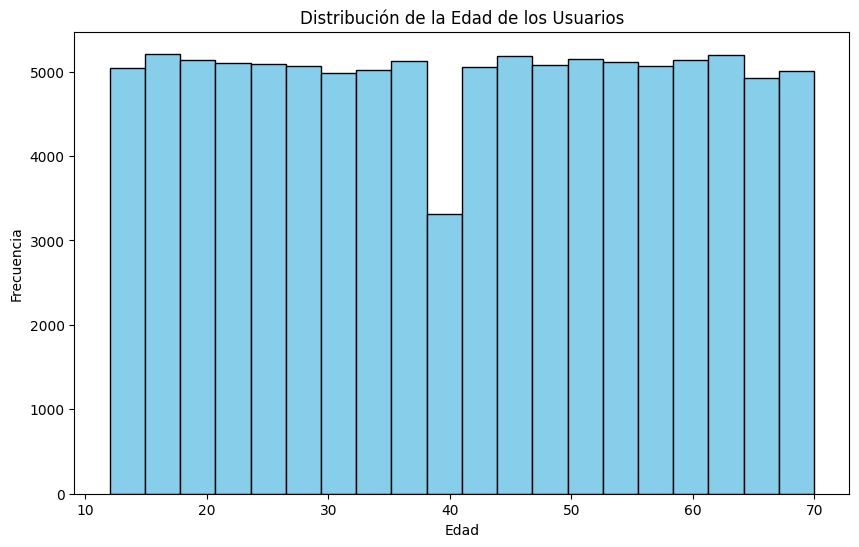

In [72]:
plt.figure(figsize=(10, 6))
plt.hist(df_users['age'], bins=20, color='skyblue', edgecolor='black')

plt.title('Distribución de la Edad de los Usuarios')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.show()

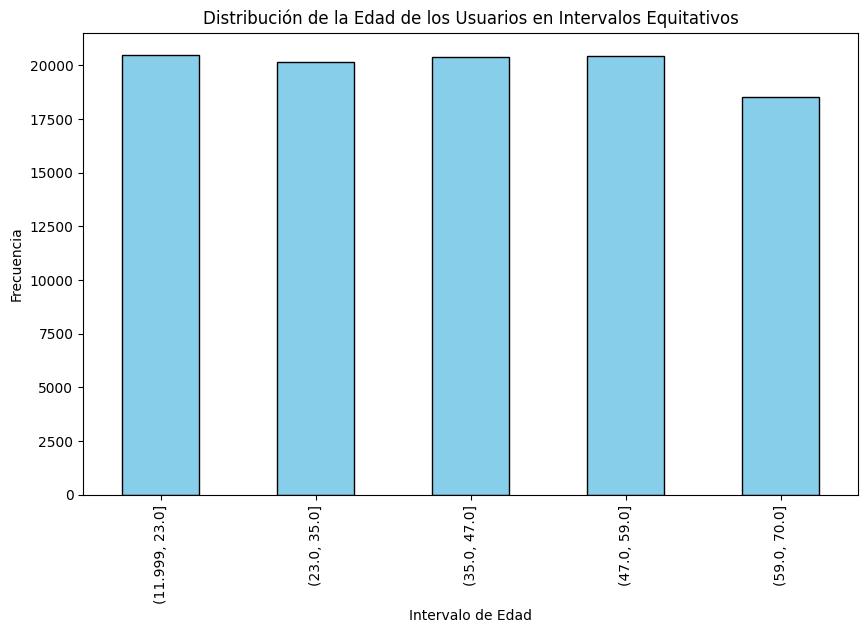

In [73]:
df_users['edad_intervalo'] = pd.qcut(df_users['age'], q=5)

# Contar la frecuencia de cada intervalo
frecuencias = df_users['edad_intervalo'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
frecuencias.plot(kind='bar', color='skyblue', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Distribución de la Edad de los Usuarios en Intervalos Equitativos')
plt.xlabel('Intervalo de Edad')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [74]:
# Crear la columna 'edad_intervalo' sin restricciones categóricas
df_users['edad_intervalo'] = ""

# Asignar los intervalos de edad
for index, row in df_users.iterrows():
    if row['age'] < 24:
        df_users.at[index, 'edad_intervalo'] = '01. Menos 23 años'
    elif row['age'] < 36:
        df_users.at[index, 'edad_intervalo'] = '02. 24 a 35 años'
    elif row['age'] < 48:
        df_users.at[index, 'edad_intervalo'] = '03. 36 a 47 años'
    elif row['age'] < 60:
        df_users.at[index, 'edad_intervalo'] = '04. 48 a 59 años'
    else:
        df_users.at[index, 'edad_intervalo'] = '05. Más de 60 años'

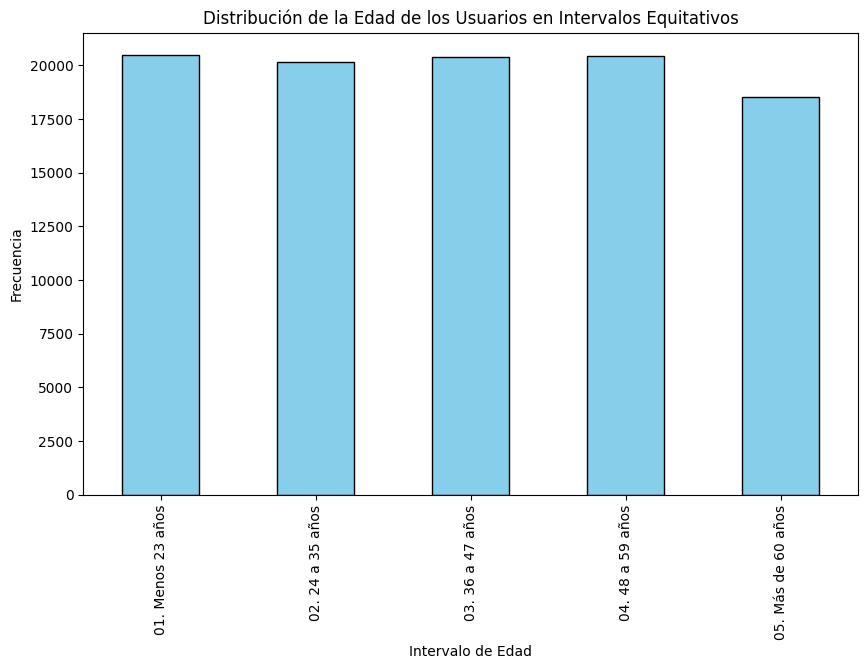

In [75]:
# Contar la frecuencia de cada intervalo
frecuencias = df_users['edad_intervalo'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
frecuencias.plot(kind='bar', color='skyblue', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Distribución de la Edad de los Usuarios en Intervalos Equitativos')
plt.xlabel('Intervalo de Edad')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [76]:
columnas = ['gender', 'state', 'city', 'country', 'traffic_source']

for col in columnas:
  print("="*20)
  print(df_users[[col]].value_counts())

gender
M         50015
F         49985
Name: count, dtype: int64
state     
Guangdong     5412
England       4040
California    3679
Shanghai      2475
Texas         2413
              ... 
Nagasaki         2
Yamanashi        2
Kochi            2
Akita            2
Shiga            2
Name: count, Length: 229, dtype: int64
city        
Shanghai        2366
Beijing         2114
Seoul           1436
Shenzhen        1330
Dongguan         898
                ... 
La Londe           1
La Majadilla       1
La Mole            1
La Navata          1
A Ramallosa        1
Name: count, Length: 7874, dtype: int64
country       
China             34140
United States     22319
Brasil            14478
South Korea        5358
France             4724
United Kingdom     4548
Germany            4229
Spain              4009
Japan              2499
Australia          2172
Belgium            1264
Poland              242
Colombia             16
Deutschland           1
España                1
Name: count, dtyp

#### **2.2.8. Exportación datos depurados**

In [77]:
df_distribution_centers.to_parquet('data parquet/df_distribution_centers.parquet', engine='pyarrow', index=False)
df_events.to_parquet('data parquet/df_events.parquet', engine='pyarrow', index=False)
df_inventory_items.to_parquet('data parquet/df_inventory_items.parquet', engine='pyarrow', index=False)
df_order_items.to_parquet('data parquet/df_order_items.parquet', engine='pyarrow', index=False)
df_orders.to_parquet('data parquet/df_orders.parquet', engine='pyarrow', index=False)
df_products.to_parquet('data parquet/df_products.parquet', engine='pyarrow', index=False)
df_users.to_parquet('data parquet/df_users.parquet', engine='pyarrow', index=False)

### **2.3. Exploración de los datos**
---

#### **2.3.1. Verificación Inicial de datos de venta**

Rectificamos si para cada orden existe uno o varios estatus

In [18]:
df_order_items.groupby('order_id')['status'].nunique().sort_values(ascending=False)

order_id
1         1
83035     1
83063     1
83062     1
83061     1
         ..
41524     1
41523     1
41522     1
41521     1
124581    1
Name: status, Length: 124581, dtype: int64

#### **2.3.2. Detalle venta neta**

Solo existe un estatus por orden, ahora creamos un datafram con la venta neta para su análisis (estatus: Shipped, Complete y Processing)

In [19]:
df_order_items_neta = df_order_items[(df_order_items['status']=='Complete') | (df_order_items['status']=='Shipped') | (df_order_items['status']=='Processing')]

In [20]:
df_order_items_neta.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,...,returned_at_date,created_at_monthnum,shipped_at_date_monthnum,delivered_at_date_monthnum,returned_at_date_monthnum,created_at_month,created_at_year,shipped_at_date_year,delivered_at_date_year,returned_at_date_year
0,37100,25682,20692,14235,100196,Complete,2024-06-13 02:10:52,2024-06-14 10:52:00,2024-06-17 18:04:00,NaT,...,None,202406,202406,202406,None,06,2024,2024,2024,None
1,51805,35874,28712,14235,139770,Processing,2023-12-10 10:08:40,NaT,NaT,NaT,...,None,202312,None,None,None,12,2023,None,None,None
5,61231,42415,33851,14159,165190,Complete,2024-02-29 12:45:12,2024-02-27 17:12:00,2024-03-01 04:02:00,NaT,...,None,202402,202402,202403,None,02,2024,2024,2024,None
6,177513,122726,98446,14159,478802,Complete,2024-02-27 07:30:04,2024-02-28 21:30:00,2024-03-02 14:53:00,NaT,...,None,202402,202402,202403,None,02,2024,2024,2024,None
7,30273,20867,16791,14159,81755,Processing,2023-02-02 07:21:51,NaT,NaT,NaT,...,None,202302,None,None,None,02,2023,None,None,None


In [21]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)  

Vemos la venta por mes histórica

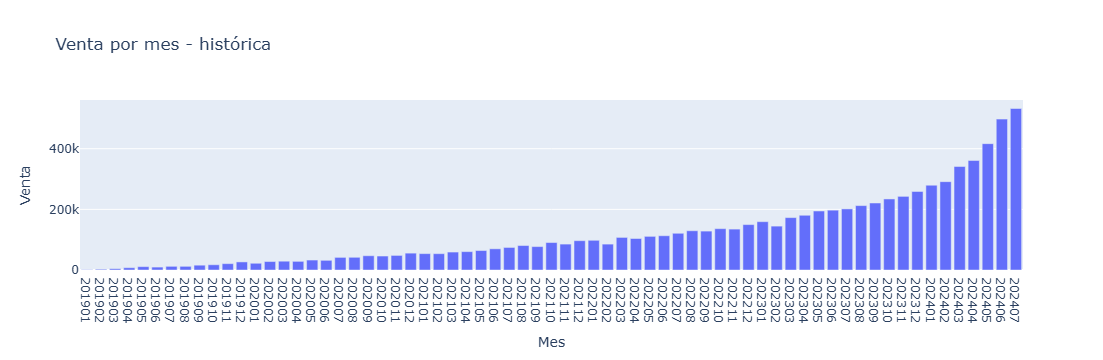

In [22]:
df_graf = pd.DataFrame(df_order_items_neta.groupby('created_at_monthnum')['sale_price'].sum().reset_index().sort_values(by='created_at_monthnum'))

px.bar(df_graf,
    x = 'created_at_monthnum',
    y = 'sale_price',
    title = 'Venta por mes - histórica',
    labels = {'sale_price':'Venta', 'created_at_monthnum': 'Mes'},
    #barmode = 'group' # Generar diagramas de barras lado a lado, sin apilar las categorías de color.
)

Vemos cual es el comportamiendo del año respecto a la venta

In [84]:
df_graf = pd.DataFrame(df_order_items_neta.groupby('created_at_month')['sale_price'].sum().reset_index().sort_values(by='created_at_month'))

px.bar(df_graf,
    x = 'created_at_month',
    y = 'sale_price',
    title = 'Venta por mes - total',
    labels = {'sale_price':'Venta', 'created_at_month': 'Mes'},
    #barmode = 'group' # Generar diagramas de barras lado a lado, sin apilar las categorías de color.
)

In [85]:
df_graf = pd.DataFrame(df_order_items_neta[df_order_items_neta['created_at_year'] == '2023'].groupby('created_at_monthnum')['sale_price'].sum().reset_index().sort_values(by='created_at_monthnum'))

px.bar(df_graf,
    x = 'created_at_monthnum',
    y = 'sale_price',
    title = 'Venta por mes 2023',
    labels = {'sale_price':'Venta', 'created_at_monthnum': 'Mes'},
    #barmode = 'group' # Generar diagramas de barras lado a lado, sin apilar las categorías de color.
)

##### **2.3.2.1. Detalle venta neta por Departamento**

Cruzamos la tabla de venta con la de producto para ver detalle por departamento, categoría y marca

In [86]:
df_venta_con_producto = pd.merge(df_order_items_neta, df_products,left_on='product_id', right_on='id', how='left')

In [87]:
df_venta_con_producto.groupby('department').agg(
    total_sale_price=pd.NamedAgg(column='sale_price', aggfunc='sum'),
    product_count=pd.NamedAgg(column='product_id', aggfunc='count')
).reset_index().sort_values(by='total_sale_price', ascending=False)

,department,total_sale_price,product_count
0,Men,4.265909e+06,67464
1,Women,3.753015e+06,67545


##### **2.3.2.2. Detalle venta neta por Categoría**

In [88]:
df_venta_con_producto.groupby('category').agg(
    total_sale_price=pd.NamedAgg(column='sale_price', aggfunc='sum'),
    product_count=pd.NamedAgg(column='product_id', aggfunc='count')
).reset_index().sort_values(by='total_sale_price', ascending=False)

,category,total_sale_price,product_count
11,Outerwear & Coats,965093.539087,6616
7,Jeans,919881.551204,9350
22,Sweaters,627465.309949,8289
5,Fashion Hoodies & Sweatshirts,488292.270566,8945
23,Swim,479305.170646,8402
21,Suits & Sport Coats,476838.649765,3847
17,Sleep & Lounge,418367.861062,8407
15,Shorts,388538.451053,8334
24,Tops & Tees,367340.091324,8830
6,Intimates,338382.560477,10006


In [89]:
df_venta_con_producto.groupby(['department', 'category']).agg(
    total_sale_price=pd.NamedAgg(column='sale_price', aggfunc='sum'),
    product_count=pd.NamedAgg(column='product_id', aggfunc='count')
).reset_index().sort_values(by='total_sale_price', ascending=False)

,department,category,total_sale_price,product_count
4,Men,Outerwear & Coats,623485.359179,4156
3,Men,Jeans,574414.800278,5701
9,Men,Suits & Sport Coats,476838.649765,3847
10,Men,Sweaters,401288.490062,5167
21,Women,Jeans,345466.750926,3649
25,Women,Outerwear & Coats,341608.179909,2460
20,Women,Intimates,338382.560477,10006
18,Women,Dresses,330673.990876,3990
5,Men,Pants,320565.081100,5315
2,Men,Fashion Hoodies & Sweatshirts,300636.860162,5133


##### **2.3.2.3. Detalle venta neta por Marca**

In [90]:
df_venta_con_producto.groupby('brand').agg(
    total_sale_price=pd.NamedAgg(column='sale_price', aggfunc='sum'),
    product_count=pd.NamedAgg(column='product_id', aggfunc='count')
).reset_index().sort_values(by='total_sale_price', ascending=False)

,brand,total_sale_price,product_count
444,Calvin Klein,152313.830286,2390
697,Diesel,147931.929970,1099
29,7 For All Mankind,131657.000420,852
2479,True Religion,126497.279687,651
462,Carhartt,121906.439238,1795
...,...,...,...
1705,NYfashion101,5.990000,1
2035,Rooster,5.290000,1
2112,Seinfeld,5.000000,1
1543,Made in USA,2.940000,6


##### **2.3.2.4. Detalle venta neta por Centro de distribución**

In [91]:
df_venta_con_producto_centro_distr = pd.merge(df_venta_con_producto, df_distribution_centers ,left_on='distribution_center_id', right_on='id', how='left')

In [92]:
df_venta_con_producto_centro_distr.groupby('name_y').agg(
    total_sale_price=pd.NamedAgg(column='sale_price', aggfunc='sum'),
    product_count=pd.NamedAgg(column='product_id', aggfunc='count')
).reset_index().sort_values(by='total_sale_price', ascending=False)

,name_y,total_sale_price,product_count
2,Houston TX,1.172534e+06,16836
4,Memphis TN,1.039773e+06,18006
1,Chicago IL,9.979128e+05,17986
5,Mobile AL,9.192211e+05,13668
7,Philadelphia PA,8.080379e+05,12704
8,Port Authority of New York/New Jersey NY/NJ,6.990506e+05,12116
3,Los Angeles CA,6.958519e+05,12809
9,Savannah GA,5.962211e+05,8871
6,New Orleans LA,5.903199e+05,9542
0,Charleston SC,5.000017e+05,12471


##### **2.3.2.5. Detalle venta neta por detalle usuario**

Cruzamos la tabla de venta con la de usuario para ver detalle por edad, genero, geografía y traffic source

In [93]:
df_venta_con_usuario = pd.merge(df_order_items_neta, df_users,left_on='user_id', right_on='id', how='left')

In [94]:
df_venta_con_usuario.groupby('gender').agg(
    total_sale_price=pd.NamedAgg(column='sale_price', aggfunc='sum'),
    product_count=pd.NamedAgg(column='product_id', aggfunc='count')
).reset_index().sort_values(by='total_sale_price', ascending=False)

,gender,total_sale_price,product_count
1,M,4.265909e+06,67464
0,F,3.753015e+06,67545


In [95]:
df_venta_con_usuario.groupby('country').agg(
    total_sale_price=pd.NamedAgg(column='sale_price', aggfunc='sum'),
    product_count=pd.NamedAgg(column='product_id', aggfunc='count')
).reset_index().sort_values(by='total_sale_price', ascending=False)

,country,total_sale_price,product_count
3,China,2.768559e+06,46355
13,United States,1.763277e+06,29843
2,Brasil,1.172344e+06,19609
10,South Korea,4.228193e+05,7121
6,France,3.825189e+05,6440
12,United Kingdom,3.665567e+05,6266
7,Germany,3.383588e+05,5690
11,Spain,3.108970e+05,5423
8,Japan,2.047358e+05,3484
0,Australia,1.769548e+05,2864


In [96]:
df_venta_con_usuario.groupby('state').agg(
    total_sale_price=pd.NamedAgg(column='sale_price', aggfunc='sum'),
    product_count=pd.NamedAgg(column='product_id', aggfunc='count')
).reset_index().sort_values(by='total_sale_price', ascending=False)

,state,total_sale_price,product_count
67,Guangdong,451894.520494,7493
52,England,325373.680570,5579
28,California,301854.890130,4952
191,Shanghai,195950.360297,3312
203,Texas,187958.710008,3157
...,...,...,...
155,Okinawa,190.970001,5
224,Yamanashi,146.440005,2
108,Kochi,89.470001,2
194,Shimane,34.000000,1


In [97]:
df_venta_con_usuario.groupby('city').agg(
    total_sale_price=pd.NamedAgg(column='sale_price', aggfunc='sum'),
    product_count=pd.NamedAgg(column='product_id', aggfunc='count')
).reset_index().sort_values(by='total_sale_price', ascending=False)

,city,total_sale_price,product_count
5874,Shanghai,185804.490227,3108
537,Beijing,170342.470153,2859
5896,Shenzhen,108735.490096,1792
5847,Seoul,108070.890118,1838
1701,Dongguan,75771.810109,1272
...,...,...,...
4277,Mutxamel,4.990000,1
6821,Waltham,4.990000,1
1000,Campbellsville,4.990000,1
5620,San Jacinto,3.990000,1


In [98]:
df_venta_con_usuario.groupby('traffic_source').agg(
    total_sale_price=pd.NamedAgg(column='sale_price', aggfunc='sum'),
    product_count=pd.NamedAgg(column='product_id', aggfunc='count')
).reset_index().sort_values(by='total_sale_price', ascending=False)

,traffic_source,total_sale_price,product_count
4,Search,5.615221e+06,94819
3,Organic,1.185255e+06,20000
2,Facebook,4.815559e+05,8061
1,Email,4.071432e+05,6696
0,Display,3.297493e+05,5433


In [99]:
df_venta_con_usuario.groupby('edad_intervalo').agg(
    total_sale_price=pd.NamedAgg(column='sale_price', aggfunc='sum'),
    product_count=pd.NamedAgg(column='product_id', aggfunc='count')
).reset_index().sort_values(by='total_sale_price', ascending=False)

,edad_intervalo,total_sale_price,product_count
3,04. 48 a 59 años,1.654507e+06,27657
0,01. Menos 23 años,1.654009e+06,27989
1,02. 24 a 35 años,1.627307e+06,27382
2,03. 36 a 47 años,1.622685e+06,27436
4,05. Más de 60 años,1.460416e+06,24545


#### **2.3.3. Detalle venta negativa**

Ahora analisamos la venta cancelada y devuelta (venta negativa)

In [6]:
df_order_items_negativa = df_order_items[(df_order_items['status']=='Cancelled') | (df_order_items['status']=='Returned')]

In [7]:
df_graf = pd.DataFrame(df_order_items_negativa.groupby('created_at_monthnum')['sale_price'].sum().reset_index().sort_values(by='created_at_monthnum'))

px.bar(df_graf,
    x = 'created_at_monthnum',
    y = 'sale_price',
    title = 'Venta negativa por mes - histórica',
    labels = {'sale_price':'Venta', 'created_at_monthnum': 'Mes'},
    #barmode = 'group' # Generar diagramas de barras lado a lado, sin apilar las categorías de color.
)

In [8]:
df_graf = pd.DataFrame(df_order_items_negativa.groupby('created_at_month')['sale_price'].sum().reset_index().sort_values(by='created_at_month'))

px.bar(df_graf,
    x = 'created_at_month',
    y = 'sale_price',
    title = 'Venta negativa por mes - total',
    labels = {'sale_price':'Venta', 'created_at_month': 'Mes'},
    #barmode = 'group' # Generar diagramas de barras lado a lado, sin apilar las categorías de color.
)

In [9]:
df_graf = pd.DataFrame(df_order_items_negativa[df_order_items_negativa['created_at_year'] == '2023'].groupby('created_at_monthnum')['sale_price'].sum().reset_index().sort_values(by='created_at_monthnum'))

px.bar(df_graf,
    x = 'created_at_monthnum',
    y = 'sale_price',
    title = 'Venta negativa por mes 2023',
    labels = {'sale_price':'Venta', 'created_at_monthnum': 'Mes'},
    #barmode = 'group' # Generar diagramas de barras lado a lado, sin apilar las categorías de color.
)

##### **2.3.3.1. Detalle venta negativa por Departamento**

Cruzamos la tabla de venta negativa con la de producto para ver detalle por departamento, categoría y marca

In [10]:
df_venta_negativa_con_producto = pd.merge(df_order_items_negativa, df_products,left_on='product_id', right_on='id', how='left')

In [11]:
df_venta_negativa_con_producto.groupby('department').agg(
    total_sale_price=pd.NamedAgg(column='sale_price', aggfunc='sum'),
    product_count=pd.NamedAgg(column='product_id', aggfunc='count')
).reset_index().sort_values(by='total_sale_price', ascending=False)

,department,total_sale_price,product_count
0,Men,1.458253e+06,22822
1,Women,1.256489e+06,22373


##### **2.3.3.2. Detalle venta negativa por Categoría**

In [12]:
df_venta_negativa_con_producto.groupby('category').agg(
    total_sale_price=pd.NamedAgg(column='sale_price', aggfunc='sum'),
    product_count=pd.NamedAgg(column='product_id', aggfunc='count')
).reset_index().sort_values(by='product_count', ascending=False)

,category,total_sale_price,product_count
6,Intimates,109843.040103,3295
7,Jeans,329569.110283,3284
24,Tops & Tees,121920.430440,2955
5,Fashion Hoodies & Sweatshirts,157035.120070,2893
23,Swim,159937.760296,2806
15,Shorts,131141.340439,2795
17,Sleep & Lounge,135990.940195,2792
22,Sweaters,206946.659922,2738
0,Accessories,106305.049931,2458
11,Outerwear & Coats,344779.419712,2285


##### **2.3.3.3. Detalle venta negativa por Marca**

In [13]:
df_venta_negativa_con_producto.groupby('brand').agg(
    total_sale_price=pd.NamedAgg(column='sale_price', aggfunc='sum'),
    product_count=pd.NamedAgg(column='product_id', aggfunc='count')
).reset_index().sort_values(by='product_count', ascending=False)

,brand,total_sale_price,product_count
85,Allegra K,21698.299982,1518
404,Calvin Klein,49503.020056,810
420,Carhartt,47794.599703,662
980,Hanes,10468.789998,531
2349,Volcom,26907.399943,470
...,...,...,...
2015,Southern Thread,39.990002,1
818,Flyclothing,18.980000,1
824,Foot Traffice,12.200000,1
829,Ford Motor Company,39.990002,1


##### **2.3.3.4. Detalle venta negativa por Centro de distribución**

In [14]:
df_venta_negativa_con_producto_centro_distr = pd.merge(df_venta_negativa_con_producto, df_distribution_centers ,left_on='distribution_center_id', right_on='id', how='left')

In [15]:
df_venta_negativa_con_producto_centro_distr.groupby('name_y').agg(
    total_sale_price=pd.NamedAgg(column='sale_price', aggfunc='sum'),
    product_count=pd.NamedAgg(column='product_id', aggfunc='count')
).reset_index().sort_values(by='total_sale_price', ascending=False)

,name_y,total_sale_price,product_count
2,Houston TX,387626.990034,5556
4,Memphis TN,365701.480622,6058
1,Chicago IL,320955.070472,5852
5,Mobile AL,311717.810304,4683
7,Philadelphia PA,275096.980475,4232
8,Port Authority of New York/New Jersey NY/NJ,244583.290209,4140
3,Los Angeles CA,232668.000427,4221
9,Savannah GA,210055.989999,3048
6,New Orleans LA,204503.700184,3304
0,Charleston SC,161832.589821,4101


## **3. Preparación de los datos**

In [3]:
df_order_items_neta = df_order_items[(df_order_items['status']=='Complete') | (df_order_items['status']=='Shipped') | (df_order_items['status']=='Processing')]

In [4]:
len(df_order_items_neta)

135009

In [5]:
data_completa = pd.merge(df_order_items_neta, df_products, left_on='product_id', right_on='id', how='left')
data_completa = pd.merge(data_completa, df_distribution_centers, left_on='distribution_center_id', right_on='id', how='left')

In [6]:
len(data_completa)

135009

### **3.1. Para KPIs 1, 2, 3, 4 y 8** (venta, ordenes, frecuencia, unidades y skus comprados)



In [7]:
base_df_1 = data_completa.groupby(['user_id', 'created_at_monthnum']).agg(
    venta=('sale_price', 'sum'),
    ordenes=('order_id', 'nunique'),
    frecuencia=('created_at_date', 'nunique'),
    unidades=('product_id', 'nunique'),
    skus=('sku', 'nunique'),
).reset_index()

base_df_1['ticket_promedio'] = base_df_1['venta'] / base_df_1['ordenes']


In [8]:
base_df_1

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio
0,1,202401,60.000000,1,1,1,1,60.000000
1,2,202002,171.629997,1,3,3,3,171.629997
2,3,202311,24.459999,1,1,1,1,24.459999
3,4,202310,86.990000,1,2,2,2,86.990000
4,4,202311,24.990000,1,1,1,1,24.990000
...,...,...,...,...,...,...,...,...
92152,99996,202211,89.949997,1,1,1,1,89.949997
92153,99997,202402,55.000000,1,1,1,1,55.000000
92154,99998,202203,133.879997,1,4,4,4,133.879997
92155,99999,202203,148.000000,1,1,1,1,148.000000


### **3.2. Para KPI 5** (categorías)

In [9]:
base_df_aux_cat = data_completa.groupby(['user_id', 'created_at_monthnum', 'category']).agg(
    venta=('sale_price', 'sum'),
).reset_index()
base_df_aux_cat.head(3)

,user_id,created_at_monthnum,category,venta
0,1,202401,Active,60.000000
1,2,202002,Active,25.000000
2,2,202002,Fashion Hoodies & Sweatshirts,89.989998


In [10]:
#Lista de posibles categorías ordenadas
lista_cats_ordenada = sorted(df_products['category'].unique())

In [11]:
# Pivotamos el DataFrame para obtener una columna por cada categoría
df_pivot = base_df_aux_cat.pivot_table(
    index=['user_id', 'created_at_monthnum'],
    columns='category',
    values='venta',
    aggfunc='sum',
    fill_value=0  # Llenamos con 0 si no hay ventas en alguna categoría
).reset_index()

In [12]:
# Renombrar columnas, añadiendo prefijo 'share_' a cada categoría
df_pivot.columns = ['user_id', 'created_at_monthnum'] + [f'cat_share_{cat}' for cat in df_pivot.columns[2:]]

In [13]:
# Calculamos el total de ventas por fila
df_pivot['total_venta'] = df_pivot.iloc[:, 2:].sum(axis=1)

In [14]:
# Dividimos cada columna de "share_" por el total de ventas para calcular el share
for cat in lista_cats_ordenada:
    share_col = f'cat_share_{cat}'
    if share_col in df_pivot.columns:
        df_pivot[share_col] = df_pivot[share_col] / df_pivot['total_venta']

In [15]:
# Eliminamos la columna de total_venta
df_pivot = df_pivot.drop(columns=['total_venta'])

In [16]:
# Reordenamos las columnas según 'categorias_orden'
columnas_finales = ['user_id', 'created_at_monthnum'] + [f'cat_share_{cat}' for cat in lista_cats_ordenada]
df_final = df_pivot[columnas_finales]

In [18]:
base_df_2 = pd.merge(base_df_1, df_final, how='left', on=['user_id', 'created_at_monthnum'])

In [19]:
base_df_2

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,cat_share_Skirts,cat_share_Sleep & Lounge,cat_share_Socks,cat_share_Socks & Hosiery,cat_share_Suits,cat_share_Suits & Sport Coats,cat_share_Sweaters,cat_share_Swim,cat_share_Tops & Tees,cat_share_Underwear
0,1,202401,60.000000,1,1,1,1,60.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,2,202002,171.629997,1,3,3,3,171.629997,0.0,0.145662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,3,202311,24.459999,1,1,1,1,24.459999,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
3,4,202310,86.990000,1,2,2,2,86.990000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.287274,0.0,0.0,0.0
4,4,202311,24.990000,1,1,1,1,24.990000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92152,99996,202211,89.949997,1,1,1,1,89.949997,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
92153,99997,202402,55.000000,1,1,1,1,55.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
92154,99998,202203,133.879997,1,4,4,4,133.879997,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.522782,0.0,0.0,0.0
92155,99999,202203,148.000000,1,1,1,1,148.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0


Prow: 

Tengo un dataframe con estas columnas:
['user_id', 'created_at_monthnum', 'category', 'venta']

Y tengo una lista con todas las posibles "category", los valores son:
categorias_orden = ['aaa', 'bbb', 'ccc', ..., 'zzz']

Necesito un dataframe que me reorganice el primer dataframe con la siguiente estructura:
['user_id', 'created_at_monthnum', 'share_aaa', 'share_bbb', 'share_ccc', ..., 'share_zzz']

Donde calculo el share de venta de cada categoría respecto a la venta total de dicho mes.
Es decir que por fila, la suma de todas las columnas con prefijo "share_" debe ser igual a 1.

Y el orden de las columnas debe ser el mismo de la lista "categorias_orden"

### **3.3. Para KPI 7** (departamento)

In [20]:
base_df_aux_dep = data_completa.groupby(['user_id', 'created_at_monthnum', 'department']).agg(
    venta=('sale_price', 'sum'),
).reset_index()
base_df_aux_dep.head(3)

,user_id,created_at_monthnum,department,venta
0,1,202401,Women,60.000000
1,2,202002,Men,171.629997
2,3,202311,Men,24.459999


In [21]:
#Lista de posibles categorías ordenadas
lista_dep_ordenada = sorted(df_products['department'].unique())

In [22]:
# Pivotamos el DataFrame para obtener una columna por cada categoría
df_pivot = base_df_aux_dep.pivot_table(
    index=['user_id', 'created_at_monthnum'],
    columns='department',
    values='venta',
    aggfunc='sum',
    fill_value=0  # Llenamos con 0 si no hay ventas en alguna categoría
).reset_index()

In [23]:
# Renombrar columnas, añadiendo prefijo 'share_' a cada departamento
df_pivot.columns = ['user_id', 'created_at_monthnum'] + [f'dep_share_{dep}' for dep in df_pivot.columns[2:]]

In [24]:
# Calculamos el total de ventas por fila
df_pivot['total_venta'] = df_pivot.iloc[:, 2:].sum(axis=1)

In [25]:
# Dividimos cada columna de "share_" por el total de ventas para calcular el share
for dep in lista_dep_ordenada:
    share_col = f'dep_share_{dep}'
    if share_col in df_pivot.columns:
        df_pivot[share_col] = df_pivot[share_col] / df_pivot['total_venta']

In [26]:
# Eliminamos la columna de total_venta
df_pivot = df_pivot.drop(columns=['total_venta'])

In [27]:
# Reordenamos las columnas según 'lista_dep_ordenada'
columnas_finales = ['user_id', 'created_at_monthnum'] + [f'dep_share_{dep}' for dep in lista_dep_ordenada]
df_final = df_pivot[columnas_finales]

In [28]:
base_df_3 = pd.merge(base_df_2, df_final, how='left', on=['user_id', 'created_at_monthnum'])

In [29]:
base_df_3

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,cat_share_Socks,cat_share_Socks & Hosiery,cat_share_Suits,cat_share_Suits & Sport Coats,cat_share_Sweaters,cat_share_Swim,cat_share_Tops & Tees,cat_share_Underwear,dep_share_Men,dep_share_Women
0,1,202401,60.000000,1,1,1,1,60.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
1,2,202002,171.629997,1,3,3,3,171.629997,0.0,0.145662,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0
2,3,202311,24.459999,1,1,1,1,24.459999,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,0.0
3,4,202310,86.990000,1,2,2,2,86.990000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.287274,0.0,0.0,0.0,0.0,1.0
4,4,202311,24.990000,1,1,1,1,24.990000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92152,99996,202211,89.949997,1,1,1,1,89.949997,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0
92153,99997,202402,55.000000,1,1,1,1,55.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0
92154,99998,202203,133.879997,1,4,4,4,133.879997,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.522782,0.0,0.0,0.0,0.0,1.0
92155,99999,202203,148.000000,1,1,1,1,148.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0


### **3.4. Para KPI 9** (distribution_centers)

In [30]:
base_df_aux_dist_cent = data_completa.groupby(['user_id', 'created_at_monthnum', 'distribution_center_id']).agg(
    venta=('sale_price', 'sum'),
).reset_index()
base_df_aux_dist_cent.head(3)

,user_id,created_at_monthnum,distribution_center_id,venta
0,1,202401,6,60.000000
1,2,202002,1,25.000000
2,2,202002,4,56.639999


In [31]:
#Lista de posibles distribution_centers ordenadas
lista_dist_cent_ordenada = sorted(df_distribution_centers['id'].unique())

In [32]:
# Pivotamos el DataFrame para obtener una columna por cada distribution_centers
df_pivot = base_df_aux_dist_cent.pivot_table(
    index=['user_id', 'created_at_monthnum'],
    columns='distribution_center_id',
    values='venta',
    aggfunc='sum',
    fill_value=0  # Llenamos con 0 si no hay ventas en alguna distribution_centers
).reset_index()

In [33]:
# Renombrar columnas, añadiendo prefijo 'share_' a cada distribution_centers
df_pivot.columns = ['user_id', 'created_at_monthnum'] + [f'dist_cent_share_{dist_cent}' for dist_cent in df_pivot.columns[2:]]

In [34]:
# Calculamos el total de ventas por fila
df_pivot['total_venta'] = df_pivot.iloc[:, 2:].sum(axis=1)

In [35]:
# Dividimos cada columna de "share_" por el total de ventas para calcular el share
for dist_cent in lista_dist_cent_ordenada:
    share_col = f'dist_cent_share_{dist_cent}'
    if share_col in df_pivot.columns:
        df_pivot[share_col] = df_pivot[share_col] / df_pivot['total_venta']

In [36]:
# Eliminamos la columna de total_venta
df_pivot = df_pivot.drop(columns=['total_venta'])

In [37]:
# Reordenamos las columnas según 'lista_dist_cent_ordenada'
columnas_finales = ['user_id', 'created_at_monthnum'] + [f'dist_cent_share_{dist_cent}' for dist_cent in lista_dist_cent_ordenada]
df_final = df_pivot[columnas_finales]

In [38]:
base_df_4 = pd.merge(base_df_3, df_final, how='left', on=['user_id', 'created_at_monthnum'])

In [39]:
base_df_4

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,dist_cent_share_1,dist_cent_share_2,dist_cent_share_3,dist_cent_share_4,dist_cent_share_5,dist_cent_share_6,dist_cent_share_7,dist_cent_share_8,dist_cent_share_9,dist_cent_share_10
0,1,202401,60.000000,1,1,1,1,60.000000,0.0,1.000000,...,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
1,2,202002,171.629997,1,3,3,3,171.629997,0.0,0.145662,...,0.145662,0.0,0.0,0.330012,0.0,0.000000,0.000000,0.524326,0.000000,0.000000
2,3,202311,24.459999,1,1,1,1,24.459999,0.0,0.000000,...,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,202310,86.990000,1,2,2,2,86.990000,0.0,0.000000,...,0.287274,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.712726,0.000000
4,4,202311,24.990000,1,1,1,1,24.990000,0.0,1.000000,...,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92152,99996,202211,89.949997,1,1,1,1,89.949997,0.0,0.000000,...,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
92153,99997,202402,55.000000,1,1,1,1,55.000000,0.0,0.000000,...,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
92154,99998,202203,133.879997,1,4,4,4,133.879997,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.224007,0.118763,0.134449,0.000000,0.522782
92155,99999,202203,148.000000,1,1,1,1,148.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000


### **3.5. Para KPI 17 al 20** (Logística - Devolución)

In [40]:
df_order_items_returned = df_order_items[(df_order_items['status']=='Returned')]

In [41]:
len(df_order_items_returned)

18202

In [42]:
data_completa_returned = pd.merge(df_order_items_returned, df_products, left_on='product_id', right_on='id', how='left')

In [43]:
len(data_completa_returned)

18202

In [44]:
base_returned = data_completa_returned.groupby(['user_id', 'created_at_monthnum']).agg(
    dev_venta=('sale_price', 'sum'),
    dev_ordenes=('order_id', 'nunique'),
    dev_unidades=('product_id', 'nunique'),
).reset_index()

In [45]:
base_returned

,user_id,created_at_monthnum,dev_venta,dev_ordenes,dev_unidades
0,5,202309,67.990000,1,2
1,5,202407,5.550000,1,1
2,10,202310,33.990002,1,1
3,13,202402,122.580002,1,3
4,15,202004,179.000000,1,2
...,...,...,...,...,...
12687,99885,202112,36.000000,1,1
12688,99899,202310,148.000000,1,2
12689,99974,202007,31.950001,1,1
12690,99977,202405,63.119999,1,2


**Categorías - devolución**

In [46]:
base_df_aux_cat_dev = data_completa_returned.groupby(['user_id', 'created_at_monthnum', 'category']).agg(
    venta=('sale_price', 'sum'),
).reset_index()
base_df_aux_cat_dev.head(3)

,user_id,created_at_monthnum,category,venta
0,5,202309,Active,48.00
1,5,202309,Fashion Hoodies & Sweatshirts,19.99
2,5,202407,Accessories,5.55


In [47]:
#Lista de posibles categorías ordenadas
lista_cats_ordenada = sorted(df_products['category'].unique())

In [48]:
# Pivotamos el DataFrame para obtener una columna por cada categoría
df_pivot_dev = base_df_aux_cat_dev.pivot_table(
    index=['user_id', 'created_at_monthnum'],
    columns='category',
    values='venta',
    aggfunc='sum',
    fill_value=0  # Llenamos con 0 si no hay ventas en alguna categoría
).reset_index()

In [49]:
# Renombrar columnas, añadiendo prefijo 'share_' a cada categoría
df_pivot_dev.columns = ['user_id', 'created_at_monthnum'] + [f'dev_cat_share_{cat}' for cat in df_pivot_dev.columns[2:]]

In [50]:
# Calculamos el total de ventas por fila
df_pivot_dev['total_venta'] = df_pivot_dev.iloc[:, 2:].sum(axis=1)

In [51]:
# Dividimos cada columna de "share_" por el total de ventas para calcular el share
for cat in lista_cats_ordenada:
    share_col = f'dev_cat_share_{cat}'
    if share_col in df_pivot_dev.columns:
        df_pivot_dev[share_col] = df_pivot_dev[share_col] / df_pivot_dev['total_venta']

In [52]:
# Eliminamos la columna de total_venta
df_pivot_dev = df_pivot_dev.drop(columns=['total_venta'])

In [53]:
# Reordenamos las columnas según 'categorias_orden'
columnas_finales = ['user_id', 'created_at_monthnum'] + [f'dev_cat_share_{cat}' for cat in lista_cats_ordenada]
df_final_dev = df_pivot_dev[columnas_finales]

In [54]:
base_returned_2 = pd.merge(base_returned, df_final_dev, how='left', on=['user_id', 'created_at_monthnum'])

In [55]:
base_returned_2

,user_id,created_at_monthnum,dev_venta,dev_ordenes,dev_unidades,dev_cat_share_Accessories,dev_cat_share_Active,dev_cat_share_Blazers & Jackets,dev_cat_share_Clothing Sets,dev_cat_share_Dresses,...,dev_cat_share_Skirts,dev_cat_share_Sleep & Lounge,dev_cat_share_Socks,dev_cat_share_Socks & Hosiery,dev_cat_share_Suits,dev_cat_share_Suits & Sport Coats,dev_cat_share_Sweaters,dev_cat_share_Swim,dev_cat_share_Tops & Tees,dev_cat_share_Underwear
0,5,202309,67.990000,1,2,0.00000,0.705986,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000
1,5,202407,5.550000,1,1,1.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000
2,10,202310,33.990002,1,1,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.00000,0.000000
3,13,202402,122.580002,1,3,0.21692,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.326236,0.0,0.00000,0.000000
4,15,202004,179.000000,1,2,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12687,99885,202112,36.000000,1,1,0.00000,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000
12688,99899,202310,148.000000,1,2,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.195946
12689,99974,202007,31.950001,1,1,0.00000,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000
12690,99977,202405,63.119999,1,2,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.61185,0.388150


**Hacer Join con base principal**

In [56]:
base_df_4

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,dist_cent_share_1,dist_cent_share_2,dist_cent_share_3,dist_cent_share_4,dist_cent_share_5,dist_cent_share_6,dist_cent_share_7,dist_cent_share_8,dist_cent_share_9,dist_cent_share_10
0,1,202401,60.000000,1,1,1,1,60.000000,0.0,1.000000,...,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
1,2,202002,171.629997,1,3,3,3,171.629997,0.0,0.145662,...,0.145662,0.0,0.0,0.330012,0.0,0.000000,0.000000,0.524326,0.000000,0.000000
2,3,202311,24.459999,1,1,1,1,24.459999,0.0,0.000000,...,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,202310,86.990000,1,2,2,2,86.990000,0.0,0.000000,...,0.287274,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.712726,0.000000
4,4,202311,24.990000,1,1,1,1,24.990000,0.0,1.000000,...,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92152,99996,202211,89.949997,1,1,1,1,89.949997,0.0,0.000000,...,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
92153,99997,202402,55.000000,1,1,1,1,55.000000,0.0,0.000000,...,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
92154,99998,202203,133.879997,1,4,4,4,133.879997,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.224007,0.118763,0.134449,0.000000,0.522782
92155,99999,202203,148.000000,1,1,1,1,148.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000


Quiero saber cuántas combinaciones de "user_id" y "created_at_monthnum" en la tabla de devoluciones no existen en la tabla original de venta neta

In [57]:
# Hacer un merge (izquierda) entre df2 y df1 en las columnas 'user_id' y 'created_at_monthnum'
merged_df = pd.merge(base_returned_2, base_df_4, on=['user_id', 'created_at_monthnum'], how='left', indicator=True)

# Filtrar las filas que no existen en df1
missing_combinations = merged_df[merged_df['_merge'] == 'left_only']

# Contar las combinaciones que no existen en df1
missing_count = missing_combinations.shape[0]

print(f'Número de combinaciones que no existen en el primer DataFrame: {missing_count}')

Número de combinaciones que no existen en el primer DataFrame: 11948


Ahora vamos a hacer el join

In [58]:
base_df_5 = pd.merge(base_df_4, base_returned_2, on=['user_id', 'created_at_monthnum'], how='outer')

In [59]:
base_df_5

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,dev_cat_share_Skirts,dev_cat_share_Sleep & Lounge,dev_cat_share_Socks,dev_cat_share_Socks & Hosiery,dev_cat_share_Suits,dev_cat_share_Suits & Sport Coats,dev_cat_share_Sweaters,dev_cat_share_Swim,dev_cat_share_Tops & Tees,dev_cat_share_Underwear
0,1,202401,60.000000,1.0,1.0,1.0,1.0,60.000000,0.0,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,202002,171.629997,1.0,3.0,3.0,3.0,171.629997,0.0,0.145662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,202311,24.459999,1.0,1.0,1.0,1.0,24.459999,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,202310,86.990000,1.0,2.0,2.0,2.0,86.990000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,202311,24.990000,1.0,1.0,1.0,1.0,24.990000,0.0,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104100,99996,202211,89.949997,1.0,1.0,1.0,1.0,89.949997,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104101,99997,202402,55.000000,1.0,1.0,1.0,1.0,55.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104102,99998,202203,133.879997,1.0,4.0,4.0,4.0,133.879997,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104103,99999,202203,148.000000,1.0,1.0,1.0,1.0,148.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
base_df_5.fillna(value=0, inplace=True)
base_df_5

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,dev_cat_share_Skirts,dev_cat_share_Sleep & Lounge,dev_cat_share_Socks,dev_cat_share_Socks & Hosiery,dev_cat_share_Suits,dev_cat_share_Suits & Sport Coats,dev_cat_share_Sweaters,dev_cat_share_Swim,dev_cat_share_Tops & Tees,dev_cat_share_Underwear
0,1,202401,60.000000,1.0,1.0,1.0,1.0,60.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,202002,171.629997,1.0,3.0,3.0,3.0,171.629997,0.0,0.145662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,202311,24.459999,1.0,1.0,1.0,1.0,24.459999,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,202310,86.990000,1.0,2.0,2.0,2.0,86.990000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,202311,24.990000,1.0,1.0,1.0,1.0,24.990000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104100,99996,202211,89.949997,1.0,1.0,1.0,1.0,89.949997,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104101,99997,202402,55.000000,1.0,1.0,1.0,1.0,55.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104102,99998,202203,133.879997,1.0,4.0,4.0,4.0,133.879997,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104103,99999,202203,148.000000,1.0,1.0,1.0,1.0,148.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Rectificamos el número de filas final.

Número de filas venta neta: 92157

Número de filas que no coincidían en venta neta (desde la tabla de devoluciones): 11948

In [63]:
92157 + 11948

104105

### **3.6. Para KPI 22 al 25** (Logística - Cancelación)

In [64]:
df_order_items_cancelled = df_order_items[(df_order_items['status']=='Cancelled')]

In [65]:
len(df_order_items_cancelled)

26993

In [66]:
data_completa_cancelled = pd.merge(df_order_items_cancelled, df_products, left_on='product_id', right_on='id', how='left')

In [67]:
len(data_completa_cancelled)

26993

In [68]:
base_cancelled = data_completa_cancelled.groupby(['user_id', 'created_at_monthnum']).agg(
    can_venta=('sale_price', 'sum'),
    can_ordenes=('order_id', 'nunique'),
    can_unidades=('product_id', 'nunique'),
).reset_index()

In [69]:
base_cancelled

,user_id,created_at_monthnum,can_venta,can_ordenes,can_unidades
0,6,202308,35.990002,1,1
1,6,202311,49.950001,1,1
2,16,202312,131.300003,1,1
3,21,202212,23.790001,1,1
4,25,202401,91.500000,1,2
...,...,...,...,...,...
18797,99979,202202,99.989998,1,1
18798,99983,202305,69.949997,1,1
18799,99988,202302,18.500000,1,1
18800,99989,202405,29.500000,1,1


**Categorías - cancelación**

In [70]:
base_df_aux_cat_can = data_completa_cancelled.groupby(['user_id', 'created_at_monthnum', 'category']).agg(
    venta=('sale_price', 'sum'),
).reset_index()
base_df_aux_cat_can.head(3)

,user_id,created_at_monthnum,category,venta
0,6,202308,Jeans,35.990002
1,6,202311,Pants,49.950001
2,16,202312,Blazers & Jackets,131.300003


In [71]:
#Lista de posibles categorías ordenadas
lista_cats_ordenada = sorted(df_products['category'].unique())

In [72]:
# Pivotamos el DataFrame para obtener una columna por cada categoría
df_pivot_can = base_df_aux_cat_can.pivot_table(
    index=['user_id', 'created_at_monthnum'],
    columns='category',
    values='venta',
    aggfunc='sum',
    fill_value=0  # Llenamos con 0 si no hay ventas en alguna categoría
).reset_index()

In [73]:
# Renombrar columnas, añadiendo prefijo 'share_' a cada categoría
df_pivot_can.columns = ['user_id', 'created_at_monthnum'] + [f'can_cat_share_{cat}' for cat in df_pivot_can.columns[2:]]

In [74]:
# Calculamos el total de ventas por fila
df_pivot_can['total_venta'] = df_pivot_can.iloc[:, 2:].sum(axis=1)

In [75]:
# Dividimos cada columna de "share_" por el total de ventas para calcular el share
for cat in lista_cats_ordenada:
    share_col = f'can_cat_share_{cat}'
    if share_col in df_pivot_can.columns:
        df_pivot_can[share_col] = df_pivot_can[share_col] / df_pivot_can['total_venta']

In [76]:
# Eliminamos la columna de total_venta
df_pivot_can = df_pivot_can.drop(columns=['total_venta'])

In [77]:
# Reordenamos las columnas según 'categorias_orden'
columnas_finales = ['user_id', 'created_at_monthnum'] + [f'can_cat_share_{cat}' for cat in lista_cats_ordenada]
df_final_can = df_pivot_can[columnas_finales]

In [78]:
base_cancelled_2 = pd.merge(base_cancelled, df_final_can, how='left', on=['user_id', 'created_at_monthnum'])

In [79]:
base_cancelled_2

,user_id,created_at_monthnum,can_venta,can_ordenes,can_unidades,can_cat_share_Accessories,can_cat_share_Active,can_cat_share_Blazers & Jackets,can_cat_share_Clothing Sets,can_cat_share_Dresses,...,can_cat_share_Skirts,can_cat_share_Sleep & Lounge,can_cat_share_Socks,can_cat_share_Socks & Hosiery,can_cat_share_Suits,can_cat_share_Suits & Sport Coats,can_cat_share_Sweaters,can_cat_share_Swim,can_cat_share_Tops & Tees,can_cat_share_Underwear
0,6,202308,35.990002,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,202311,49.950001,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16,202312,131.300003,1,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21,202212,23.790001,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,25,202401,91.500000,1,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.349727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18797,99979,202202,99.989998,1,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18798,99983,202305,69.949997,1,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18799,99988,202302,18.500000,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18800,99989,202405,29.500000,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Hacer Join con base principal**

In [80]:
base_df_5

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,dev_cat_share_Skirts,dev_cat_share_Sleep & Lounge,dev_cat_share_Socks,dev_cat_share_Socks & Hosiery,dev_cat_share_Suits,dev_cat_share_Suits & Sport Coats,dev_cat_share_Sweaters,dev_cat_share_Swim,dev_cat_share_Tops & Tees,dev_cat_share_Underwear
0,1,202401,60.000000,1.0,1.0,1.0,1.0,60.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,202002,171.629997,1.0,3.0,3.0,3.0,171.629997,0.0,0.145662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,202311,24.459999,1.0,1.0,1.0,1.0,24.459999,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,202310,86.990000,1.0,2.0,2.0,2.0,86.990000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,202311,24.990000,1.0,1.0,1.0,1.0,24.990000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104100,99996,202211,89.949997,1.0,1.0,1.0,1.0,89.949997,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104101,99997,202402,55.000000,1.0,1.0,1.0,1.0,55.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104102,99998,202203,133.879997,1.0,4.0,4.0,4.0,133.879997,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104103,99999,202203,148.000000,1.0,1.0,1.0,1.0,148.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Quiero saber cuántas combinaciones de "user_id" y "created_at_monthnum" en la tabla de devoluciones no existen en la tabla original de venta neta

In [81]:
# Hacer un merge (izquierda) entre df2 y df1 en las columnas 'user_id' y 'created_at_monthnum'
merged_df = pd.merge(base_cancelled_2, base_df_5, on=['user_id', 'created_at_monthnum'], how='left', indicator=True)

# Filtrar las filas que no existen en df1
missing_combinations = merged_df[merged_df['_merge'] == 'left_only']

# Contar las combinaciones que no existen en df1
missing_count = missing_combinations.shape[0]

print(f'Número de combinaciones que no existen en el primer DataFrame: {missing_count}')

Número de combinaciones que no existen en el primer DataFrame: 17572


Ahora vamos a hacer el join

In [82]:
base_df_6 = pd.merge(base_df_5, base_cancelled_2, on=['user_id', 'created_at_monthnum'], how='outer')

In [83]:
base_df_6

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,can_cat_share_Skirts,can_cat_share_Sleep & Lounge,can_cat_share_Socks,can_cat_share_Socks & Hosiery,can_cat_share_Suits,can_cat_share_Suits & Sport Coats,can_cat_share_Sweaters,can_cat_share_Swim,can_cat_share_Tops & Tees,can_cat_share_Underwear
0,1,202401,60.000000,1.0,1.0,1.0,1.0,60.000000,0.0,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,202002,171.629997,1.0,3.0,3.0,3.0,171.629997,0.0,0.145662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,202311,24.459999,1.0,1.0,1.0,1.0,24.459999,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,202310,86.990000,1.0,2.0,2.0,2.0,86.990000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,202311,24.990000,1.0,1.0,1.0,1.0,24.990000,0.0,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121672,99997,202402,55.000000,1.0,1.0,1.0,1.0,55.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121673,99998,202203,133.879997,1.0,4.0,4.0,4.0,133.879997,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121674,99999,202203,148.000000,1.0,1.0,1.0,1.0,148.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121675,99999,202211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
base_df_6.fillna(value=0, inplace=True)
base_df_6

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,can_cat_share_Skirts,can_cat_share_Sleep & Lounge,can_cat_share_Socks,can_cat_share_Socks & Hosiery,can_cat_share_Suits,can_cat_share_Suits & Sport Coats,can_cat_share_Sweaters,can_cat_share_Swim,can_cat_share_Tops & Tees,can_cat_share_Underwear
0,1,202401,60.000000,1.0,1.0,1.0,1.0,60.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,202002,171.629997,1.0,3.0,3.0,3.0,171.629997,0.0,0.145662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,202311,24.459999,1.0,1.0,1.0,1.0,24.459999,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,202310,86.990000,1.0,2.0,2.0,2.0,86.990000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,202311,24.990000,1.0,1.0,1.0,1.0,24.990000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121672,99997,202402,55.000000,1.0,1.0,1.0,1.0,55.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121673,99998,202203,133.879997,1.0,4.0,4.0,4.0,133.879997,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121674,99999,202203,148.000000,1.0,1.0,1.0,1.0,148.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121675,99999,202211,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Rectificamos el número de filas final.

Número de filas - base_df_5: 104105

Número de filas que no coincidían en tabla matriz (desde la tabla de cancelaciones): 17572

In [85]:
104105 + 17572

121677

### **3.7. Para KPI 27 al 33** (Navegación)
Sesiones totales, visitas home, PLP, PDP, cart, purchase y Conversión

In [10]:
# Verificamos el # de filas que tienen user_id = NaN (No nos sirve de nada estas filas)
len(df_events[pd.isna(df_events['user_id'])])

1125275

In [11]:
# Verificamos el # filas total 
len(df_events)

2415323

In [12]:
# Debería quedar este # de filas al depurar las NaN
2415323 - 1125275

1290048

In [40]:
df_events_without_NaN = df_events.dropna(subset=['user_id'])

df_events_without_NaN = df_events_without_NaN.copy()  # Hacer una copia para evitar advertencias
#Convertir "user_id" en Int por que es float
df_events_without_NaN['user_id'] = df_events_without_NaN['user_id'].astype('Int64')

In [42]:
len(df_events_without_NaN)

1290048

In [44]:
df_events_without_NaN.head(3)

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type,created_at_date,created_at_monthnum,created_at_year
1370,1176811,91117,4,6e07af65-6820-4b25-b832-dc1b8b1ff72a,2024-05-12 02:36:21,205.3.55.50,São Paulo,São Paulo,02675-031,Other,Adwords,/cart,cart,2024-05-12,202405,2024
1371,420913,32494,4,e487372c-487f-46c5-b51e-d1b8f3f4d6f0,2024-07-12 06:09:43,169.144.65.133,São Paulo,São Paulo,02675-031,Safari,Email,/cart,cart,2024-07-12,202407,2024
1373,1137390,88035,3,fc1a3d22-4a29-4181-bbe0-f063af3ce083,2024-03-03 05:07:16,114.91.24.73,São Paulo,São Paulo,02675-031,Other,Email,/cart,cart,2024-03-03,202403,2024


In [142]:
# Conteo distintivo de visitas totales por user_id y created_at_monthnum
df_total_visits = df_events_without_NaN.groupby(['user_id', 'created_at_monthnum']).agg(
    sesiones=('session_id', 'nunique')  # Conteo distintivo de id
).reset_index()

# Conteo distintivo de id por event_type
df_event_counts = pd.crosstab(
    index=[df_events_without_NaN['user_id'], df_events_without_NaN['created_at_monthnum']],  # Índices de agrupación
    columns=df_events_without_NaN['event_type'],  # Columnas por event_type
    values=df_events_without_NaN['session_id'],  # Valores a contar distintivos
    aggfunc='count'  # Conteo distintivo de id
).reset_index()

# Unir ambos DataFrames
df_visits_grouped = pd.merge(df_total_visits, df_event_counts, on=['user_id', 'created_at_monthnum'], how='left')

# Renombrar columnas
df_visits_grouped.rename(columns={
    'home': 'visits_home',
    'department': 'visits_plp',
    'product': 'visits_pdp',
    'cart': 'visits_cart',
    'purchase': 'visits_purchase',
    'cancel': 'visits_cancel'
}, inplace=True)

# Llenar NaN con cero
df_visits_grouped.fillna(0, inplace=True)

# Convertir todas las columnas excepto 'created_at_monthnum' a tipo int
cols_to_convert = df_visits_grouped.columns.difference(['created_at_monthnum'])

df_visits_grouped[cols_to_convert] = df_visits_grouped[cols_to_convert].astype(int)

df_visits_grouped['conversion'] = df_visits_grouped['visits_purchase'] / df_visits_grouped['sesiones']

In [145]:
df_visits_grouped.head(3)

,user_id,created_at_monthnum,sesiones,visits_cart,visits_plp,visits_home,visits_pdp,visits_purchase,conversion
0,1,202401,1,1,1,1,1,1,1.0
1,2,202002,3,9,9,0,9,3,1.0
2,3,202311,1,1,1,1,1,1,1.0


**Hacer Join con base principal**

In [146]:
len(base_df_6)

121677

Quiero saber cuántas combinaciones de "user_id" y "created_at_monthnum" en la tabla de visitas no existen en la tabla original de venta

In [147]:
# Hacer un merge (izquierda) entre df2 y df1 en las columnas 'user_id' y 'created_at_monthnum'
merged_df = pd.merge(df_visits_grouped, base_df_6, on=['user_id', 'created_at_monthnum'], how='left', indicator=True)

# Filtrar las filas que no existen en df1
missing_combinations = merged_df[merged_df['_merge'] == 'left_only']

# Contar las combinaciones que no existen en df1
missing_count = missing_combinations.shape[0]

print(f'Número de combinaciones que no existen en el primer DataFrame: {missing_count}')

Número de combinaciones que no existen en el primer DataFrame: 1196


Ahora vamos a hacer el join

In [148]:
base_df_7 = pd.merge(base_df_6, df_visits_grouped, on=['user_id', 'created_at_monthnum'], how='outer')

In [150]:
base_df_7.fillna(value=0, inplace=True)
base_df_7

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,can_cat_share_Swim,can_cat_share_Tops & Tees,can_cat_share_Underwear,sesiones,visits_cart,visits_plp,visits_home,visits_pdp,visits_purchase,conversion
0,1,202401,60.000000,1.0,1.0,1.0,1.0,60.000000,0.0,1.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
1,2,202002,171.629997,1.0,3.0,3.0,3.0,171.629997,0.0,0.145662,...,0.0,0.0,0.0,3.0,9.0,9.0,0.0,9.0,3.0,1.000000
2,3,202311,24.459999,1.0,1.0,1.0,1.0,24.459999,0.0,0.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
3,4,202310,86.990000,1.0,2.0,2.0,2.0,86.990000,0.0,0.000000,...,0.0,0.0,0.0,3.0,9.0,9.0,0.0,9.0,2.0,0.666667
4,4,202311,24.990000,1.0,1.0,1.0,1.0,24.990000,0.0,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122868,99997,202402,55.000000,1.0,1.0,1.0,1.0,55.000000,0.0,0.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
122869,99998,202203,133.879997,1.0,4.0,4.0,4.0,133.879997,0.0,0.000000,...,0.0,0.0,0.0,4.0,16.0,16.0,0.0,16.0,4.0,1.000000
122870,99999,202203,148.000000,1.0,1.0,1.0,1.0,148.000000,0.0,0.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
122871,99999,202211,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000


Rectificamos el número de filas final.

Número de filas - base_df_6: 121677

Número de filas que no coincidían en tabla matriz (desde la tabla de visitas): 1196

In [151]:
121677 + 1196

122873

### **3.8. Para KPI 35** (Navegación)
traffic_source

In [22]:
base_aux_traff = df_events_without_NaN.groupby(['user_id', 'created_at_monthnum', 'traffic_source']).agg(
    sesiones=('session_id', 'nunique'),
).reset_index()
base_aux_traff.head(4)

,user_id,created_at_monthnum,traffic_source,sesiones
0,1.0,202401,Email,1
1,2.0,202002,Adwords,1
2,2.0,202002,Email,2
3,3.0,202311,Adwords,1


In [16]:
#Lista de posibles categorías ordenadas
lista_traff_ordenada = sorted(df_events_without_NaN['traffic_source'].unique())

In [20]:
# Pivotamos el DataFrame para obtener una columna por cada categoría
df_pivot = base_aux_traff.pivot_table(
    index=['user_id', 'created_at_monthnum'],
    columns='traffic_source',
    values='sesiones',
    aggfunc='sum',
    fill_value=0  # Llenamos con 0 si no hay ventas en alguna categoría
).reset_index()

In [23]:
# Renombrar columnas, añadiendo prefijo 'share_' a cada categoría
df_pivot.columns = ['user_id', 'created_at_monthnum'] + [f'traff_share_{traff}' for traff in df_pivot.columns[2:]]

In [25]:
# Calculamos el total de ventas por fila
df_pivot['total_sesiones'] = df_pivot.iloc[:, 2:].sum(axis=1)

In [27]:
# Dividimos cada columna de "share_" por el total de ventas para calcular el share
for traff in lista_traff_ordenada:
    share_col = f'traff_share_{traff}'
    if share_col in df_pivot.columns:
        df_pivot[share_col] = df_pivot[share_col] / df_pivot['total_sesiones']

In [29]:
# Eliminamos la columna de total_venta
df_pivot = df_pivot.drop(columns=['total_sesiones'])

In [30]:
# Reordenamos las columnas según 'categorias_orden'
columnas_finales = ['user_id', 'created_at_monthnum'] + [f'traff_share_{traff}' for traff in lista_traff_ordenada]
df_final = df_pivot[columnas_finales]

In [35]:
base_df_8 = pd.merge(base_df_7, df_final, how='left', on=['user_id', 'created_at_monthnum'])

In [41]:
base_df_8.fillna(value=0, inplace=True)
base_df_8.head(3)

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,visits_plp,visits_home,visits_pdp,visits_purchase,conversion,traff_share_Adwords,traff_share_Email,traff_share_Facebook,traff_share_Organic,traff_share_YouTube
0,1,202401,60.000000,1.0,1.0,1.0,1.0,60.000000,0.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,0.000000,1.000000,0.0,0.0,0.0
1,2,202002,171.629997,1.0,3.0,3.0,3.0,171.629997,0.0,0.145662,...,9.0,0.0,9.0,3.0,1.0,0.333333,0.666667,0.0,0.0,0.0
2,3,202311,24.459999,1.0,1.0,1.0,1.0,24.459999,0.0,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,0.0,0.0,0.0


### **3.9. Para KPI 36** (Navegación)
browser

In [43]:
base_aux_brow = df_events_without_NaN.groupby(['user_id', 'created_at_monthnum', 'browser']).agg(
    sesiones=('session_id', 'nunique'),
).reset_index()
base_aux_brow.head(4)

,user_id,created_at_monthnum,browser,sesiones
0,1.0,202401,Chrome,1
1,2.0,202002,Firefox,1
2,2.0,202002,IE,1
3,2.0,202002,Safari,1


In [44]:
#Lista de posibles categorías ordenadas
lista_brow_ordenada = sorted(df_events_without_NaN['browser'].unique())

In [46]:
# Pivotamos el DataFrame para obtener una columna por cada categoría
df_pivot = base_aux_brow.pivot_table(
    index=['user_id', 'created_at_monthnum'],
    columns='browser',
    values='sesiones',
    aggfunc='sum',
    fill_value=0  # Llenamos con 0 si no hay ventas en alguna categoría
).reset_index()

In [48]:
# Renombrar columnas, añadiendo prefijo 'share_' a cada categoría
df_pivot.columns = ['user_id', 'created_at_monthnum'] + [f'brow_share_{brow}' for brow in df_pivot.columns[2:]]

In [50]:
# Calculamos el total de ventas por fila
df_pivot['total_sesiones'] = df_pivot.iloc[:, 2:].sum(axis=1)

In [51]:
# Dividimos cada columna de "share_" por el total de ventas para calcular el share
for brow in lista_brow_ordenada:
    share_col = f'brow_share_{brow}'
    if share_col in df_pivot.columns:
        df_pivot[share_col] = df_pivot[share_col] / df_pivot['total_sesiones']

In [52]:
# Eliminamos la columna de total_venta
df_pivot = df_pivot.drop(columns=['total_sesiones'])

In [53]:
# Reordenamos las columnas según 'categorias_orden'
columnas_finales = ['user_id', 'created_at_monthnum'] + [f'brow_share_{brow}' for brow in lista_brow_ordenada]
df_final = df_pivot[columnas_finales]

In [54]:
base_df_9 = pd.merge(base_df_8, df_final, how='left', on=['user_id', 'created_at_monthnum'])

In [55]:
base_df_9.fillna(value=0, inplace=True)
base_df_9.head(3)

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,traff_share_Adwords,traff_share_Email,traff_share_Facebook,traff_share_Organic,traff_share_YouTube,brow_share_Chrome,brow_share_Firefox,brow_share_IE,brow_share_Other,brow_share_Safari
0,1,202401,60.000000,1.0,1.0,1.0,1.0,60.000000,0.0,1.000000,...,0.000000,1.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.000000
1,2,202002,171.629997,1.0,3.0,3.0,3.0,171.629997,0.0,0.145662,...,0.333333,0.666667,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.333333
2,3,202311,24.459999,1.0,1.0,1.0,1.0,24.459999,0.0,0.000000,...,1.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.000000


### **3.10. Para KPI 37** (Navegación)
Número de días desde la última visita hasta el último día del mes en cuestión

In [79]:
df_events_without_NaN.head(3)

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type,created_at_date,created_at_monthnum,created_at_year
1370,1176811,91117.0,4,6e07af65-6820-4b25-b832-dc1b8b1ff72a,2024-05-12 02:36:21,205.3.55.50,São Paulo,São Paulo,02675-031,Other,Adwords,/cart,cart,2024-05-12,202405,2024
1371,420913,32494.0,4,e487372c-487f-46c5-b51e-d1b8f3f4d6f0,2024-07-12 06:09:43,169.144.65.133,São Paulo,São Paulo,02675-031,Safari,Email,/cart,cart,2024-07-12,202407,2024
1373,1137390,88035.0,3,fc1a3d22-4a29-4181-bbe0-f063af3ce083,2024-03-03 05:07:16,114.91.24.73,São Paulo,São Paulo,02675-031,Other,Email,/cart,cart,2024-03-03,202403,2024


In [80]:
# Obtener el último mes presente en la base de datos
ultimo_mes = df_events_without_NaN['created_at_monthnum'].max()

# Crear un DataFrame con la última fecha de compra por usuario y mes
df_ult_visita = df_events_without_NaN.groupby(['user_id', 'created_at_monthnum'])['created_at_date'].max().reset_index()

# Optimización: acumulamos los resultados en una lista
resultados = []

for user_id, grupo in df_events_without_NaN.groupby('user_id'):
    # Obtener el primer y último mes para el usuario
    min_mes = grupo['created_at_monthnum'].min()
    
    # Crear un rango de meses desde la primera compra hasta el último mes
    meses = pd.date_range(start=min_mes[:4] + '-' + min_mes[4:], 
                          end=ultimo_mes[:4] + '-' + ultimo_mes[4:], 
                          freq='MS').strftime('%Y%m')
    
    # Añadir las filas al resultado
    resultados.extend([[user_id, mes] for mes in meses])

# Convertir la lista a un DataFrame
rango_meses = pd.DataFrame(resultados, columns=['user_id', 'created_at_monthnum'])

# Hacer un merge con el DataFrame de última compra para completar con los meses faltantes
df_ult_visita = pd.merge(rango_meses, df_ult_visita, on=['user_id', 'created_at_monthnum'], how='left')

# Rellenar las fechas de compra propagando hacia adelante
df_ult_visita['created_at_date'] = df_ult_visita.groupby('user_id')['created_at_date'].ffill()

# Ordenar el DataFrame final
df_ult_visita = df_ult_visita.sort_values(by=['user_id', 'created_at_monthnum']).reset_index(drop=True)
# Cambiar nombre de una columna
df_ult_visita.rename(columns={'created_at_date': 'fecha_ult_visita'}, inplace=True)

In [81]:
df_ult_visita

,user_id,created_at_monthnum,fecha_ult_visita
0,1.0,202401,2024-01-07
1,1.0,202402,2024-01-07
2,1.0,202403,2024-01-07
3,1.0,202404,2024-01-07
4,1.0,202405,2024-01-07
...,...,...,...
1579377,99999.0,202403,2022-12-12
1579378,99999.0,202404,2022-12-12
1579379,99999.0,202405,2022-12-12
1579380,99999.0,202406,2022-12-12


In [82]:
base_df_10 = pd.merge(base_df_9, df_ult_visita, how='left', on=['user_id', 'created_at_monthnum'])

In [83]:
base_df_10['mes_primer_dia'] = pd.to_datetime(base_df_10['created_at_monthnum'], format='%Y%m')
# Obtenemos el último día del mes usando pd.offsets.MonthEnd(1)
base_df_10['mes_ultimo_dia'] = (base_df_10['mes_primer_dia'] + pd.offsets.MonthEnd(1)).dt.strftime('%Y-%m-%d')

In [84]:
base_df_10['fecha_ult_visita'] = pd.to_datetime(base_df_10['fecha_ult_visita'])
base_df_10['mes_ultimo_dia'] = pd.to_datetime(base_df_10['mes_ultimo_dia'])

base_df_10['dias_ult_visita'] = (base_df_10['mes_ultimo_dia'] - base_df_10['fecha_ult_visita']).dt.days

In [85]:
base_df_10.head(3)

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,traff_share_YouTube,brow_share_Chrome,brow_share_Firefox,brow_share_IE,brow_share_Other,brow_share_Safari,fecha_ult_visita,mes_primer_dia,mes_ultimo_dia,dias_ult_visita
0,1,202401,60.000000,1.0,1.0,1.0,1.0,60.000000,0.0,1.000000,...,0.0,1.0,0.000000,0.000000,0.0,0.000000,2024-01-07,2024-01-01,2024-01-31,24
1,2,202002,171.629997,1.0,3.0,3.0,3.0,171.629997,0.0,0.145662,...,0.0,0.0,0.333333,0.333333,0.0,0.333333,2020-02-17,2020-02-01,2020-02-29,12
2,3,202311,24.459999,1.0,1.0,1.0,1.0,24.459999,0.0,0.000000,...,0.0,1.0,0.000000,0.000000,0.0,0.000000,2023-11-19,2023-11-01,2023-11-30,11


### **3.11. Para KPI 38** (Navegación)
Número de días desde la última visita a añadir al carrito hasta el último día del mes en cuestión

In [86]:
df_events_cart = df_events_without_NaN[df_events_without_NaN['event_type'] == 'cart']

In [87]:
# Obtener el último mes presente en la base de datos
ultimo_mes = df_events_without_NaN['created_at_monthnum'].max()

# Crear un DataFrame con la última fecha de compra por usuario y mes
df_ult_visita_cart = df_events_cart.groupby(['user_id', 'created_at_monthnum'])['created_at_date'].max().reset_index()

# Optimización: acumulamos los resultados en una lista
resultados = []

for user_id, grupo in df_events_cart.groupby('user_id'):
    # Obtener el primer y último mes para el usuario
    min_mes = grupo['created_at_monthnum'].min()
    
    # Crear un rango de meses desde la primera compra hasta el último mes
    meses = pd.date_range(start=min_mes[:4] + '-' + min_mes[4:], 
                          end=ultimo_mes[:4] + '-' + ultimo_mes[4:], 
                          freq='MS').strftime('%Y%m')
    
    # Añadir las filas al resultado
    resultados.extend([[user_id, mes] for mes in meses])

# Convertir la lista a un DataFrame
rango_meses = pd.DataFrame(resultados, columns=['user_id', 'created_at_monthnum'])

# Hacer un merge con el DataFrame de última compra para completar con los meses faltantes
df_ult_visita_cart = pd.merge(rango_meses, df_ult_visita_cart, on=['user_id', 'created_at_monthnum'], how='left')

# Rellenar las fechas de compra propagando hacia adelante
df_ult_visita_cart['created_at_date'] = df_ult_visita_cart.groupby('user_id')['created_at_date'].ffill()

# Ordenar el DataFrame final
df_ult_visita_cart = df_ult_visita_cart.sort_values(by=['user_id', 'created_at_monthnum']).reset_index(drop=True)
# Cambiar nombre de una columna
df_ult_visita_cart.rename(columns={'created_at_date': 'fecha_ult_visita_cart'}, inplace=True)

In [88]:
df_ult_visita_cart

,user_id,created_at_monthnum,fecha_ult_visita_cart
0,1.0,202401,2024-01-07
1,1.0,202402,2024-01-07
2,1.0,202403,2024-01-07
3,1.0,202404,2024-01-07
4,1.0,202405,2024-01-07
...,...,...,...
1579370,99999.0,202403,2022-12-12
1579371,99999.0,202404,2022-12-12
1579372,99999.0,202405,2022-12-12
1579373,99999.0,202406,2022-12-12


In [89]:
base_df_11 = pd.merge(base_df_10, df_ult_visita_cart, how='left', on=['user_id', 'created_at_monthnum'])

In [90]:
base_df_11['fecha_ult_visita_cart'] = pd.to_datetime(base_df_11['fecha_ult_visita_cart'])

base_df_11['dias_ult_visita_cart'] = (base_df_11['mes_ultimo_dia'] - base_df_11['fecha_ult_visita_cart']).dt.days

In [91]:
base_df_11.head(3)

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,brow_share_Firefox,brow_share_IE,brow_share_Other,brow_share_Safari,fecha_ult_visita,mes_primer_dia,mes_ultimo_dia,dias_ult_visita,fecha_ult_visita_cart,dias_ult_visita_cart
0,1,202401,60.000000,1.0,1.0,1.0,1.0,60.000000,0.0,1.000000,...,0.000000,0.000000,0.0,0.000000,2024-01-07,2024-01-01,2024-01-31,24,2024-01-07,24.0
1,2,202002,171.629997,1.0,3.0,3.0,3.0,171.629997,0.0,0.145662,...,0.333333,0.333333,0.0,0.333333,2020-02-17,2020-02-01,2020-02-29,12,2020-02-13,16.0
2,3,202311,24.459999,1.0,1.0,1.0,1.0,24.459999,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,2023-11-19,2023-11-01,2023-11-30,11,2023-11-19,11.0


### **3.12. Para KPI 10** (Días desde última fecha compra)

In [96]:
# Obtener el último mes presente en la base de datos
ultimo_mes = df_order_items_neta['created_at_monthnum'].max()

# Crear un DataFrame con la última fecha de compra por usuario y mes
df_ult_compra = df_order_items_neta.groupby(['user_id', 'created_at_monthnum'])['created_at_date'].max().reset_index()

# Optimización: acumulamos los resultados en una lista
resultados = []

for user_id, grupo in df_order_items_neta.groupby('user_id'):
    # Obtener el primer y último mes para el usuario
    min_mes = grupo['created_at_monthnum'].min()
    
    # Crear un rango de meses desde la primera compra hasta el último mes
    meses = pd.date_range(start=min_mes[:4] + '-' + min_mes[4:], 
                          end=ultimo_mes[:4] + '-' + ultimo_mes[4:], 
                          freq='MS').strftime('%Y%m')
    
    # Añadir las filas al resultado
    resultados.extend([[user_id, mes] for mes in meses])

# Convertir la lista a un DataFrame
rango_meses = pd.DataFrame(resultados, columns=['user_id', 'created_at_monthnum'])

# Hacer un merge con el DataFrame de última compra para completar con los meses faltantes
df_ult_compra = pd.merge(rango_meses, df_ult_compra, on=['user_id', 'created_at_monthnum'], how='left')

# Rellenar las fechas de compra propagando hacia adelante
df_ult_compra['created_at_date'] = df_ult_compra.groupby('user_id')['created_at_date'].ffill()

# Ordenar el DataFrame final
df_ult_compra = df_ult_compra.sort_values(by=['user_id', 'created_at_monthnum']).reset_index(drop=True)
# Cambiar nombre de una columna
df_ult_compra.rename(columns={'created_at_date': 'fecha_ult_compra'}, inplace=True)

In [97]:
df_ult_compra

,user_id,created_at_monthnum,fecha_ult_compra
0,1,202401,2024-01-07
1,1,202402,2024-01-07
2,1,202403,2024-01-07
3,1,202404,2024-01-07
4,1,202405,2024-01-07
...,...,...,...
1271661,99999,202403,2022-12-12
1271662,99999,202404,2022-12-12
1271663,99999,202405,2022-12-12
1271664,99999,202406,2022-12-12


In [98]:
base_df_12 = pd.merge(base_df_11, df_ult_compra, how='left', on=['user_id', 'created_at_monthnum'])

In [99]:
base_df_12['fecha_ult_compra'] = pd.to_datetime(base_df_12['fecha_ult_compra'])

base_df_12['dias_ult_compra'] = (base_df_12['mes_ultimo_dia'] - base_df_12['fecha_ult_compra']).dt.days

In [100]:
base_df_12.head(3)

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,brow_share_Other,brow_share_Safari,fecha_ult_visita,mes_primer_dia,mes_ultimo_dia,dias_ult_visita,fecha_ult_visita_cart,dias_ult_visita_cart,fecha_ult_compra,dias_ult_compra
0,1,202401,60.000000,1.0,1.0,1.0,1.0,60.000000,0.0,1.000000,...,0.0,0.000000,2024-01-07,2024-01-01,2024-01-31,24,2024-01-07,24.0,2024-01-07,24.0
1,2,202002,171.629997,1.0,3.0,3.0,3.0,171.629997,0.0,0.145662,...,0.0,0.333333,2020-02-17,2020-02-01,2020-02-29,12,2020-02-13,16.0,2020-02-17,12.0
2,3,202311,24.459999,1.0,1.0,1.0,1.0,24.459999,0.0,0.000000,...,0.0,0.000000,2023-11-19,2023-11-01,2023-11-30,11,2023-11-19,11.0,2023-11-19,11.0


### **3.13. Para KPI 11** (Días desde la primera compra)

In [101]:
df_prim_compra = df_order_items_neta.groupby(['user_id']).agg(
    fecha_prim_compra=('created_at_date', 'min'),
).reset_index()

In [102]:
df_prim_compra.head(3)

,user_id,fecha_prim_compra
0,1,2024-01-07
1,2,2020-02-13
2,3,2023-11-19


In [103]:
base_df_13 = pd.merge(base_df_12, df_prim_compra, how='left', on=['user_id'])

In [104]:
base_df_13['fecha_prim_compra'] = pd.to_datetime(base_df_13['fecha_prim_compra'])

base_df_13['dias_prim_compra'] = (base_df_13['mes_ultimo_dia'] - base_df_13['fecha_prim_compra']).dt.days

In [8]:
base_df_13

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,fecha_ult_visita,mes_primer_dia,mes_ultimo_dia,dias_ult_visita,fecha_ult_visita_cart,dias_ult_visita_cart,fecha_ult_compra,dias_ult_compra,fecha_prim_compra,dias_prim_compra
0,1,202401,60.000000,1.0,1.0,1.0,1.0,60.000000,0.0,1.000000,...,2024-01-07,2024-01-01,2024-01-31,24,2024-01-07,24.0,2024-01-07,24.0,2024-01-07,24.0
1,2,202002,171.629997,1.0,3.0,3.0,3.0,171.629997,0.0,0.145662,...,2020-02-17,2020-02-01,2020-02-29,12,2020-02-13,16.0,2020-02-17,12.0,2020-02-13,16.0
2,3,202311,24.459999,1.0,1.0,1.0,1.0,24.459999,0.0,0.000000,...,2023-11-19,2023-11-01,2023-11-30,11,2023-11-19,11.0,2023-11-19,11.0,2023-11-19,11.0
3,4,202310,86.990000,1.0,2.0,2.0,2.0,86.990000,0.0,0.000000,...,2023-10-29,2023-10-01,2023-10-31,2,2023-10-28,3.0,2023-10-29,2.0,2023-10-28,3.0
4,4,202311,24.990000,1.0,1.0,1.0,1.0,24.990000,0.0,1.000000,...,2023-11-01,2023-11-01,2023-11-30,29,2023-10-28,33.0,2023-11-01,29.0,2023-10-28,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122868,99997,202402,55.000000,1.0,1.0,1.0,1.0,55.000000,0.0,0.000000,...,2024-02-26,2024-02-01,2024-02-29,3,2024-02-26,3.0,2024-02-26,3.0,2024-02-26,3.0
122869,99998,202203,133.879997,1.0,4.0,4.0,4.0,133.879997,0.0,0.000000,...,2022-03-29,2022-03-01,2022-03-31,2,2022-03-27,4.0,2022-03-29,2.0,2022-03-26,5.0
122870,99999,202203,148.000000,1.0,1.0,1.0,1.0,148.000000,0.0,0.000000,...,2022-03-19,2022-03-01,2022-03-31,12,2022-03-19,12.0,2022-03-19,12.0,2022-03-19,12.0
122871,99999,202211,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,2022-11-24,2022-11-01,2022-11-30,6,2022-11-24,6.0,2022-03-19,256.0,2022-03-19,256.0


In [111]:
# Eliminar varias columnas
#base_df_13.drop(columns=['fecha_ult_visita', 'fecha_ult_visita_cart', 'fecha_ult_compra', 'mes_primer_dia', 'mes_ultimo_dia', 'fecha_prim_compra'], inplace=True)

### **3.14. Para KPI 39** (Número de visitas desde la última compra)

In [47]:
# Realizamos un merge entre base_df_13 y df_events_without_NaN basado en 'user_id'
merged_df = pd.merge(base_df_13[['user_id', 'created_at_monthnum', 'fecha_ult_compra', 'mes_ultimo_dia']], 
                     df_events_without_NaN[['user_id', 'session_id', 'created_at_date']], 
                     on='user_id', how='left')

In [48]:
# Filtramos las filas donde 'created_at_date' está dentro del rango 'fecha_ult_compra' y 'mes_ultimo_dia' para cada combinación de 'user_id' y 'created_at_monthnum'
merged_df_filtered = merged_df[
    (merged_df['created_at_date'] >= merged_df['fecha_ult_compra']) & 
    (merged_df['created_at_date'] <= merged_df['mes_ultimo_dia'])
]

In [57]:
# Agrupamos por 'user_id' y 'created_at_monthnum' y contamos las session_id únicas para cada combinación
result_df = merged_df_filtered.groupby(['user_id', 'created_at_monthnum'])['session_id'].nunique().reset_index()

In [58]:
# Renombramos la columna para indicar que es el conteo de sessiones únicas
result_df.rename(columns={'session_id': 'visits_desde_ult_compra'}, inplace=True)

In [60]:
# Finalmente, hacemos un merge con base_df_13 para agregar la nueva columna al dataframe original
base_df_14 = pd.merge(base_df_13, result_df, on=['user_id', 'created_at_monthnum'], how='left')

In [61]:
# Llenar valores NaN con 0 para combinaciones que no tienen sesiones en el rango de fechas
base_df_14['visits_desde_ult_compra'] = base_df_14['visits_desde_ult_compra'].fillna(0)

In [72]:
base_df_14.head(3)

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,mes_primer_dia,mes_ultimo_dia,dias_ult_visita,fecha_ult_visita_cart,dias_ult_visita_cart,fecha_ult_compra,dias_ult_compra,fecha_prim_compra,dias_prim_compra,visits_desde_ult_compra
0,1,202401,60.000000,1.0,1.0,1.0,1.0,60.000000,0.0,1.000000,...,2024-01-01,2024-01-31,24,2024-01-07,24.0,2024-01-07,24.0,2024-01-07,24.0,1.0
1,2,202002,171.629997,1.0,3.0,3.0,3.0,171.629997,0.0,0.145662,...,2020-02-01,2020-02-29,12,2020-02-13,16.0,2020-02-17,12.0,2020-02-13,16.0,1.0
2,3,202311,24.459999,1.0,1.0,1.0,1.0,24.459999,0.0,0.000000,...,2023-11-01,2023-11-30,11,2023-11-19,11.0,2023-11-19,11.0,2023-11-19,11.0,1.0


Rectificamos valores calculados

In [73]:
base_df_14[base_df_14['visits_desde_ult_compra'] > 3][['user_id', 'created_at_monthnum', 'fecha_ult_compra', 'mes_ultimo_dia', 'visits_desde_ult_compra']]

,user_id,created_at_monthnum,fecha_ult_compra,mes_ultimo_dia,visits_desde_ult_compra
15,13,202402,2023-12-13,2024-02-29,4.0
42,32,202310,2023-10-30,2023-10-31,4.0
244,205,202406,2024-06-21,2024-06-30,5.0
470,386,202302,2020-07-06,2023-02-28,6.0
471,386,202303,2020-07-06,2023-03-31,6.0
...,...,...,...,...,...
122268,99471,202405,2023-03-10,2024-05-31,5.0
122551,99719,202402,2024-01-08,2024-02-29,4.0
122574,99738,202305,2022-08-09,2023-05-31,5.0
122714,99865,202404,2023-07-29,2024-04-30,5.0


In [75]:
df_filtered = df_events_without_NaN[
    (df_events_without_NaN['user_id'] == 386) & 
    (df_events_without_NaN['created_at'] >= '2020-07-06') & 
    (df_events_without_NaN['created_at'] <= '2023-03-31')
]

#Contar el número de sesiones únicas (session_id distintos)
df_filtered['session_id'].nunique()

6

### **3.15. Para KPI 40** (Tiempo gastado en la plataforma)
En el mes en cuestión

In [108]:
df_events_without_NaN.head(3)

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type,created_at_date,created_at_monthnum,created_at_year
1692797,1,1,1,c377c8a4-30a0-41dc-abb2-9e1521f40e16,2024-01-07 13:29:21,180.116.8.39,Rockford,Illinois,61103,Chrome,Email,/home,home,2024-01-07,202401,2024
1964950,2,1,2,c377c8a4-30a0-41dc-abb2-9e1521f40e16,2024-01-07 13:30:50,180.116.8.39,Rockford,Illinois,61103,Chrome,Email,/department/women/category/active/brand/portau...,department,2024-01-07,202401,2024
255508,3,1,3,c377c8a4-30a0-41dc-abb2-9e1521f40e16,2024-01-07 13:31:21,180.116.8.39,Rockford,Illinois,61103,Chrome,Email,/product/2461,product,2024-01-07,202401,2024


In [109]:
# Asegúrate de que 'created_at' esté en formato de fecha y hora
df_events_without_NaN['created_at'] = pd.to_datetime(df_events_without_NaN['created_at'])

In [110]:
# Ordenamos por 'user_id', 'session_id' y 'created_at' para calcular el tiempo entre eventos
df_events_without_NaN = df_events_without_NaN.sort_values(by=['user_id', 'session_id', 'created_at'])

In [111]:
# Calculamos el tiempo de cada sesión como la diferencia entre el primer y último evento de la sesión
# Agrupamos por 'user_id', 'created_at_monthnum', y 'session_id' y tomamos la diferencia de tiempo entre el primer y último evento
# También agrupamos por "created_at_date" ya que para algunas sesiones la fecha del evento final era al día siguiente de los eventos iniciales
session_times = df_events_without_NaN.groupby(['user_id', 'created_at_monthnum', 'session_id', 'created_at_date']).agg(
    session_start=('created_at', 'min'),
    session_end=('created_at', 'max')
).reset_index()

In [112]:
# Calculamos la duración de cada sesión en minutos
session_times['session_duration'] = (session_times['session_end'] - session_times['session_start']).dt.total_seconds() / 60

In [113]:
# Ahora sumamos los tiempos de las sesiones por 'user_id' y 'created_at_monthnum'
user_monthly_time = session_times.groupby(['user_id', 'created_at_monthnum'])['session_duration'].sum().reset_index()

In [114]:
# Renombramos la columna para indicar que es el tiempo total gastado en la página en minutos
user_monthly_time.rename(columns={'session_duration': 'time_spent_platform'}, inplace=True)

In [116]:
user_monthly_time.head(3)

,user_id,created_at_monthnum,time_spent_platform
0,1,202401,5.833333
1,2,202002,45.966667
2,3,202311,5.383333


In [117]:
# Finalmente, hacemos un merge con base_df_14 para agregar la nueva columna al dataframe original
base_df_15 = pd.merge(base_df_14, user_monthly_time, on=['user_id', 'created_at_monthnum'], how='left')

In [119]:
# Llenar valores NaN con 0 para combinaciones que no tienen sesiones en dicho mes
base_df_15['time_spent_platform'] = base_df_15['time_spent_platform'].fillna(0)

In [121]:
# Eliminar varias columnas auxiliares
base_df_15.drop(columns=['fecha_ult_visita', 'fecha_ult_visita_cart', 'fecha_ult_compra', 'mes_primer_dia', 'mes_ultimo_dia', 'fecha_prim_compra'], inplace=True)

In [122]:
base_df_15.head(3)

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,brow_share_Firefox,brow_share_IE,brow_share_Other,brow_share_Safari,dias_ult_visita,dias_ult_visita_cart,dias_ult_compra,dias_prim_compra,visits_desde_ult_compra,time_spent_platform
0,1,202401,60.000000,1.0,1.0,1.0,1.0,60.000000,0.0,1.000000,...,0.000000,0.000000,0.0,0.000000,24,24.0,24.0,24.0,1.0,5.833333
1,2,202002,171.629997,1.0,3.0,3.0,3.0,171.629997,0.0,0.145662,...,0.333333,0.333333,0.0,0.333333,12,16.0,12.0,16.0,1.0,45.966667
2,3,202311,24.459999,1.0,1.0,1.0,1.0,24.459999,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,11,11.0,11.0,11.0,1.0,5.383333


### **3.16. verificación final del dataframe**

In [123]:
base_df_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122873 entries, 0 to 122872
Columns: 127 entries, user_id to time_spent_platform
dtypes: float64(124), int64(2), object(1)
memory usage: 119.1+ MB


In [124]:
base_df_15.describe(include='all')

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,brow_share_Firefox,brow_share_IE,brow_share_Other,brow_share_Safari,dias_ult_visita,dias_ult_visita_cart,dias_ult_compra,dias_prim_compra,visits_desde_ult_compra,time_spent_platform
count,122873.000000,122873,122873.000000,122873.000000,122873.000000,122873.000000,122873.000000,122873.000000,122873.000000,122873.000000,...,122873.000000,122873.000000,122873.000000,122873.000000,122873.000000,122866.000000,100589.000000,107419.000000,122873.00000,122873.000000
unique,NaN,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,202406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49937.362431,NaN,65.261893,0.774955,1.004012,1.098736,1.098736,63.152581,0.037829,0.036856,...,0.199782,0.050301,0.050213,0.199585,14.326125,15.218213,41.470240,116.570793,1.01941,12.551145
std,28840.851540,NaN,89.278317,0.480571,0.805560,0.965601,0.965601,85.692492,0.177828,0.174328,...,0.359744,0.196916,0.195955,0.359715,8.977773,9.946526,125.837049,294.600600,0.76139,15.105854
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1747.000000,0.00000,0.000000
25%,24992.000000,NaN,0.490000,1.000000,1.000000,1.000000,1.000000,0.490000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,7.000000,7.000000,9.000000,1.00000,5.216667
50%,49946.000000,NaN,37.900002,1.000000,1.000000,1.000000,1.000000,36.990002,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,15.000000,16.000000,21.000000,1.00000,7.000000
75%,74969.000000,NaN,87.500000,1.000000,1.000000,1.000000,1.000000,84.500000,0.000000,0.000000,...,0.333333,0.000000,0.000000,0.285714,22.000000,23.000000,24.000000,101.000000,1.00000,13.766667


Verificamos valores nulos

In [128]:
# Crear un DataFrame que muestra tanto los valores nulos como no nulos
null_counts = base_df_15.isnull().sum()
notnull_counts = base_df_15.notnull().sum()

# Crear un DataFrame de resumen
summary_df = pd.DataFrame({'Not Null Count': notnull_counts, 'Null Count': null_counts})

In [129]:
# Ajustar las opciones de visualización para mostrar todas las filas
pd.set_option('display.max_rows', None)  # Muestra todas las filas
summary_df

,Not Null Count,Null Count
user_id,122873,0
created_at_monthnum,122873,0
venta,122873,0
ordenes,122873,0
frecuencia,122873,0
unidades,122873,0
skus,122873,0
ticket_promedio,122873,0
cat_share_Accessories,122873,0
cat_share_Active,122873,0


In [130]:
# Restablecer la opción a su valor por defecto
pd.reset_option('display.max_rows')

In [132]:
# Llenar valores NaN con -1 para combinaciones que no tienen valor
base_df_15['dias_ult_visita_cart'] = base_df_15['dias_ult_visita_cart'].fillna(-1)
base_df_15['dias_ult_compra'] = base_df_15['dias_ult_compra'].fillna(-1)
base_df_15['dias_prim_compra'] = base_df_15['dias_prim_compra'].fillna(-1)

Volvemos a verificar valores nulos

In [133]:
# Crear un DataFrame que muestra tanto los valores nulos como no nulos
null_counts = base_df_15.isnull().sum()
notnull_counts = base_df_15.notnull().sum()

# Crear un DataFrame de resumen
summary_df = pd.DataFrame({'Not Null Count': notnull_counts, 'Null Count': null_counts})

In [134]:
# Ajustar las opciones de visualización para mostrar todas las filas
pd.set_option('display.max_rows', None)  # Muestra todas las filas
summary_df

,Not Null Count,Null Count
user_id,122873,0
created_at_monthnum,122873,0
venta,122873,0
ordenes,122873,0
frecuencia,122873,0
unidades,122873,0
skus,122873,0
ticket_promedio,122873,0
cat_share_Accessories,122873,0
cat_share_Active,122873,0


In [135]:
# Restablecer la opción a su valor por defecto
pd.reset_option('display.max_rows')

## **4. Preparación de los datos demográficos** (agregar al final)

### **4.1. Para KPI 12 al 16** (datos demográficos)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
df_users_aux = df_users[['id', 'edad_intervalo', 'gender', 'traffic_source', 'country', 'state']]

In [9]:
df_users_aux

,id,edad_intervalo,gender,traffic_source,country,state
0,6441,04. 48 a 59 años,F,Search,Brasil,Acre
1,6990,04. 48 a 59 años,M,Search,Brasil,Acre
2,8017,05. Más de 60 años,M,Organic,Brasil,Acre
3,12955,01. Menos 23 años,F,Search,Brasil,Acre
4,14427,02. 24 a 35 años,F,Search,Brasil,Acre
...,...,...,...,...,...,...
99995,6427,02. 24 a 35 años,M,Search,France,Île-de-France
99996,12129,02. 24 a 35 años,M,Search,France,Île-de-France
99997,44494,03. 36 a 47 años,M,Search,France,Île-de-France
99998,97132,05. Más de 60 años,M,Search,France,Île-de-France


In [10]:
# Aplicar One-Hot Encoding a las columnas categóricas
df_users_encoded = pd.get_dummies(df_users_aux, columns=['edad_intervalo', 'gender', 'traffic_source', 'country', 'state'])
df_users_encoded = df_users_encoded.astype(int)

In [11]:
df_users_encoded

,id,edad_intervalo_01. Menos 23 años,edad_intervalo_02. 24 a 35 años,edad_intervalo_03. 36 a 47 años,edad_intervalo_04. 48 a 59 años,edad_intervalo_05. Más de 60 años,gender_F,gender_M,traffic_source_Display,traffic_source_Email,...,state_Western Australia,state_Wisconsin,state_Wyoming,state_Xinjiang Uygur Autonomous Region,state_Yamaguchi,state_Yamanashi,state_Yunnan,state_Zachodniopomorskie,state_Zhejiang,state_Île-de-France
0,6441,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6990,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8017,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12955,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14427,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6427,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
99996,12129,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
99997,44494,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
99998,97132,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [84]:
# base_df_16 = pd.merge(base_df_15, 
#                      df_users_encoded,
#                      left_on='user_id', right_on='id', how='left')
# base_df_16 = base_df_16.drop(columns=['id'])

## **5. Crear tablón datos**

In [6]:
base_df_15.head(3)

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,brow_share_Firefox,brow_share_IE,brow_share_Other,brow_share_Safari,dias_ult_visita,dias_ult_visita_cart,dias_ult_compra,dias_prim_compra,visits_desde_ult_compra,time_spent_platform
0,1,202401,60.000000,1.0,1.0,1.0,1.0,60.000000,0.0,1.000000,...,0.000000,0.000000,0.0,0.000000,24,24.0,24.0,24.0,1.0,5.833333
1,2,202002,171.629997,1.0,3.0,3.0,3.0,171.629997,0.0,0.145662,...,0.333333,0.333333,0.0,0.333333,12,16.0,12.0,16.0,1.0,45.966667
2,3,202311,24.459999,1.0,1.0,1.0,1.0,24.459999,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,11,11.0,11.0,11.0,1.0,5.383333


### **5.1. Creación de df_master**

In [12]:
import itertools

In [13]:
# Paso 1: Obtener todos los valores únicos de user_id y created_at_monthnum
unique_user_ids = base_df_15['user_id'].unique()
unique_monthnums = sorted(base_df_15['created_at_monthnum'].unique())

In [18]:
print(f'Valores únicos de usuarios: {len(unique_user_ids)}')
print(f'Valores únicos de meses: {len(unique_monthnums)}')
print(f'Dimensión df_master: {len(unique_monthnums) * len(unique_user_ids)}')

Valores únicos de usuarios: 79915
Valores únicos de meses: 67
Dimensión df_master: 5354305


In [19]:
# Paso 2: Crear el producto cartesiano entre user_id y created_at_monthnum
df_all_combinations = pd.DataFrame(list(itertools.product(unique_user_ids, unique_monthnums)), columns=['user_id', 'created_at_monthnum'])

In [21]:
len(df_all_combinations)

5354305

In [23]:
# Hacer el left join entre all_combinations y df_extra
df_master = df_all_combinations.merge(base_df_15, on=['user_id', 'created_at_monthnum'], how='left')

In [4]:
df_master

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,brow_share_Firefox,brow_share_IE,brow_share_Other,brow_share_Safari,dias_ult_visita,dias_ult_visita_cart,dias_ult_compra,dias_prim_compra,visits_desde_ult_compra,time_spent_platform
0,1,201901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
1,1,201902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
2,1,201903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
3,1,201904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
4,1,201905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5354300,99999,202403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
5354301,99999,202404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
5354302,99999,202405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
5354303,99999,202406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0


Llenamos los valores nulos

In [25]:
# Definir las 5 columnas en las que deseas llenar los valores nulos con -1
columns_to_fill_with_minus_one = ['dias_ult_visita', 'dias_ult_visita_cart', 'dias_ult_compra', 'dias_prim_compra']
# Paso 1: Llenar los valores nulos con -1 en las columnas específicas
df_master[columns_to_fill_with_minus_one] = df_master[columns_to_fill_with_minus_one].fillna(-1)
# Paso 2: Llenar los valores nulos con 0 en el resto de las columnas
df_master = df_master.fillna(0)

In [3]:
df_master

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,brow_share_Firefox,brow_share_IE,brow_share_Other,brow_share_Safari,dias_ult_visita,dias_ult_visita_cart,dias_ult_compra,dias_prim_compra,visits_desde_ult_compra,time_spent_platform
0,1,201901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
1,1,201902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
2,1,201903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
3,1,201904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
4,1,201905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5354300,99999,202403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
5354301,99999,202404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
5354302,99999,202405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
5354303,99999,202406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0


### **5.1.1. Optimizar df_master**

In [6]:
tamaño_MB = df_master.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"El tamaño del DataFrame es de {tamaño_MB:.2f} MB")

El tamaño del DataFrame es de 2578.67 MB


In [6]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5354305 entries, 0 to 5354304
Columns: 127 entries, user_id to time_spent_platform
dtypes: float64(125), int64(1), object(1)
memory usage: 5.1+ GB


In [7]:
def reduce_memory_usage(df):
    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            # Si es un número entero
            if str(col_type)[:3] == 'int':
                min_val, max_val = df[col].min(), df[col].max()
                if min_val >= np.iinfo(np.int8).min and max_val <= np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif min_val >= np.iinfo(np.int16).min and max_val <= np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif min_val >= np.iinfo(np.int32).min and max_val <= np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)

            # Si es un número flotante
            elif str(col_type)[:5] == 'float':
                df[col] = df[col].astype(np.float32)

        # Si es de tipo objeto
        elif col_type == object:
            num_unique_values = len(df[col].unique())
            num_total_values = len(df[col])
            if num_unique_values / num_total_values < 0.5:
                df[col] = df[col].astype('category')

    return df

In [8]:
# Aplica la función de reducción de memoria
df_master = reduce_memory_usage(df_master)

In [3]:
tamaño_MB = df_master.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"El tamaño del DataFrame es de {tamaño_MB:.2f} MB")

El tamaño del DataFrame es de 2578.67 MB


In [4]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5354305 entries, 0 to 5354304
Columns: 127 entries, user_id to time_spent_platform
dtypes: category(1), float32(125), int32(1)
memory usage: 2.5 GB


In [3]:
df_master

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,brow_share_Firefox,brow_share_IE,brow_share_Other,brow_share_Safari,dias_ult_visita,dias_ult_visita_cart,dias_ult_compra,dias_prim_compra,visits_desde_ult_compra,time_spent_platform
0,1,201901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
1,1,201902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
2,1,201903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
3,1,201904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
4,1,201905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5354300,99999,202403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
5354301,99999,202404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
5354302,99999,202405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
5354303,99999,202406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0


In [5]:
from pympler import muppy, summary

# Obtiene todas las variables en uso y resume su uso de memoria
todas_las_variables = muppy.get_objects()
resumen = summary.summarize(todas_las_variables)

# Muestra el resumen de uso de memoria
summary.print_(resumen)

                                       types |   # objects |   total size
============================================ | =========== | ============
                   pandas.core.series.Series |         127 |      2.52 GB
                 pandas.core.frame.DataFrame |           1 |      2.52 GB
                                         str |      126470 |     20.04 MB
                                        code |       38397 |     14.74 MB
                                        dict |       31202 |      9.54 MB
                                        type |        5390 |      6.65 MB
                               numpy.ndarray |         259 |      5.14 MB
  pandas.core.arrays.categorical.Categorical |           1 |      5.11 MB
                                       tuple |       40601 |      2.50 MB
                                         set |        1832 |      1.32 MB
                                        list |       12188 |      1.24 MB
                                 abc.A

### **5.2. Creación de df_capturas**

#### **5.2.1. Todos los meses concatenados**

##### **5.2.1.1. Test con un solo usuario - validación**

Escoger user_id test

In [33]:
# Filtrar las filas donde venta es mayor a 0
filtered_df = df_master[(df_master['venta'] > 0) & (df_master['created_at_monthnum'] < '202301')]

# Contar los valores únicos de 'created_at_monthnum' por 'user_id'
result = filtered_df.groupby('user_id')['created_at_monthnum'].nunique().reset_index()

# Ordenar de mayor a menor y seleccionar el primer user_id
result = result.sort_values(by='created_at_monthnum', ascending=False).head(10)

result

,user_id,created_at_monthnum
18312,67124,5
7868,29000,5
5329,19886,5
4876,18198,5
4936,18410,5
20432,74970,5
4120,15276,5
523,1881,5
4669,17378,4
18456,67767,4


In [6]:
df_master_aux = df_master[df_master['user_id'] == 67124] #67124
df_master_aux

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,brow_share_Firefox,brow_share_IE,brow_share_Other,brow_share_Safari,dias_ult_visita,dias_ult_visita_cart,dias_ult_compra,dias_prim_compra,visits_desde_ult_compra,time_spent_platform
3594416,67124,201901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
3594417,67124,201902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
3594418,67124,201903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
3594419,67124,201904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
3594420,67124,201905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594478,67124,202403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
3594479,67124,202404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
3594480,67124,202405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
3594481,67124,202406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0


Proceso para crear escenarios

In [7]:
# Ordenamos los datos por user_id y created_at_monthnum
df_master_aux = df_master_aux.sort_values(['user_id', 'created_at_monthnum']).reset_index(drop=True)

# Definimos una lista para almacenar los resultados
capturas = []

# Obtenemos los user_id únicos
user_ids = df_master_aux['user_id'].unique()

In [64]:
# Iteramos por cada usuario
for user_id in user_ids:
    # Filtramos los datos del usuario actual
    user_data = df_master_aux[df_master_aux['user_id'] == user_id].reset_index(drop=True)

    ############# Depurar filas que no aportan info ###############
    # Paso 1: Excluir las primeras dos columnas para calcular la suma de cada fila
    cols_to_sum = user_data.columns[2:]
    
    # Paso 2: Eliminar las filas al inicio que cumplan el criterio
    inicio_index = 0
    while inicio_index <= len(user_data) - 6:  # Aseguramos que hay al menos 6 filas restantes
        suma_bloque_inicio = user_data.iloc[inicio_index:inicio_index + 6][cols_to_sum].sum().sum()
        if suma_bloque_inicio == -24:
            inicio_index += 1
        else:
            break
    
    # Paso 3: Eliminar las filas al final que cumplan el criterio
    fin_index = len(user_data) - 1
    while fin_index >= 5:  # Aseguramos que hay al menos 6 filas desde el final
        suma_bloque_final = user_data.iloc[fin_index - 5:fin_index + 1][cols_to_sum].sum().sum()
        if suma_bloque_final == -24:
            fin_index -= 1
        else:
            break

    # print(f'inicio_index: {inicio_index}')
    # print(f'fin_index: {fin_index+1+12}')
    # Paso 4: Filtrar el DataFrame para mantener solo las filas entre inicio_index y fin_index
    user_data = user_data.iloc[inicio_index:fin_index+1+12] # Le sumamos 12 para que tome los últimos 12 meses para el target
    ##################################################################
    
    # Iteramos por cada ventana de 6 meses
    for i in range(len(user_data) - 6 - 12 + 1):  # Hasta que queden al menos 18 meses (6 para la captura y 12 posteriores)
        # Seleccionamos los 6 primeros meses para la captura
        capture_data = user_data.iloc[i:i + 6]
        
        # Verificamos el mes de inicio de la captura
        created_at_monthnum = capture_data.iloc[0]['created_at_monthnum']
        
        # Inicializamos el diccionario con user_id y created_at_monthnum
        capture_dict = {
            'user_id': user_id,
            'created_at_monthnum': created_at_monthnum
        }
        
        # Iteramos sobre las 6 filas y las columnas, agregando los valores al diccionario
        for j in range(6):
            for col in capture_data.columns:
                if col not in ['user_id', 'created_at_monthnum']:  # Excluir columnas ya añadidas
                    capture_dict[f'{col}_{j+1}'] = capture_data.iloc[j][col]

        # Calculamos venta histórica del cliente
        venta_hist = user_data.iloc[0:i]['venta'].sum()
        ordenes_hist = user_data.iloc[0:i]['ordenes'].sum()
        capture_dict['sum_venta_historica'] = venta_hist
        capture_dict['sum_ordenes_historica'] = ordenes_hist
        
        # Calculamos la variable binaria 'compro_12_meses_posteriores'
        next_12_months_sum_venta = user_data.iloc[i + 6:i + 6 + 12]['venta'].sum()
        compro_12_meses_posteriores = 1 if next_12_months_sum_venta > 0 else 0
        capture_dict['compro_12_meses_posteriores'] = compro_12_meses_posteriores
        
        # Añadimos la captura a la lista de resultados
        capturas.append(capture_dict)

# Convertimos la lista de capturas en un DataFrame
df_capturas_aux = pd.DataFrame(capturas)

In [65]:
df_capturas_aux

,user_id,created_at_monthnum,venta_1,ordenes_1,frecuencia_1,unidades_1,skus_1,ticket_promedio_1,cat_share_Accessories_1,cat_share_Active_1,...,brow_share_Safari_6,dias_ult_visita_6,dias_ult_visita_cart_6,dias_ult_compra_6,dias_prim_compra_6,visits_desde_ult_compra_6,time_spent_platform_6,sum_venta_historica,sum_ordenes_historica,compro_12_meses_posteriores
0,67124,201907,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,16.0,16.0,16.0,16.0,1.0,6.683333,0.0,0.0,1
1,67124,201908,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,0.0,0.0,1
2,67124,201909,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,0.0,0.0,1
3,67124,201910,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,0.0,0.0,1
4,67124,201911,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,22.0,22.0,22.0,137.0,1.0,4.350000,0.0,0.0,1
5,67124,201912,89.0,1.0,1.0,1.0,1.0,89.0,0.000000,0.0,...,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,0.0,0.0,1
6,67124,202001,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,1.0,1.0,1.0,198.0,3.0,38.650000,89.0,1.0,1
7,67124,202002,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,30.0,32.0,30.0,229.0,2.0,0.000000,89.0,1.0,1
8,67124,202003,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,89.0,1.0,1
9,67124,202004,25.0,1.0,1.0,1.0,1.0,25.0,0.000000,0.0,...,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,89.0,1.0,1


In [10]:
df_master_aux.to_excel("df_master_aux.xlsx", index=False)

In [28]:
df_capturas_aux.to_excel("df_capturas.xlsx", index=False)

##### **5.2.1.2. Crear todos los escenarios**

In [28]:
import gc
from tqdm import tqdm # Barra progreso
import time

# Marca de tiempo inicial
start_time = time.time()

In [7]:
# Ordenamos los datos por user_id y created_at_monthnum
# df_master = df_master.sort_values(['user_id', 'created_at_monthnum']).reset_index(drop=True)

# Definimos una lista para almacenar los resultados
capturas = []

# Obtenemos los user_id únicos
user_ids = df_master['user_id'].unique()

In [8]:
print(len(user_ids))
batch_size = 16000  # Número de usuarios a procesar por lote
num_batches = len(user_ids) // batch_size + 1
num_batches

79915


5

In [9]:
for batch in range(num_batches):
    print(f'Batch: {batch} de {num_batches} batches')
    
    start_idx = batch * batch_size
    end_idx = min((batch + 1) * batch_size, len(user_ids))
    user_ids_batch = user_ids[start_idx:end_idx]

    # Iteramos por cada usuario
    for user_id in tqdm(user_ids_batch):
        # Filtramos los datos del usuario actual
        user_data = df_master[df_master['user_id'] == user_id].reset_index(drop=True)
    
        ############# Depurar filas que no aportan info ###############
        # Paso 1: Excluir las primeras dos columnas para calcular la suma de cada fila
        cols_to_sum = user_data.columns[2:]
        
        # Paso 2: Eliminar las filas al inicio que cumplan el criterio
        inicio_index = 0
        while inicio_index <= len(user_data) - 6:  # Aseguramos que hay al menos 6 filas restantes
            suma_bloque_inicio = user_data.iloc[inicio_index:inicio_index + 6][cols_to_sum].sum().sum()
            if suma_bloque_inicio == -24:
                inicio_index += 1
            else:
                break
        
        # Paso 3: Eliminar las filas al final que cumplan el criterio
        fin_index = len(user_data) - 1
        while fin_index >= 5:  # Aseguramos que hay al menos 6 filas desde el final
            suma_bloque_final = user_data.iloc[fin_index - 5:fin_index + 1][cols_to_sum].sum().sum()
            if suma_bloque_final == -24:
                fin_index -= 1
            else:
                break
    
        # print(f'inicio_index: {inicio_index}')
        # print(f'fin_index: {fin_index+1+12}')
        # Paso 4: Filtrar el DataFrame para mantener solo las filas entre inicio_index y fin_index
        user_data = user_data.iloc[inicio_index:fin_index+1+12] # Le sumamos 12 para que tome los últimos 12 meses para el target
        ##################################################################
        
        # Iteramos por cada ventana de 6 meses
        for i in range(len(user_data) - 6 - 12 + 1):  # Hasta que queden al menos 18 meses (6 para la captura y 12 posteriores)
            # Seleccionamos los 6 primeros meses para la captura
            capture_data = user_data.iloc[i:i + 6]
            
            # Verificamos el mes de inicio de la captura
            created_at_monthnum = capture_data.iloc[0]['created_at_monthnum']
            
            # Inicializamos el diccionario con user_id y created_at_monthnum
            capture_dict = {
                'user_id': user_id,
                'created_at_monthnum': created_at_monthnum
            }
            
            # Iteramos sobre las 6 filas y las columnas, agregando los valores al diccionario
            for j in range(6):
                for col in capture_data.columns:
                    if col not in ['user_id', 'created_at_monthnum']:  # Excluir columnas ya añadidas
                        capture_dict[f'{col}_{j+1}'] = capture_data.iloc[j][col]
    
            # Calculamos venta histórica del cliente
            venta_hist = user_data.iloc[0:i]['venta'].sum()
            ordenes_hist = user_data.iloc[0:i]['ordenes'].sum()
            capture_dict['sum_venta_historica'] = venta_hist
            capture_dict['sum_ordenes_historica'] = ordenes_hist
            
            # Calculamos la variable binaria 'compro_12_meses_posteriores'
            next_12_months_sum_venta = user_data.iloc[i + 6:i + 6 + 12]['venta'].sum()
            compro_12_meses_posteriores = 1 if next_12_months_sum_venta > 0 else 0
            capture_dict['compro_12_meses_posteriores'] = compro_12_meses_posteriores
            
            # Añadimos la captura a la lista de resultados
            capturas.append(capture_dict)

    # Convertimos la lista de capturas en un DataFrame
    df_capturas_batch = pd.DataFrame(capturas)
    # Limpia la lista para el siguiente lote
    capturas.clear()
    # Guarda el lote en formato Parquet (añade a un archivo existente si existe)
    df_capturas_batch.to_parquet('data parquet/capturas/df_capturas_batch_'+str(batch)+'.parquet', engine='pyarrow', index=False)
    
    # Libera memoria eliminando el DataFrame y forzando la recolección de basura
    del df_capturas_batch
    gc.collect()  # Limpia la memoria no utilizada

Batch: 0 de 5 batches


100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [1:17:03<00:00,  3.46it/s]


Batch: 1 de 5 batches


100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [1:18:01<00:00,  3.42it/s]


Batch: 2 de 5 batches


100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [1:21:19<00:00,  3.28it/s]


Batch: 3 de 5 batches


100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [1:21:25<00:00,  3.27it/s]


Batch: 4 de 5 batches


100%|██████████████████████████████████████████████████████████████████████████| 15915/15915 [1:16:59<00:00,  3.45it/s]


In [10]:
# Marca de tiempo final
end_time = time.time()

# Calcula el tiempo transcurrido
execution_time = end_time - start_time
print(f"Tiempo de ejecución: {execution_time} segundos")

Tiempo de ejecución: 23921.60072374344 segundos


In [11]:
import winsound
winsound.Beep(700, 1000)

In [4]:
df_capturas_batch_0

,user_id,created_at_monthnum,venta_1,ordenes_1,frecuencia_1,unidades_1,skus_1,ticket_promedio_1,cat_share_Accessories_1,cat_share_Active_1,...,brow_share_Safari_6,dias_ult_visita_6,dias_ult_visita_cart_6,dias_ult_compra_6,dias_prim_compra_6,visits_desde_ult_compra_6,time_spent_platform_6,sum_venta_historica,sum_ordenes_historica,compro_12_meses_posteriores
0,2,201909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333333,12.0,16.0,12.0,16.0,1.0,45.966667,0.0,0.0,0
1,2,201910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,0.0,0.0,0
2,2,201911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,0.0,0.0,0
3,2,201912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,0.0,0.0,0
4,2,202001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95240,20037,202010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,0.0,0.0,0
95241,20037,202011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,0.0,0.0,0
95242,20037,202012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,0.0,0.0,0
95243,20037,202101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,0.0,0.0,0


In [5]:
df_capturas_batch_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95245 entries, 0 to 95244
Columns: 755 entries, user_id to compro_12_meses_posteriores
dtypes: float32(752), int32(1), int64(1), object(1)
memory usage: 275.0+ MB


#### **5.2.2. Todos los meses como un todo**

##### **5.2.2.1. Test con un solo usuario - validación**

In [73]:
# df_master_aux = df_master[df_master['user_id'] == 67124] #67124
df_master_aux = df_master[(df_master['user_id'] == 67124) | (df_master['user_id'] == 29000)]
df_master_aux

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,ticket_promedio,cat_share_Accessories,cat_share_Active,...,brow_share_Firefox,brow_share_IE,brow_share_Other,brow_share_Safari,dias_ult_visita,dias_ult_visita_cart,dias_ult_compra,dias_prim_compra,visits_desde_ult_compra,time_spent_platform
1556410,29000,201901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
1556411,29000,201902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
1556412,29000,201903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
1556413,29000,201904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
1556414,29000,201905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594478,67124,202403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
3594479,67124,202404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
3594480,67124,202405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
3594481,67124,202406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0


In [74]:
# Definimos una lista para almacenar los resultados
capturas = []

# Obtenemos los user_id únicos
user_ids = df_master_aux['user_id'].unique()

In [75]:
lista_meses_train = [3, 6]
lista_meses_target = [12]
columnas_min = ['user_id', 'created_at_monthnum']  # columnas para aplicar mínimo
columnas_sum = ['venta', 'ordenes', 'frecuencia', 'unidades', 'skus', 'dev_venta', 'dev_ordenes', 'dev_unidades', 'can_venta', 'can_ordenes', 'can_unidades', 'sesiones', 'visits_cart', 'visits_plp', 'visits_home', 'visits_pdp', 'visits_purchase', 'time_spent_platform']  # columnas para aplicar suma
# columnas_mean = ['cat_share_Accessories', 'cat_share_Active', 'cat_share_Blazers & Jackets', 'cat_share_Clothing Sets', 'cat_share_Dresses', 'cat_share_Fashion Hoodies & Sweatshirts', 'cat_share_Intimates', 'cat_share_Jeans', 'cat_share_Jumpsuits & Rompers', 'cat_share_Leggings', 'cat_share_Maternity', 'cat_share_Outerwear & Coats', 'cat_share_Pants', 'cat_share_Pants & Capris', 'cat_share_Plus', 'cat_share_Shorts', 'cat_share_Skirts', 'cat_share_Sleep & Lounge', 'cat_share_Socks', 'cat_share_Socks & Hosiery', 'cat_share_Suits', 'cat_share_Suits & Sport Coats', 'cat_share_Sweaters', 'cat_share_Swim', 'cat_share_Tops & Tees', 'cat_share_Underwear', 'dep_share_Men', 'dep_share_Women', 'dist_cent_share_1', 'dist_cent_share_2', 'dist_cent_share_3', 'dist_cent_share_4', 'dist_cent_share_5', 'dist_cent_share_6', 'dist_cent_share_7', 'dist_cent_share_8', 'dist_cent_share_9', 'dist_cent_share_10', 'dev_cat_share_Accessories', 'dev_cat_share_Active', 'dev_cat_share_Blazers & Jackets', 'dev_cat_share_Clothing Sets', 'dev_cat_share_Dresses', 'dev_cat_share_Fashion Hoodies & Sweatshirts', 'dev_cat_share_Intimates', 'dev_cat_share_Jeans', 'dev_cat_share_Jumpsuits & Rompers', 'dev_cat_share_Leggings', 'dev_cat_share_Maternity', 'dev_cat_share_Outerwear & Coats', 'dev_cat_share_Pants', 'dev_cat_share_Pants & Capris', 'dev_cat_share_Plus', 'dev_cat_share_Shorts', 'dev_cat_share_Skirts', 'dev_cat_share_Sleep & Lounge', 'dev_cat_share_Socks', 'dev_cat_share_Socks & Hosiery', 'dev_cat_share_Suits', 'dev_cat_share_Suits & Sport Coats', 'dev_cat_share_Sweaters', 'dev_cat_share_Swim', 'dev_cat_share_Tops & Tees', 'dev_cat_share_Underwear', 'can_cat_share_Accessories', 'can_cat_share_Active', 'can_cat_share_Blazers & Jackets', 'can_cat_share_Clothing Sets', 'can_cat_share_Dresses', 'can_cat_share_Fashion Hoodies & Sweatshirts', 'can_cat_share_Intimates', 'can_cat_share_Jeans', 'can_cat_share_Jumpsuits & Rompers', 'can_cat_share_Leggings', 'can_cat_share_Maternity', 'can_cat_share_Outerwear & Coats', 'can_cat_share_Pants', 'can_cat_share_Pants & Capris', 'can_cat_share_Plus', 'can_cat_share_Shorts', 'can_cat_share_Skirts', 'can_cat_share_Sleep & Lounge', 'can_cat_share_Socks', 'can_cat_share_Socks & Hosiery', 'can_cat_share_Suits', 'can_cat_share_Suits & Sport Coats', 'can_cat_share_Sweaters', 'can_cat_share_Swim', 'can_cat_share_Tops & Tees', 'can_cat_share_Underwear', 'traff_share_Adwords', 'traff_share_Email', 'traff_share_Facebook', 'traff_share_Organic', 'traff_share_YouTube', 'brow_share_Chrome', 'brow_share_Firefox', 'brow_share_IE', 'brow_share_Other', 'brow_share_Safari']  # columnas para aplicar promedio

#Columnas para aplicar mean
columnas_cat_ven = ['cat_share_Accessories', 'cat_share_Active', 'cat_share_Blazers & Jackets', 'cat_share_Clothing Sets', 'cat_share_Dresses', 'cat_share_Fashion Hoodies & Sweatshirts', 'cat_share_Intimates', 'cat_share_Jeans', 'cat_share_Jumpsuits & Rompers', 'cat_share_Leggings', 'cat_share_Maternity', 'cat_share_Outerwear & Coats', 'cat_share_Pants', 'cat_share_Pants & Capris', 'cat_share_Plus', 'cat_share_Shorts', 'cat_share_Skirts', 'cat_share_Sleep & Lounge', 'cat_share_Socks', 'cat_share_Socks & Hosiery', 'cat_share_Suits', 'cat_share_Suits & Sport Coats', 'cat_share_Sweaters', 'cat_share_Swim', 'cat_share_Tops & Tees', 'cat_share_Underwear', 'dep_share_Men', 'dep_share_Women', 'dist_cent_share_1', 'dist_cent_share_2', 'dist_cent_share_3', 'dist_cent_share_4', 'dist_cent_share_5', 'dist_cent_share_6', 'dist_cent_share_7', 'dist_cent_share_8', 'dist_cent_share_9', 'dist_cent_share_10']
columnas_cat_dev = ['dev_cat_share_Accessories', 'dev_cat_share_Active', 'dev_cat_share_Blazers & Jackets', 'dev_cat_share_Clothing Sets', 'dev_cat_share_Dresses', 'dev_cat_share_Fashion Hoodies & Sweatshirts', 'dev_cat_share_Intimates', 'dev_cat_share_Jeans', 'dev_cat_share_Jumpsuits & Rompers', 'dev_cat_share_Leggings', 'dev_cat_share_Maternity', 'dev_cat_share_Outerwear & Coats', 'dev_cat_share_Pants', 'dev_cat_share_Pants & Capris', 'dev_cat_share_Plus', 'dev_cat_share_Shorts', 'dev_cat_share_Skirts', 'dev_cat_share_Sleep & Lounge', 'dev_cat_share_Socks', 'dev_cat_share_Socks & Hosiery', 'dev_cat_share_Suits', 'dev_cat_share_Suits & Sport Coats', 'dev_cat_share_Sweaters', 'dev_cat_share_Swim', 'dev_cat_share_Tops & Tees', 'dev_cat_share_Underwear']
columnas_cat_can = ['can_cat_share_Accessories', 'can_cat_share_Active', 'can_cat_share_Blazers & Jackets', 'can_cat_share_Clothing Sets', 'can_cat_share_Dresses', 'can_cat_share_Fashion Hoodies & Sweatshirts', 'can_cat_share_Intimates', 'can_cat_share_Jeans', 'can_cat_share_Jumpsuits & Rompers', 'can_cat_share_Leggings', 'can_cat_share_Maternity', 'can_cat_share_Outerwear & Coats', 'can_cat_share_Pants', 'can_cat_share_Pants & Capris', 'can_cat_share_Plus', 'can_cat_share_Shorts', 'can_cat_share_Skirts', 'can_cat_share_Sleep & Lounge', 'can_cat_share_Socks', 'can_cat_share_Socks & Hosiery', 'can_cat_share_Suits', 'can_cat_share_Suits & Sport Coats', 'can_cat_share_Sweaters', 'can_cat_share_Swim', 'can_cat_share_Tops & Tees', 'can_cat_share_Underwear']
columnas_traff = ['traff_share_Adwords', 'traff_share_Email', 'traff_share_Facebook', 'traff_share_Organic', 'traff_share_YouTube']
columnas_brow = ['brow_share_Chrome', 'brow_share_Firefox', 'brow_share_IE', 'brow_share_Other', 'brow_share_Safari']

In [76]:
import gc
from tqdm import tqdm # Barra progreso

In [77]:
for meses_train in lista_meses_train:
    for meses_target in lista_meses_target:
        suma_bloque_sin_info = -4*meses_train
        meses_train_menos_1 = meses_train - 1
        
        # Iteramos por cada usuario
        for user_id in user_ids:
            # Filtramos los datos del usuario actual
            user_data = df_master_aux[df_master_aux['user_id'] == user_id].reset_index(drop=True)
        
            ############# Depurar filas que no aportan info ###############
            # Paso 1: Excluir las primeras dos columnas para calcular la suma de cada fila
            cols_to_sum = user_data.columns[2:]
            
            # Paso 2: Eliminar las filas al inicio que cumplan el criterio
            inicio_index = 0
            while inicio_index <= len(user_data) - meses_train:  # Aseguramos que hay al menos (#meses_train) filas restantes
                suma_bloque_inicio = user_data.iloc[inicio_index:inicio_index + meses_train][cols_to_sum].sum().sum()
                
                if suma_bloque_inicio == suma_bloque_sin_info:
                    inicio_index += 1
                else:
                    break
            
            # Paso 3: Eliminar las filas al final que cumplan el criterio
            fin_index = len(user_data) - 1
            while fin_index >= meses_train_menos_1:  # Aseguramos que hay al menos (#meses_train) filas desde el final
                suma_bloque_final = user_data.iloc[fin_index - meses_train_menos_1:fin_index + 1][cols_to_sum].sum().sum()
                if suma_bloque_final == suma_bloque_sin_info:
                    fin_index -= 1
                else:
                    break
        
            # print(f'inicio_index: {inicio_index}')
            # print(f'fin_index: {fin_index+1+12}')
            # Paso 4: Filtrar el DataFrame para mantener solo las filas entre inicio_index y fin_index
            user_data = user_data.iloc[inicio_index:fin_index+1+meses_target] # Le sumamos (#meses_target) para que tome los últimos (#meses_target) meses para el target
            ##################################################################

            ############# Corregimos valores -1 en columnas de últ_dias_de_X ###############
            # Encontrar el primer índice con un valor diferente a -1
            first_non_negative_index = user_data[user_data['dias_ult_visita'] != -1].index[0]
            
            # Inicializar el último valor no -1
            last_value_dias_ult_visita = user_data.loc[first_non_negative_index, 'dias_ult_visita']
            last_value_dias_ult_visita_cart = user_data.loc[first_non_negative_index, 'dias_ult_visita_cart']
            last_value_dias_ult_compra = user_data.loc[first_non_negative_index, 'dias_ult_compra']
            last_value_dias_prim_compra = user_data.loc[first_non_negative_index, 'dias_prim_compra']
            
            # Iterar desde el primer valor diferente de -1
            for i in range(first_non_negative_index + 1, len(user_data)):
                if user_data.loc[i, 'dias_ult_visita'] == -1:
                    # Reemplazar -1 por el último valor más 30
                    last_value_dias_ult_visita += 30
                    last_value_dias_ult_visita_cart += 30
                    last_value_dias_ult_compra += 30
                    last_value_dias_prim_compra += 30
                    user_data.loc[i, 'dias_ult_visita'] = last_value_dias_ult_visita
                    user_data.loc[i, 'dias_ult_visita_cart'] = last_value_dias_ult_visita_cart
                    user_data.loc[i, 'dias_ult_compra'] = last_value_dias_ult_compra
                    user_data.loc[i, 'dias_prim_compra'] = last_value_dias_prim_compra
                else:
                    # Actualizar el último valor cuando no sea -1
                    last_value_dias_ult_visita = user_data.loc[i, 'dias_ult_visita']
                    last_value_dias_ult_visita_cart = user_data.loc[i, 'dias_ult_visita_cart']
                    last_value_dias_ult_compra = user_data.loc[i, 'dias_ult_compra']
                    last_value_dias_prim_compra = user_data.loc[i, 'dias_prim_compra']
        
            ##################################################################
            
            # Iteramos por cada ventana de (#meses_train) meses
            for i in range(len(user_data) - meses_train - meses_target + 1):  # Hasta que queden al menos (meses_train + meses_target) meses
                # Seleccionamos los (#meses_train) primeros meses para la captura
                capture_data = user_data.iloc[i:i + meses_train]
                
                # Verificamos el mes de inicio de la captura
                created_at_monthnum = capture_data.iloc[0]['created_at_monthnum']

                # Inicializamos el diccionario con user_id y created_at_monthnum
                capture_dict = {
                    'user_id': user_id,
                    'created_at_monthnum': created_at_monthnum
                }
                
                # Calcular la agregación para cada columna en las listas y agregar al diccionario
                for col in columnas_sum:
                    capture_dict[col] = capture_data[col].sum()  # Suma de la columna

                ####### Columnas para calcular promedio
                
                # capture_data['suma_columnas_cat_ven'] = capture_data[columnas_cat_ven].sum(axis=1)
                # for col in columnas_cat_ven:
                #     # capture_dict[col] = capture_data[col].mean()  # Promedio de la columna
                #     capture_dict[col] = capture_data.loc[capture_data['suma_columnas_cat_ven'] > 0, col].mean()

                temp_df = capture_data[columnas_cat_ven].copy()
                temp_df['suma_columnas_cat_ven'] = temp_df.sum(axis=1)
                for col in columnas_cat_ven:
                    promedio = temp_df.loc[temp_df['suma_columnas_cat_ven'] > 0, col].mean()
                    capture_dict[col] = promedio

                temp_df = capture_data[columnas_cat_dev].copy()
                temp_df['suma_columnas_cat_dev'] = temp_df.sum(axis=1)
                for col in columnas_cat_dev:
                    promedio = temp_df.loc[temp_df['suma_columnas_cat_dev'] > 0, col].mean()
                    capture_dict[col] = promedio

                temp_df = capture_data[columnas_cat_can].copy()
                temp_df['suma_columnas_cat_can'] = temp_df.sum(axis=1)
                for col in columnas_cat_can:
                    promedio = temp_df.loc[temp_df['suma_columnas_cat_can'] > 0, col].mean()
                    capture_dict[col] = promedio

                temp_df = capture_data[columnas_traff].copy()
                temp_df['suma_columnas_traff'] = temp_df.sum(axis=1)
                for col in columnas_traff:
                    promedio = temp_df.loc[temp_df['suma_columnas_traff'] > 0, col].mean()
                    capture_dict[col] = promedio

                temp_df = capture_data[columnas_brow].copy()
                temp_df['suma_columnas_brow'] = temp_df.sum(axis=1)
                for col in columnas_brow:
                    promedio = temp_df.loc[temp_df['suma_columnas_brow'] > 0, col].mean()
                    capture_dict[col] = promedio

                # Libera memoria eliminando el DataFrame y forzando la recolección de basura
                del temp_df
                gc.collect()  # Limpia la memoria no utilizada

                # Lógicas especiales
                capture_dict['ticket_promedio'] = 0 if capture_dict['ordenes'] == 0 else capture_dict['venta'] / capture_dict['ordenes'] #()
                capture_dict['conversion'] = 0 if capture_dict['sesiones'] == 0 else capture_dict['visits_purchase'] / capture_dict['sesiones'] #()
                capture_dict['dias_ult_visita'] = capture_data.iloc[-1]['dias_ult_visita']
                capture_dict['dias_ult_visita_cart'] = capture_data.iloc[-1]['dias_ult_visita_cart']
                capture_dict['dias_ult_compra'] = capture_data.iloc[-1]['dias_ult_compra']
                capture_dict['dias_prim_compra'] = capture_data.iloc[-1]['dias_prim_compra']
                # Filtra los valores distintos de 0 y toma el último valor, o asigna 0 si todos son 0
                last_non_zero = capture_data[capture_data['visits_desde_ult_compra'] != 0]['visits_desde_ult_compra']
                capture_dict['visits_desde_ult_compra'] = last_non_zero.iloc[-1] if not last_non_zero.empty else 0

                # Calculamos venta histórica del cliente
                venta_hist = user_data.iloc[0:i]['venta'].sum()
                ordenes_hist = user_data.iloc[0:i]['ordenes'].sum()
                capture_dict['sum_venta_historica'] = venta_hist
                capture_dict['sum_ordenes_historica'] = ordenes_hist
                
                # Calculamos la variable binaria 'compro_(#meses_target)_meses_posteriores'
                next_months_sum_venta = user_data.iloc[i + meses_train:i + meses_train + meses_target]['venta'].sum()
                compro_en_meses_target = 1 if next_months_sum_venta > 0 else 0
                capture_dict['compro_en_meses_target'] = compro_en_meses_target
                
                # Añadimos la captura a la lista de resultados
                capturas.append(capture_dict)
        
        # Convertimos la lista de capturas en un DataFrame
        df_capturas_aux = pd.DataFrame(capturas)
        df_capturas_aux.fillna(0, inplace=True)

In [78]:
df_capturas_aux.to_excel("df_capturas_agrupado.xlsx", index=False)

##### **5.2.2.2. Crear todos los escenarios**

In [4]:
# Definimos una lista para almacenar los resultados
capturas = []

# Obtenemos los user_id únicos
user_ids = df_master['user_id'].unique()

In [5]:
len(user_ids)

79915

In [6]:
#Sacamos una muestra aleatoria de 10 k valores
np.random.seed(42)  # Puedes usar cualquier número como semilla

# Obtener una muestra aleatoria de 1000 usuarios
muestra_user_ids = np.random.choice(user_ids, size=1000, replace=False)

In [7]:
lista_meses_train = [3,6,9,12]
lista_meses_target = [5,12,18]
columnas_min = ['user_id', 'created_at_monthnum']  # columnas para aplicar mínimo
columnas_sum = ['venta', 'ordenes', 'frecuencia', 'unidades', 'skus', 'dev_venta', 'dev_ordenes', 'dev_unidades', 'can_venta', 'can_ordenes', 'can_unidades', 'sesiones', 'visits_cart', 'visits_plp', 'visits_home', 'visits_pdp', 'visits_purchase', 'time_spent_platform']  # columnas para aplicar suma
# columnas_mean = ['cat_share_Accessories', 'cat_share_Active', 'cat_share_Blazers & Jackets', 'cat_share_Clothing Sets', 'cat_share_Dresses', 'cat_share_Fashion Hoodies & Sweatshirts', 'cat_share_Intimates', 'cat_share_Jeans', 'cat_share_Jumpsuits & Rompers', 'cat_share_Leggings', 'cat_share_Maternity', 'cat_share_Outerwear & Coats', 'cat_share_Pants', 'cat_share_Pants & Capris', 'cat_share_Plus', 'cat_share_Shorts', 'cat_share_Skirts', 'cat_share_Sleep & Lounge', 'cat_share_Socks', 'cat_share_Socks & Hosiery', 'cat_share_Suits', 'cat_share_Suits & Sport Coats', 'cat_share_Sweaters', 'cat_share_Swim', 'cat_share_Tops & Tees', 'cat_share_Underwear', 'dep_share_Men', 'dep_share_Women', 'dist_cent_share_1', 'dist_cent_share_2', 'dist_cent_share_3', 'dist_cent_share_4', 'dist_cent_share_5', 'dist_cent_share_6', 'dist_cent_share_7', 'dist_cent_share_8', 'dist_cent_share_9', 'dist_cent_share_10', 'dev_cat_share_Accessories', 'dev_cat_share_Active', 'dev_cat_share_Blazers & Jackets', 'dev_cat_share_Clothing Sets', 'dev_cat_share_Dresses', 'dev_cat_share_Fashion Hoodies & Sweatshirts', 'dev_cat_share_Intimates', 'dev_cat_share_Jeans', 'dev_cat_share_Jumpsuits & Rompers', 'dev_cat_share_Leggings', 'dev_cat_share_Maternity', 'dev_cat_share_Outerwear & Coats', 'dev_cat_share_Pants', 'dev_cat_share_Pants & Capris', 'dev_cat_share_Plus', 'dev_cat_share_Shorts', 'dev_cat_share_Skirts', 'dev_cat_share_Sleep & Lounge', 'dev_cat_share_Socks', 'dev_cat_share_Socks & Hosiery', 'dev_cat_share_Suits', 'dev_cat_share_Suits & Sport Coats', 'dev_cat_share_Sweaters', 'dev_cat_share_Swim', 'dev_cat_share_Tops & Tees', 'dev_cat_share_Underwear', 'can_cat_share_Accessories', 'can_cat_share_Active', 'can_cat_share_Blazers & Jackets', 'can_cat_share_Clothing Sets', 'can_cat_share_Dresses', 'can_cat_share_Fashion Hoodies & Sweatshirts', 'can_cat_share_Intimates', 'can_cat_share_Jeans', 'can_cat_share_Jumpsuits & Rompers', 'can_cat_share_Leggings', 'can_cat_share_Maternity', 'can_cat_share_Outerwear & Coats', 'can_cat_share_Pants', 'can_cat_share_Pants & Capris', 'can_cat_share_Plus', 'can_cat_share_Shorts', 'can_cat_share_Skirts', 'can_cat_share_Sleep & Lounge', 'can_cat_share_Socks', 'can_cat_share_Socks & Hosiery', 'can_cat_share_Suits', 'can_cat_share_Suits & Sport Coats', 'can_cat_share_Sweaters', 'can_cat_share_Swim', 'can_cat_share_Tops & Tees', 'can_cat_share_Underwear', 'traff_share_Adwords', 'traff_share_Email', 'traff_share_Facebook', 'traff_share_Organic', 'traff_share_YouTube', 'brow_share_Chrome', 'brow_share_Firefox', 'brow_share_IE', 'brow_share_Other', 'brow_share_Safari']  # columnas para aplicar promedio

#Columnas para aplicar mean
columnas_cat_ven = ['cat_share_Accessories', 'cat_share_Active', 'cat_share_Blazers & Jackets', 'cat_share_Clothing Sets', 'cat_share_Dresses', 'cat_share_Fashion Hoodies & Sweatshirts', 'cat_share_Intimates', 'cat_share_Jeans', 'cat_share_Jumpsuits & Rompers', 'cat_share_Leggings', 'cat_share_Maternity', 'cat_share_Outerwear & Coats', 'cat_share_Pants', 'cat_share_Pants & Capris', 'cat_share_Plus', 'cat_share_Shorts', 'cat_share_Skirts', 'cat_share_Sleep & Lounge', 'cat_share_Socks', 'cat_share_Socks & Hosiery', 'cat_share_Suits', 'cat_share_Suits & Sport Coats', 'cat_share_Sweaters', 'cat_share_Swim', 'cat_share_Tops & Tees', 'cat_share_Underwear', 'dep_share_Men', 'dep_share_Women', 'dist_cent_share_1', 'dist_cent_share_2', 'dist_cent_share_3', 'dist_cent_share_4', 'dist_cent_share_5', 'dist_cent_share_6', 'dist_cent_share_7', 'dist_cent_share_8', 'dist_cent_share_9', 'dist_cent_share_10']
columnas_cat_dev = ['dev_cat_share_Accessories', 'dev_cat_share_Active', 'dev_cat_share_Blazers & Jackets', 'dev_cat_share_Clothing Sets', 'dev_cat_share_Dresses', 'dev_cat_share_Fashion Hoodies & Sweatshirts', 'dev_cat_share_Intimates', 'dev_cat_share_Jeans', 'dev_cat_share_Jumpsuits & Rompers', 'dev_cat_share_Leggings', 'dev_cat_share_Maternity', 'dev_cat_share_Outerwear & Coats', 'dev_cat_share_Pants', 'dev_cat_share_Pants & Capris', 'dev_cat_share_Plus', 'dev_cat_share_Shorts', 'dev_cat_share_Skirts', 'dev_cat_share_Sleep & Lounge', 'dev_cat_share_Socks', 'dev_cat_share_Socks & Hosiery', 'dev_cat_share_Suits', 'dev_cat_share_Suits & Sport Coats', 'dev_cat_share_Sweaters', 'dev_cat_share_Swim', 'dev_cat_share_Tops & Tees', 'dev_cat_share_Underwear']
columnas_cat_can = ['can_cat_share_Accessories', 'can_cat_share_Active', 'can_cat_share_Blazers & Jackets', 'can_cat_share_Clothing Sets', 'can_cat_share_Dresses', 'can_cat_share_Fashion Hoodies & Sweatshirts', 'can_cat_share_Intimates', 'can_cat_share_Jeans', 'can_cat_share_Jumpsuits & Rompers', 'can_cat_share_Leggings', 'can_cat_share_Maternity', 'can_cat_share_Outerwear & Coats', 'can_cat_share_Pants', 'can_cat_share_Pants & Capris', 'can_cat_share_Plus', 'can_cat_share_Shorts', 'can_cat_share_Skirts', 'can_cat_share_Sleep & Lounge', 'can_cat_share_Socks', 'can_cat_share_Socks & Hosiery', 'can_cat_share_Suits', 'can_cat_share_Suits & Sport Coats', 'can_cat_share_Sweaters', 'can_cat_share_Swim', 'can_cat_share_Tops & Tees', 'can_cat_share_Underwear']
columnas_traff = ['traff_share_Adwords', 'traff_share_Email', 'traff_share_Facebook', 'traff_share_Organic', 'traff_share_YouTube']
columnas_brow = ['brow_share_Chrome', 'brow_share_Firefox', 'brow_share_IE', 'brow_share_Other', 'brow_share_Safari']

In [8]:
import gc
from tqdm import tqdm # Barra progreso
import time

# Marca de tiempo inicial
start_time = time.time()

In [9]:
for meses_train in lista_meses_train:
    for meses_target in lista_meses_target:
        suma_bloque_sin_info = -4*meses_train
        meses_train_menos_1 = meses_train - 1
        capturas = []
        
        # Iteramos por cada usuario
        for user_id in tqdm(muestra_user_ids):
            # Filtramos los datos del usuario actual
            user_data = df_master[df_master['user_id'] == user_id].reset_index(drop=True)
        
            ############# Depurar filas que no aportan info ###############
            # Paso 1: Excluir las primeras dos columnas para calcular la suma de cada fila
            cols_to_sum = user_data.columns[2:]
            
            # Paso 2: Eliminar las filas al inicio que cumplan el criterio
            inicio_index = 0
            while inicio_index <= len(user_data) - meses_train:  # Aseguramos que hay al menos (#meses_train) filas restantes
                suma_bloque_inicio = user_data.iloc[inicio_index:inicio_index + meses_train][cols_to_sum].sum().sum()
                
                if suma_bloque_inicio == suma_bloque_sin_info:
                    inicio_index += 1
                else:
                    break
            
            # Paso 3: Eliminar las filas al final que cumplan el criterio
            fin_index = len(user_data) - 1
            while fin_index >= meses_train_menos_1:  # Aseguramos que hay al menos (#meses_train) filas desde el final
                suma_bloque_final = user_data.iloc[fin_index - meses_train_menos_1:fin_index + 1][cols_to_sum].sum().sum()
                if suma_bloque_final == suma_bloque_sin_info:
                    fin_index -= 1
                else:
                    break
        
            # print(f'inicio_index: {inicio_index}')
            # print(f'fin_index: {fin_index+1+12}')
            # Paso 4: Filtrar el DataFrame para mantener solo las filas entre inicio_index y fin_index
            user_data = user_data.iloc[inicio_index:fin_index+1+meses_target] # Le sumamos (#meses_target) para que tome los últimos (#meses_target) meses para el target
            ##################################################################

            ############# Corregimos valores -1 en columnas de últ_dias_de_X ###############
            # Encontrar el primer índice con un valor diferente a -1
            first_non_negative_index = user_data[user_data['dias_ult_visita'] != -1].index[0]
            
            # Inicializar el último valor no -1
            last_value_dias_ult_visita = user_data.loc[first_non_negative_index, 'dias_ult_visita']
            last_value_dias_ult_visita_cart = user_data.loc[first_non_negative_index, 'dias_ult_visita_cart']
            last_value_dias_ult_compra = user_data.loc[first_non_negative_index, 'dias_ult_compra']
            last_value_dias_prim_compra = user_data.loc[first_non_negative_index, 'dias_prim_compra']
            
            # Iterar desde el primer valor diferente de -1
            for i in range(first_non_negative_index + 1, len(user_data)):
                if user_data.loc[i, 'dias_ult_visita'] == -1:
                    # Reemplazar -1 por el último valor más 30
                    last_value_dias_ult_visita += 30
                    last_value_dias_ult_visita_cart += 30
                    last_value_dias_ult_compra += 30
                    last_value_dias_prim_compra += 30
                    user_data.loc[i, 'dias_ult_visita'] = last_value_dias_ult_visita
                    user_data.loc[i, 'dias_ult_visita_cart'] = last_value_dias_ult_visita_cart
                    user_data.loc[i, 'dias_ult_compra'] = last_value_dias_ult_compra
                    user_data.loc[i, 'dias_prim_compra'] = last_value_dias_prim_compra
                else:
                    # Actualizar el último valor cuando no sea -1
                    last_value_dias_ult_visita = user_data.loc[i, 'dias_ult_visita']
                    last_value_dias_ult_visita_cart = user_data.loc[i, 'dias_ult_visita_cart']
                    last_value_dias_ult_compra = user_data.loc[i, 'dias_ult_compra']
                    last_value_dias_prim_compra = user_data.loc[i, 'dias_prim_compra']
        
            ##################################################################
            
            # Iteramos por cada ventana de (#meses_train) meses
            for i in range(len(user_data) - meses_train - meses_target + 1):  # Hasta que queden al menos (meses_train + meses_target) meses
                # Seleccionamos los (#meses_train) primeros meses para la captura
                capture_data = user_data.iloc[i:i + meses_train]
                
                # Verificamos el mes de inicio de la captura
                created_at_monthnum = capture_data.iloc[0]['created_at_monthnum']

                # Inicializamos el diccionario con user_id y created_at_monthnum
                capture_dict = {
                    'user_id': user_id,
                    'created_at_monthnum': created_at_monthnum
                }
                
                # Calcular la agregación para cada columna en las listas y agregar al diccionario
                for col in columnas_sum:
                    capture_dict[col] = capture_data[col].sum()  # Suma de la columna

                ####### Columnas para calcular promedio
                
                # capture_data['suma_columnas_cat_ven'] = capture_data[columnas_cat_ven].sum(axis=1)
                # for col in columnas_cat_ven:
                #     # capture_dict[col] = capture_data[col].mean()  # Promedio de la columna
                #     capture_dict[col] = capture_data.loc[capture_data['suma_columnas_cat_ven'] > 0, col].mean()

                temp_df = capture_data[columnas_cat_ven].copy()
                temp_df['suma_columnas_cat_ven'] = temp_df.sum(axis=1)
                for col in columnas_cat_ven:
                    promedio = temp_df.loc[temp_df['suma_columnas_cat_ven'] > 0, col].mean()
                    capture_dict[col] = promedio

                temp_df = capture_data[columnas_cat_dev].copy()
                temp_df['suma_columnas_cat_dev'] = temp_df.sum(axis=1)
                for col in columnas_cat_dev:
                    promedio = temp_df.loc[temp_df['suma_columnas_cat_dev'] > 0, col].mean()
                    capture_dict[col] = promedio

                temp_df = capture_data[columnas_cat_can].copy()
                temp_df['suma_columnas_cat_can'] = temp_df.sum(axis=1)
                for col in columnas_cat_can:
                    promedio = temp_df.loc[temp_df['suma_columnas_cat_can'] > 0, col].mean()
                    capture_dict[col] = promedio

                temp_df = capture_data[columnas_traff].copy()
                temp_df['suma_columnas_traff'] = temp_df.sum(axis=1)
                for col in columnas_traff:
                    promedio = temp_df.loc[temp_df['suma_columnas_traff'] > 0, col].mean()
                    capture_dict[col] = promedio

                temp_df = capture_data[columnas_brow].copy()
                temp_df['suma_columnas_brow'] = temp_df.sum(axis=1)
                for col in columnas_brow:
                    promedio = temp_df.loc[temp_df['suma_columnas_brow'] > 0, col].mean()
                    capture_dict[col] = promedio

                # Libera memoria eliminando el DataFrame y forzando la recolección de basura
                del temp_df
                gc.collect()  # Limpia la memoria no utilizada

                # Lógicas especiales
                capture_dict['ticket_promedio'] = 0 if capture_dict['ordenes'] == 0 else capture_dict['venta'] / capture_dict['ordenes'] #()
                capture_dict['conversion'] = 0 if capture_dict['sesiones'] == 0 else capture_dict['visits_purchase'] / capture_dict['sesiones'] #()
                capture_dict['dias_ult_visita'] = capture_data.iloc[-1]['dias_ult_visita']
                capture_dict['dias_ult_visita_cart'] = capture_data.iloc[-1]['dias_ult_visita_cart']
                capture_dict['dias_ult_compra'] = capture_data.iloc[-1]['dias_ult_compra']
                capture_dict['dias_prim_compra'] = capture_data.iloc[-1]['dias_prim_compra']
                # Filtra los valores distintos de 0 y toma el último valor, o asigna 0 si todos son 0
                last_non_zero = capture_data[capture_data['visits_desde_ult_compra'] != 0]['visits_desde_ult_compra']
                capture_dict['visits_desde_ult_compra'] = last_non_zero.iloc[-1] if not last_non_zero.empty else 0

                # Calculamos venta histórica del cliente
                venta_hist = user_data.iloc[0:i]['venta'].sum()
                ordenes_hist = user_data.iloc[0:i]['ordenes'].sum()
                capture_dict['sum_venta_historica'] = venta_hist
                capture_dict['sum_ordenes_historica'] = ordenes_hist
                
                # Calculamos la variable binaria 'compro_(#meses_target)_meses_posteriores'
                next_months_sum_venta = user_data.iloc[i + meses_train:i + meses_train + meses_target]['venta'].sum()
                compro_en_meses_target = 1 if next_months_sum_venta > 0 else 0
                capture_dict['compro_en_meses_target'] = compro_en_meses_target
                
                # Añadimos la captura a la lista de resultados
                capturas.append(capture_dict)
        
        # Convertimos la lista de capturas en un DataFrame
        df_capturas_aux = pd.DataFrame(capturas)
        df_capturas_aux.fillna(0, inplace=True)
        # Limpia la lista para el siguiente dataframe
        capturas.clear()
        # Guarda el lote en formato Parquet (añade a un archivo existente si existe)
        df_capturas_aux.to_parquet(
            'data parquet/muestras/df_muestra_'+str(meses_train)+'_train_'+str(meses_target)+'_target.parquet', engine='pyarrow', index=False)
        # Libera memoria eliminando el DataFrame y forzando la recolección de basura
        del df_capturas_aux
        gc.collect()  # Limpia la memoria no utilizada

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:28<00:00,  2.23it/s]


In [10]:
# Marca de tiempo final
end_time = time.time()

# Calcula el tiempo transcurrido
execution_time = end_time - start_time
print(f"Tiempo de ejecución: {execution_time} segundos")

Tiempo de ejecución: 6436.248065233231 segundos


In [11]:
import winsound
winsound.Beep(700, 1000)

In [12]:
df_muestra_6_train_12_target = pd.read_parquet('data parquet/muestras/df_muestra_6_train_12_target.parquet', engine='pyarrow')

In [13]:
df_muestra_6_train_12_target

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,dev_venta,dev_ordenes,dev_unidades,...,ticket_promedio,conversion,dias_ult_visita,dias_ult_visita_cart,dias_ult_compra,dias_prim_compra,visits_desde_ult_compra,sum_venta_historica,sum_ordenes_historica,compro_en_meses_target
0,15287,202112,100.000000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,100.000000,1.0,10.0,10.0,10.0,10.0,1.0,0.0,0.0,1
1,15287,202201,188.989990,2.0,2.0,2.0,2.0,0.0,0.0,0.0,...,94.494995,1.0,11.0,11.0,11.0,40.0,1.0,0.0,0.0,0
2,15287,202202,188.989990,2.0,2.0,2.0,2.0,0.0,0.0,0.0,...,94.494995,1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,0
3,15287,202203,188.989990,2.0,2.0,2.0,2.0,0.0,0.0,0.0,...,94.494995,1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,0
4,15287,202204,188.989990,2.0,2.0,2.0,2.0,0.0,0.0,0.0,...,94.494995,1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6549,14724,202207,34.990002,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,34.990002,1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,0
6550,14724,202208,34.990002,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,34.990002,1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,0
6551,14724,202209,34.990002,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,34.990002,1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,0
6552,14724,202210,34.990002,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,34.990002,1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,0


## **6. Modelos iniciales**
Escoger el mejor modelo que servirá para comparar todos los escenarios de planteamiento de datos

### **6.1. Exploración mejor modelo**

In [2]:
df_muestra_6_train_12_target = pd.read_parquet('data parquet/muestras/df_muestra_6_train_12_target.parquet', engine='pyarrow')

In [3]:
df_muestra_6_train_12_target.head()

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,dev_venta,dev_ordenes,dev_unidades,...,ticket_promedio,conversion,dias_ult_visita,dias_ult_visita_cart,dias_ult_compra,dias_prim_compra,visits_desde_ult_compra,sum_venta_historica,sum_ordenes_historica,compro_en_meses_target
0,15287,202112,100.00000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,100.000000,1.0,10.0,10.0,10.0,10.0,1.0,0.0,0.0,1
1,15287,202201,188.98999,2.0,2.0,2.0,2.0,0.0,0.0,0.0,...,94.494995,1.0,11.0,11.0,11.0,40.0,1.0,0.0,0.0,0
2,15287,202202,188.98999,2.0,2.0,2.0,2.0,0.0,0.0,0.0,...,94.494995,1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,0
3,15287,202203,188.98999,2.0,2.0,2.0,2.0,0.0,0.0,0.0,...,94.494995,1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,0
4,15287,202204,188.98999,2.0,2.0,2.0,2.0,0.0,0.0,0.0,...,94.494995,1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,0


In [4]:
conteo = df_muestra_6_train_12_target['compro_en_meses_target'].value_counts()
porcentaje = (conteo / len(df_muestra_6_train_12_target)) * 100

tabla_resultados = pd.DataFrame({
    'Conteo': conteo,
    'Porcentaje (%)': porcentaje
})
tabla_resultados

,Conteo,Porcentaje (%)
compro_en_meses_target,,
0,4585,69.957278
1,1969,30.042722


In [5]:
from sklearn.model_selection import train_test_split

# Separa X (características) e y (target)
X = df_muestra_6_train_12_target.drop(columns=['compro_en_meses_target', 'user_id', 'created_at_monthnum']) 
y = df_muestra_6_train_12_target['compro_en_meses_target']

# Divide los datos en entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Verifica la distribución de clases
print("Distribución en y_train:")
print(y_train.value_counts()) #normalize=True
print("\nDistribución en y_test:")
print(y_test.value_counts()) #normalize=True

Distribución en y_train:
compro_en_meses_target
0    3209
1    1378
Name: count, dtype: int64

Distribución en y_test:
compro_en_meses_target
0    1376
1     591
Name: count, dtype: int64


In [6]:
X.head(3)

,venta,ordenes,frecuencia,unidades,skus,dev_venta,dev_ordenes,dev_unidades,can_venta,can_ordenes,...,brow_share_Safari,ticket_promedio,conversion,dias_ult_visita,dias_ult_visita_cart,dias_ult_compra,dias_prim_compra,visits_desde_ult_compra,sum_venta_historica,sum_ordenes_historica
0,100.00000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.000000,1.0,10.0,10.0,10.0,10.0,1.0,0.0,0.0
1,188.98999,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.5,94.494995,1.0,11.0,11.0,11.0,40.0,1.0,0.0,0.0
2,188.98999,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.5,94.494995,1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0


In [7]:
y.head(3)

0    1
1    0
2    0
Name: compro_en_meses_target, dtype: int64

#### **6.1.1. Regresión Logística**

In [12]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler

# Escalamos los datos para la regresión logística
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Función objetivo para Optuna
def objective(trial):
    # Hiperparámetros a optimizar
    C = trial.suggest_float("C", 1e-4, 1e4, log=True)  # Regularización
    penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet"])
    solver = trial.suggest_categorical(
        "solver", ["lbfgs", "liblinear", "saga", "newton-cg"]
    )
    
    # Validamos combinaciones incompatibles
    if penalty == "l1" and solver not in ["liblinear", "saga"]:
        raise optuna.exceptions.TrialPruned()  # Prune la combinación inválida
    if penalty == "elasticnet" and solver != "saga":
        raise optuna.exceptions.TrialPruned()  # Prune la combinación inválida
    if penalty == "none" and solver not in ["lbfgs", "newton-cg", "saga"]:
        raise optuna.exceptions.TrialPruned()  # Prune la combinación inválida
    
    # Solo definir l1_ratio si es elasticnet
    l1_ratio = None
    if penalty == "elasticnet":
        l1_ratio = trial.suggest_float("l1_ratio", 0.01, 1.0)  # Rango uniforme válido

    # Aplicamos balanceo de clases automático
    class_weight = "balanced"  

    # Definimos el modelo
    model = LogisticRegression(
        C=C,
        penalty=penalty,
        solver=solver,
        l1_ratio=l1_ratio,
        class_weight=class_weight,
        random_state=42,
        max_iter=1000,  # Aumentar iteraciones para convergencia
    )

    # Entrenamos el modelo
    model.fit(X_train, y_train)

    # Predecimos en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calculamos el F1-score
    f1 = f1_score(y_test, y_pred, average='macro')

    return f1

# Crear el estudio de Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)

# Mejor resultado
print("Mejores hiperparámetros encontrados:")
print(study.best_params)

print(f"Mejor F1-score: {study.best_value:.4f}")

[I 2024-12-18 16:05:59,893] A new study created in memory with name: no-name-943099c2-d959-466d-9421-1c1fa84f225b
[I 2024-12-18 16:05:59,918] Trial 3 pruned. 
[I 2024-12-18 16:05:59,947] Trial 6 pruned. 
[I 2024-12-18 16:05:59,981] Trial 8 pruned. 
[I 2024-12-18 16:05:59,990] Trial 12 pruned. 
[I 2024-12-18 16:06:00,002] Trial 14 pruned. 
[I 2024-12-18 16:06:00,010] Trial 16 pruned. 
[I 2024-12-18 16:06:00,058] Trial 17 pruned. 
[I 2024-12-18 16:06:00,166] Trial 20 pruned. 
[I 2024-12-18 16:06:00,288] Trial 23 pruned. 
[I 2024-12-18 16:06:00,499] Trial 22 finished with value: 0.41160634160933296 and parameters: {'C': 0.00011045099938821532, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 22 with value: 0.41160634160933296.
[I 2024-12-18 16:06:00,603] Trial 0 finished with value: 0.6256071879581884 and parameters: {'C': 0.00011569743111700748, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 0 with value: 0.6256071879581884.
[I 2024-12-18 16:06:00,915] Trial 15 finished with val

Mejores hiperparámetros encontrados:
{'C': 0.009358990273071202, 'penalty': 'elasticnet', 'solver': 'saga', 'l1_ratio': 0.26395579772937483}
Mejor F1-score: 0.6359


#### **6.1.2. Naive Bayes**

In [13]:
import optuna
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

def objective(trial):
    # Hiperparámetros de GaussianNB
    var_smoothing = trial.suggest_float("var_smoothing", 1e-12, 1e-3, log=True)
    
    # Crear modelo con los hiperparámetros sugeridos
    model = GaussianNB(var_smoothing=var_smoothing)
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Hacer predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular el F1-score
    f1 = f1_score(y_test, y_pred, average='macro')
    
    return f1

# Crear estudio de Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)

# Mostrar los mejores resultados
print("Mejor valor de F1-score:", study.best_value)
print("Mejores hiperparámetros:", study.best_params)

[I 2024-12-18 16:08:22,781] A new study created in memory with name: no-name-03dee28e-e963-479e-9653-09b49a2fe8cb
[I 2024-12-18 16:08:23,043] Trial 0 finished with value: 0.37059339966683175 and parameters: {'var_smoothing': 1.2687534971369263e-06}. Best is trial 0 with value: 0.37059339966683175.
[I 2024-12-18 16:08:23,097] Trial 3 finished with value: 0.3224435572135301 and parameters: {'var_smoothing': 6.589294455519292e-10}. Best is trial 0 with value: 0.37059339966683175.
[I 2024-12-18 16:08:23,134] Trial 2 finished with value: 0.38678417216580724 and parameters: {'var_smoothing': 0.0001475330915293329}. Best is trial 2 with value: 0.38678417216580724.
[I 2024-12-18 16:08:23,158] Trial 1 finished with value: 0.4078972996901284 and parameters: {'var_smoothing': 0.000942294191511439}. Best is trial 1 with value: 0.4078972996901284.
[I 2024-12-18 16:08:23,158] Trial 6 finished with value: 0.3189206960883261 and parameters: {'var_smoothing': 1.3985529023858765e-11}. Best is trial 1 wi

Mejor valor de F1-score: 0.4078972996901284
Mejores hiperparámetros: {'var_smoothing': 0.000942294191511439}


#### **6.1.3. k-Nearest Neighbors (k-NN)**

In [11]:
import optuna
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Escalar las características para KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    # Hiperparámetros del modelo
    n_neighbors = trial.suggest_int("n_neighbors", 2, 50)
    weights = trial.suggest_categorical("weights", ["uniform", "distance"])
    metric = trial.suggest_categorical("metric", ["euclidean", "manhattan", "minkowski"])
    
    # Crear modelo con los hiperparámetros sugeridos
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
    
    # Entrenar el modelo
    model.fit(X_train_scaled, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test_scaled)
    
    # Calcular el F1-score
    f1 = f1_score(y_test, y_pred, average='macro')
    
    return f1

# Crear estudio de Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Mostrar los mejores resultados
print("Mejor valor de F1-score:", study.best_value)
print("Mejores hiperparámetros:", study.best_params)

# Entrenar el modelo final con los mejores parámetros
best_params = study.best_params
final_model = KNeighborsClassifier(
    n_neighbors=best_params["n_neighbors"],
    weights=best_params["weights"],
    metric=best_params["metric"]
)
final_model.fit(X_train_scaled, y_train)

# Predicciones finales y evaluación
y_pred_final = final_model.predict(X_test_scaled)
final_f1 = f1_score(y_test, y_pred_final)
print(classification_report(y_test, y_pred_final))

[I 2024-12-18 16:05:16,052] A new study created in memory with name: no-name-95fbe9b6-434f-488f-9f98-b29e986adbbe
[I 2024-12-18 16:05:16,250] Trial 0 finished with value: 0.688347117675358 and parameters: {'n_neighbors': 14, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 0 with value: 0.688347117675358.
[I 2024-12-18 16:05:16,412] Trial 1 finished with value: 0.679871820773565 and parameters: {'n_neighbors': 19, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 0 with value: 0.688347117675358.
[I 2024-12-18 16:05:16,578] Trial 2 finished with value: 0.688347117675358 and parameters: {'n_neighbors': 14, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 0 with value: 0.688347117675358.
[I 2024-12-18 16:05:16,940] Trial 3 finished with value: 0.660327037052829 and parameters: {'n_neighbors': 29, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 0 with value: 0.688347117675358.
[I 2024-12-18 16:05:17,028] Trial 4 finished with value: 0.85471404605

Mejor valor de F1-score: 0.8649297100589375
Mejores hiperparámetros: {'n_neighbors': 12, 'weights': 'distance', 'metric': 'euclidean'}
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1376
           1       0.85      0.77      0.81       591

    accuracy                           0.89      1967
   macro avg       0.88      0.86      0.86      1967
weighted avg       0.89      0.89      0.89      1967



#### **6.1.4. Árboles de Decisión**

In [18]:
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def objective(trial):
    # Sugerir hiperparámetros para el modelo
    max_depth = trial.suggest_int("max_depth", 3, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])
    class_weight = trial.suggest_categorical("class_weight", ["balanced", None])
    
    # Crear el modelo con los hiperparámetros
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        class_weight=class_weight,
        random_state=42
    )
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir y calcular el F1-score
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    return f1

# Crear el estudio de Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)

# Mostrar los mejores resultados
print("Mejor valor de F1-score:", study.best_value)
print("Mejores hiperparámetros:", study.best_params)

# Entrenar el modelo final con los mejores hiperparámetros
best_params = study.best_params
final_model = DecisionTreeClassifier(
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    criterion=best_params["criterion"],
    class_weight=best_params["class_weight"],
    random_state=42
)
final_model.fit(X_train, y_train)

# Evaluar el modelo final
y_pred_final = final_model.predict(X_test)
final_f1 = f1_score(y_test, y_pred_final)
print(classification_report(y_test, y_pred_final))

[I 2024-12-18 16:16:37,972] A new study created in memory with name: no-name-f1cfd6c8-b519-4f67-b809-e0f0cab3cb03
[I 2024-12-18 16:16:38,219] Trial 1 finished with value: 0.6968826756112845 and parameters: {'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 16, 'criterion': 'log_loss', 'class_weight': 'balanced'}. Best is trial 1 with value: 0.6968826756112845.
[I 2024-12-18 16:16:38,260] Trial 0 finished with value: 0.6807283678648114 and parameters: {'max_depth': 9, 'min_samples_split': 17, 'min_samples_leaf': 19, 'criterion': 'gini', 'class_weight': 'balanced'}. Best is trial 1 with value: 0.6968826756112845.
[I 2024-12-18 16:16:38,295] Trial 6 finished with value: 0.7448157382328966 and parameters: {'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 4, 'criterion': 'gini', 'class_weight': 'balanced'}. Best is trial 6 with value: 0.7448157382328966.
[I 2024-12-18 16:16:38,310] Trial 7 finished with value: 0.6966106987715317 and parameters: {'max_depth': 7, 'min_sa

Mejor valor de F1-score: 0.8948762604663726
Mejores hiperparámetros: {'max_depth': 25, 'min_samples_split': 9, 'min_samples_leaf': 1, 'criterion': 'gini', 'class_weight': None}
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       917
           1       0.88      0.83      0.85       394

    accuracy                           0.91      1311
   macro avg       0.90      0.89      0.89      1311
weighted avg       0.91      0.91      0.91      1311



#### **6.1.5. Random Forest**

In [15]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

def objective(trial):
    # Hiperparámetros del Random Forest
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 3, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    class_weight = trial.suggest_categorical("class_weight", ["balanced", "balanced_subsample", None])
    
    # Crear el modelo
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        class_weight=class_weight,
        random_state=42,
        n_jobs=-1
    )
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular el F1-score
    f1 = f1_score(y_test, y_pred, average='macro')
    
    return f1

# Crear el estudio de Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)

# Mostrar los mejores resultados
print("Mejor valor de F1-score:", study.best_value)
print("Mejores hiperparámetros:", study.best_params)

# Entrenar el modelo final con los mejores parámetros
best_params = study.best_params
final_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_features=best_params["max_features"],
    class_weight=best_params["class_weight"],
    random_state=42,
    n_jobs=-1
)
final_model.fit(X_train, y_train)

# Predicciones finales y evaluación
y_pred_final = final_model.predict(X_test)
final_f1 = f1_score(y_test, y_pred_final)
print(classification_report(y_test, y_pred_final))


[I 2024-12-18 16:09:46,688] A new study created in memory with name: no-name-497e22f9-f097-4adc-bbec-6409162bfee5
[I 2024-12-18 16:09:55,763] Trial 14 finished with value: 0.7329488543477696 and parameters: {'n_estimators': 74, 'max_depth': 24, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 'log2', 'class_weight': 'balanced'}. Best is trial 14 with value: 0.7329488543477696.
[I 2024-12-18 16:09:57,384] Trial 6 finished with value: 0.6807780320366132 and parameters: {'n_estimators': 113, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'class_weight': 'balanced'}. Best is trial 14 with value: 0.7329488543477696.
[I 2024-12-18 16:09:58,552] Trial 9 finished with value: 0.8622422028978922 and parameters: {'n_estimators': 101, 'max_depth': 14, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': None, 'class_weight': 'balanced_subsample'}. Best is trial 9 with value: 0.8622422028978922.
[I 2024-12-18 16:09:59,307] Trial 2 

Mejor valor de F1-score: 0.9090553639109789
Mejores hiperparámetros: {'n_estimators': 232, 'max_depth': 27, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_features': None, 'class_weight': 'balanced_subsample'}
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       917
           1       0.89      0.85      0.87       394

    accuracy                           0.92      1311
   macro avg       0.91      0.90      0.91      1311
weighted avg       0.92      0.92      0.92      1311



#### **6.1.6. XGBoost**

In [17]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

def objective(trial):
    # Sugerir hiperparámetros para XGBoost
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 10),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1, 10)  # Para manejar el desbalanceo
    }
    
    # Crear el modelo
    model = XGBClassifier(
        **params,
        random_state=42,
        use_label_encoder=False,  # Evitar el warning de codificación de etiquetas
        eval_metric="logloss"
    )
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular el F1-score
    f1 = f1_score(y_test, y_pred, average='macro')
    
    return f1

# Crear el estudio de Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)

# Mostrar los mejores resultados
print("Mejor valor de F1-score:", study.best_value)
print("Mejores hiperparámetros:", study.best_params)

# Entrenar el modelo final con los mejores hiperparámetros
best_params = study.best_params
final_model = XGBClassifier(
    **best_params,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
final_model.fit(X_train, y_train)

# Evaluar el modelo final
y_pred_final = final_model.predict(X_test)
final_f1 = f1_score(y_test, y_pred_final)
print(classification_report(y_test, y_pred_final))

[I 2024-12-18 16:12:36,800] A new study created in memory with name: no-name-b68a4b91-254a-4f8f-89fe-7116f2247700
[I 2024-12-18 16:12:38,815] Trial 8 finished with value: 0.44479465704998933 and parameters: {'n_estimators': 64, 'max_depth': 5, 'learning_rate': 0.04817612296368129, 'subsample': 0.7840686007304096, 'colsample_bytree': 0.9751912490256296, 'gamma': 0.608482997170422, 'reg_alpha': 8.311091506858585, 'reg_lambda': 5.256098084047572, 'scale_pos_weight': 8.46690673705743}. Best is trial 8 with value: 0.44479465704998933.
[I 2024-12-18 16:12:39,491] Trial 13 finished with value: 0.480862239142696 and parameters: {'n_estimators': 71, 'max_depth': 7, 'learning_rate': 0.012229024340875874, 'subsample': 0.5743225915964356, 'colsample_bytree': 0.8976744318258255, 'gamma': 0.01476524479700203, 'reg_alpha': 8.553733258007878, 'reg_lambda': 9.821670936082366, 'scale_pos_weight': 4.206021649092228}. Best is trial 13 with value: 0.480862239142696.
[I 2024-12-18 16:12:39,624] Trial 6 fini

Mejor valor de F1-score: 0.9058810703877815
Mejores hiperparámetros: {'n_estimators': 456, 'max_depth': 15, 'learning_rate': 0.2889192636269049, 'subsample': 0.5067090417940716, 'colsample_bytree': 0.7369961463198366, 'gamma': 1.7249976038258785, 'reg_alpha': 0.06690548155946474, 'reg_lambda': 4.049585612820499, 'scale_pos_weight': 6.003871892728602}
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       917
           1       0.81      0.94      0.87       394

    accuracy                           0.92      1311
   macro avg       0.89      0.92      0.91      1311
weighted avg       0.92      0.92      0.92      1311



#### **6.1.7. Support Vector Machines (SVM)**

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Escalar las características para KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los hiperparámetros para la búsqueda
param_grid = {
    "C": [0.1, 1, 10, 100],  # Valores típicos para la regularización
    "kernel": ["linear", "rbf"],  # Tipos comunes de kernel
    "gamma": ["scale", "auto"]  # Opciones estándar para SVM
}

# Crear el modelo base
svc = SVC(class_weight="balanced", random_state=42)

# Crear el GridSearchCV
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring=make_scorer(f1_score),  # Optimizar el F1-score
    cv=3,  # Validación cruzada con 5 particiones
    verbose=2
)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train_scaled, y_train)

# Mostrar los mejores resultados
print("Mejor F1-score:", grid_search.best_score_)
print("Mejores hiperparámetros:", grid_search.best_params_)

# Entrenar el modelo final con los mejores parámetros
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Evaluar el modelo final
y_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.8s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.7s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.9s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   1.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.8s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.7s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.7s
[CV] END ......................C=0.1, gamma=auto

#### **6.1.8. Red Neuronal Profunda**

In [18]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

# # Obtener todas las clases presentes en y_train
# unique_classes = np.unique(y_train)

# # Calcular pesos de las clases para manejar desbalance
# class_weights = class_weight.compute_class_weight(
#     class_weight='balanced', classes=unique_classes, y=y_train
# )
# class_weights = {0: class_weights[0], 1: class_weights[1]}

# Función objetivo para Optuna
def objective(trial):
    # Hiperparámetros sugeridos
    n_layers = trial.suggest_int("n_layers", 1, 3)
    n_units = trial.suggest_int("n_units", 32, 256, step=32)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5, step=0.1)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128])
    epochs = trial.suggest_int("epochs", 10, 50)

    # Construcción del modelo
    model = Sequential()
    for _ in range(n_layers):
        model.add(Dense(n_units, activation="relu"))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))  # Salida para clasificación binaria

    # Compilación del modelo
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    # Entrenamiento del modelo
    history = model.fit(
        X_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        # class_weight=class_weights,
        verbose=0  # Ocultar logs de entrenamiento
    )

    # Predicciones y cálculo de F1-score
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    f1 = f1_score(y_test, y_pred, average='macro')

    return f1

# Crear el estudio de Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)

# Mostrar los mejores resultados
print("Mejor valor de F1-score:", study.best_value)
print("Mejores hiperparámetros:", study.best_params)

# Entrenar el modelo final con los mejores hiperparámetros
best_params = study.best_params

# Reconstruir y entrenar el modelo final
final_model = Sequential()
for _ in range(best_params["n_layers"]):
    final_model.add(Dense(best_params["n_units"], activation="relu"))
    final_model.add(Dropout(best_params["dropout_rate"]))
final_model.add(Dense(1, activation="sigmoid"))

final_model.compile(
    optimizer=Adam(learning_rate=best_params["learning_rate"]),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

final_model.fit(
    X_train,
    y_train,
    epochs=best_params["epochs"],
    batch_size=best_params["batch_size"],
    # class_weight=class_weights,
    verbose=1
)

# Evaluar el modelo final
y_pred_final = (final_model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred_final))

[I 2024-12-18 19:23:06,804] A new study created in memory with name: no-name-88c4b064-f6e8-45e9-9ac3-5dd220d95a3f


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


[I 2024-12-18 19:23:33,673] Trial 11 finished with value: 0.48735293369802507 and parameters: {'n_layers': 3, 'n_units': 64, 'dropout_rate': 0.4, 'learning_rate': 0.00023360967619567388, 'batch_size': 64, 'epochs': 11}. Best is trial 11 with value: 0.48735293369802507.
[I 2024-12-18 19:23:33,735] Trial 1 finished with value: 0.5967115473824673 and parameters: {'n_layers': 3, 'n_units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.00021799934739384202, 'batch_size': 128, 'epochs': 19}. Best is trial 1 with value: 0.5967115473824673.
[I 2024-12-18 19:23:34,007] Trial 4 finished with value: 0.6444323933477947 and parameters: {'n_layers': 1, 'n_units': 128, 'dropout_rate': 0.1, 'learning_rate': 0.0015042283390624275, 'batch_size': 128, 'epochs': 26}. Best is trial 4 with value: 0.6444323933477947.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


[I 2024-12-18 19:23:36,413] Trial 12 finished with value: 0.45504984146792543 and parameters: {'n_layers': 2, 'n_units': 32, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0012936261760793924, 'batch_size': 64, 'epochs': 15}. Best is trial 4 with value: 0.6444323933477947.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


[I 2024-12-18 19:23:38,834] Trial 5 finished with value: 0.6082559948916332 and parameters: {'n_layers': 1, 'n_units': 64, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.001992425500139111, 'batch_size': 128, 'epochs': 33}. Best is trial 4 with value: 0.6444323933477947.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
 1/62 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step

[I 2024-12-18 19:23:42,548] Trial 10 finished with value: 0.635520235054408 and parameters: {'n_layers': 1, 'n_units': 192, 'dropout_rate': 0.2, 'learning_rate': 0.002073788606680761, 'batch_size': 32, 'epochs': 11}. Best is trial 4 with value: 0.6444323933477947.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

[I 2024-12-18 19:23:44,732] Trial 13 finished with value: 0.5624026696329255 and parameters: {'n_layers': 2, 'n_units': 64, 'dropout_rate': 0.2, 'learning_rate': 0.0015707038057772725, 'batch_size': 128, 'epochs': 37}. Best is trial 4 with value: 0.6444323933477947.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


[I 2024-12-18 19:23:45,933] Trial 8 finished with value: 0.6205200352451535 and parameters: {'n_layers': 1, 'n_units': 160, 'dropout_rate': 0.5, 'learning_rate': 0.0013902242454185087, 'batch_size': 128, 'epochs': 43}. Best is trial 4 with value: 0.6444323933477947.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


[I 2024-12-18 19:23:51,670] Trial 2 finished with value: 0.6133202126724303 and parameters: {'n_layers': 1, 'n_units': 32, 'dropout_rate': 0.2, 'learning_rate': 0.00021092585175034052, 'batch_size': 64, 'epochs': 29}. Best is trial 4 with value: 0.6444323933477947.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


[I 2024-12-18 19:23:56,370] Trial 7 finished with value: 0.5857866451441401 and parameters: {'n_layers': 2, 'n_units': 32, 'dropout_rate': 0.2, 'learning_rate': 0.0006971131299108366, 'batch_size': 64, 'epochs': 30}. Best is trial 4 with value: 0.6444323933477947.
[I 2024-12-18 19:23:57,051] Trial 14 finished with value: 0.5990226831569156 and parameters: {'n_layers': 2, 'n_units': 32, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0042155909755887, 'batch_size': 64, 'epochs': 29}. Best is trial 4 with value: 0.6444323933477947.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


[I 2024-12-18 19:24:02,596] Trial 18 finished with value: 0.6215989741036123 and parameters: {'n_layers': 3, 'n_units': 224, 'dropout_rate': 0.2, 'learning_rate': 0.0027189249551801665, 'batch_size': 128, 'epochs': 22}. Best is trial 4 with value: 0.6444323933477947.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


[I 2024-12-18 19:24:05,350] Trial 6 finished with value: 0.6243850274806351 and parameters: {'n_layers': 3, 'n_units': 224, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0018417890254441068, 'batch_size': 64, 'epochs': 33}. Best is trial 4 with value: 0.6444323933477947.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
 4/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step 

[I 2024-12-18 19:24:10,154] Trial 15 finished with value: 0.4935381062463188 and parameters: {'n_layers': 3, 'n_units': 160, 'dropout_rate': 0.2, 'learning_rate': 0.00011151172741907251, 'batch_size': 32, 'epochs': 21}. Best is trial 4 with value: 0.6444323933477947.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
42/62 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

[I 2024-12-18 19:24:11,304] Trial 19 finished with value: 0.4954070255964763 and parameters: {'n_layers': 2, 'n_units': 96, 'dropout_rate': 0.5, 'learning_rate': 0.0022236008130129326, 'batch_size': 64, 'epochs': 21}. Best is trial 4 with value: 0.6444323933477947.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


[I 2024-12-18 19:24:12,556] Trial 16 finished with value: 0.5673281980832761 and parameters: {'n_layers': 3, 'n_units': 256, 'dropout_rate': 0.4, 'learning_rate': 0.009170162761551403, 'batch_size': 128, 'epochs': 37}. Best is trial 4 with value: 0.6444323933477947.
[I 2024-12-18 19:24:12,588] Trial 9 finished with value: 0.6276678087750054 and parameters: {'n_layers': 1, 'n_units': 128, 'dropout_rate': 0.5, 'learning_rate': 0.0007568920984077013, 'batch_size': 64, 'epochs': 46}. Best is trial 4 with value: 0.6444323933477947.


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


[I 2024-12-18 19:24:15,672] Trial 3 finished with value: 0.6082174053704303 and parameters: {'n_layers': 1, 'n_units': 96, 'dropout_rate': 0.5, 'learning_rate': 0.0033665335475448867, 'batch_size': 64, 'epochs': 48}. Best is trial 4 with value: 0.6444323933477947.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


[I 2024-12-18 19:24:20,572] Trial 22 finished with value: 0.6153430267335388 and parameters: {'n_layers': 1, 'n_units': 96, 'dropout_rate': 0.5, 'learning_rate': 0.0007174478503715981, 'batch_size': 64, 'epochs': 24}. Best is trial 4 with value: 0.6444323933477947.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


[I 2024-12-18 19:24:32,882] Trial 29 finished with value: 0.5990303244477642 and parameters: {'n_layers': 1, 'n_units': 128, 'dropout_rate': 0.1, 'learning_rate': 0.009311553487680407, 'batch_size': 32, 'epochs': 10}. Best is trial 4 with value: 0.6444323933477947.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


[I 2024-12-18 19:24:35,527] Trial 21 finished with value: 0.4856355513195841 and parameters: {'n_layers': 3, 'n_units': 224, 'dropout_rate': 0.5, 'learning_rate': 0.00010700192105884137, 'batch_size': 64, 'epochs': 36}. Best is trial 4 with value: 0.6444323933477947.
[I 2024-12-18 19:24:35,838] Trial 32 finished with value: 0.6336332249356678 and parameters: {'n_layers': 1, 'n_units': 192, 'dropout_rate': 0.1, 'learning_rate': 0.006158170965629639, 'batch_size': 32, 'epochs': 10}. Best is trial 4 with value: 0.6444323933477947.
[I 2024-12-18 19:24:35,939] Trial 31 finished with value: 0.6440851753136345 and parameters: {'n_layers': 1, 'n_units': 192, 'dropout_rate': 0.1, 'learning_rate': 0.0005689987079871723, 'batch_size': 32, 'epochs': 10}. Best is trial 4 with value: 0.6444323933477947.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


[I 2024-12-18 19:24:42,006] Trial 33 finished with value: 0.6030108640196873 and parameters: {'n_layers': 1, 'n_units': 192, 'dropout_rate': 0.1, 'learning_rate': 0.006388321999469559, 'batch_size': 32, 'epochs': 11}. Best is trial 4 with value: 0.6444323933477947.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


[I 2024-12-18 19:24:43,736] Trial 24 finished with value: 0.6817610465436714 and parameters: {'n_layers': 2, 'n_units': 128, 'dropout_rate': 0.1, 'learning_rate': 0.0019379236968697314, 'batch_size': 64, 'epochs': 41}. Best is trial 24 with value: 0.6817610465436714.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
18/62 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

[I 2024-12-18 19:24:45,283] Trial 26 finished with value: 0.635220440961721 and parameters: {'n_layers': 1, 'n_units': 256, 'dropout_rate': 0.1, 'learning_rate': 0.009387023978338254, 'batch_size': 32, 'epochs': 21}. Best is trial 24 with value: 0.6817610465436714.


43/62 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

[I 2024-12-18 19:24:45,702] Trial 17 finished with value: 0.6074216755627756 and parameters: {'n_layers': 1, 'n_units': 256, 'dropout_rate': 0.5, 'learning_rate': 0.0001991690558896403, 'batch_size': 32, 'epochs': 30}. Best is trial 24 with value: 0.6817610465436714.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


[I 2024-12-18 19:24:46,964] Trial 34 finished with value: 0.6186162489741809 and parameters: {'n_layers': 1, 'n_units': 192, 'dropout_rate': 0.1, 'learning_rate': 0.005914175258700593, 'batch_size': 32, 'epochs': 10}. Best is trial 24 with value: 0.6817610465436714.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


[I 2024-12-18 19:24:50,349] Trial 0 finished with value: 0.681761487715457 and parameters: {'n_layers': 3, 'n_units': 224, 'dropout_rate': 0.1, 'learning_rate': 0.0008497486213413752, 'batch_size': 32, 'epochs': 39}. Best is trial 0 with value: 0.681761487715457.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


[I 2024-12-18 19:24:52,911] Trial 23 finished with value: 0.41160634160933296 and parameters: {'n_layers': 3, 'n_units': 128, 'dropout_rate': 0.5, 'learning_rate': 0.00019910788748517532, 'batch_size': 64, 'epochs': 48}. Best is trial 0 with value: 0.681761487715457.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


[I 2024-12-18 19:24:56,048] Trial 28 finished with value: 0.5988123750750278 and parameters: {'n_layers': 1, 'n_units': 160, 'dropout_rate': 0.1, 'learning_rate': 0.007800808036033849, 'batch_size': 32, 'epochs': 21}. Best is trial 0 with value: 0.681761487715457.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


[I 2024-12-18 19:25:05,030] Trial 35 finished with value: 0.6166138643778883 and parameters: {'n_layers': 1, 'n_units': 192, 'dropout_rate': 0.1, 'learning_rate': 0.00043386963346597204, 'batch_size': 32, 'epochs': 14}. Best is trial 0 with value: 0.681761487715457.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


[I 2024-12-18 19:25:06,883] Trial 20 finished with value: 0.5400002078742776 and parameters: {'n_layers': 1, 'n_units': 256, 'dropout_rate': 0.5, 'learning_rate': 0.005749193189977316, 'batch_size': 32, 'epochs': 38}. Best is trial 0 with value: 0.681761487715457.


21/62 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

[I 2024-12-18 19:25:08,992] Trial 38 finished with value: 0.611429377733879 and parameters: {'n_layers': 1, 'n_units': 192, 'dropout_rate': 0.1, 'learning_rate': 0.00037490837229083783, 'batch_size': 32, 'epochs': 14}. Best is trial 0 with value: 0.681761487715457.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


[I 2024-12-18 19:25:10,600] Trial 37 finished with value: 0.6192850993250205 and parameters: {'n_layers': 1, 'n_units': 192, 'dropout_rate': 0.1, 'learning_rate': 0.005613806614035572, 'batch_size': 32, 'epochs': 15}. Best is trial 0 with value: 0.681761487715457.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

[I 2024-12-18 19:25:16,270] Trial 39 finished with value: 0.6371970512158777 and parameters: {'n_layers': 1, 'n_units': 192, 'dropout_rate': 0.1, 'learning_rate': 0.0004989298730255756, 'batch_size': 32, 'epochs': 15}. Best is trial 0 with value: 0.681761487715457.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
31/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

[I 2024-12-18 19:25:16,996] Trial 42 finished with value: 0.63334417930038 and parameters: {'n_layers': 2, 'n_units': 160, 'dropout_rate': 0.1, 'learning_rate': 0.00043918231506456985, 'batch_size': 128, 'epochs': 42}. Best is trial 0 with value: 0.681761487715457.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


[I 2024-12-18 19:25:17,980] Trial 43 finished with value: 0.6177396231241636 and parameters: {'n_layers': 2, 'n_units': 160, 'dropout_rate': 0.1, 'learning_rate': 0.00043139231738642395, 'batch_size': 128, 'epochs': 41}. Best is trial 0 with value: 0.681761487715457.


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


[I 2024-12-18 19:25:20,166] Trial 44 finished with value: 0.6217694770328273 and parameters: {'n_layers': 2, 'n_units': 160, 'dropout_rate': 0.1, 'learning_rate': 0.00039775509783504114, 'batch_size': 128, 'epochs': 41}. Best is trial 0 with value: 0.681761487715457.


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2024-12-18 19:25:21,835] Trial 45 finished with value: 0.6258711435644595 and parameters: {'n_layers': 2, 'n_units': 160, 'dropout_rate': 0.1, 'learning_rate': 0.0004281758734508638, 'batch_size': 128, 'epochs': 41}. Best is trial 0 with value: 0.681761487715457.


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-12-18 19:25:24,261] Trial 46 finished with value: 0.6026941543629881 and parameters: {'n_layers': 2, 'n_units': 160, 'dropout_rate': 0.1, 'learning_rate': 0.000396616105136522, 'batch_size': 128, 'epochs': 43}. Best is trial 0 with value: 0.681761487715457.


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-12-18 19:25:28,489] Trial 30 finished with value: 0.6586308404880831 and parameters: {'n_layers': 1, 'n_units': 192, 'dropout_rate': 0.1, 'learning_rate': 0.0006528220362482461, 'batch_size': 32, 'epochs': 43}. Best is trial 0 with value: 0.681761487715457.


42/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

[I 2024-12-18 19:25:28,810] Trial 47 finished with value: 0.613339716193965 and parameters: {'n_layers': 2, 'n_units': 160, 'dropout_rate': 0.1, 'learning_rate': 0.000466681654092774, 'batch_size': 128, 'epochs': 42}. Best is trial 0 with value: 0.681761487715457.


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-12-18 19:25:29,224] Trial 25 finished with value: 0.6273872908291671 and parameters: {'n_layers': 1, 'n_units': 256, 'dropout_rate': 0.1, 'learning_rate': 0.00979796597083325, 'batch_size': 32, 'epochs': 50}. Best is trial 0 with value: 0.681761487715457.


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-12-18 19:25:29,411] Trial 48 finished with value: 0.6253880479719129 and parameters: {'n_layers': 2, 'n_units': 160, 'dropout_rate': 0.1, 'learning_rate': 0.0004467552986837604, 'batch_size': 128, 'epochs': 42}. Best is trial 0 with value: 0.681761487715457.
[I 2024-12-18 19:25:29,542] Trial 49 finished with value: 0.630331523699534 and parameters: {'n_layers': 2, 'n_units': 160, 'dropout_rate': 0.1, 'learning_rate': 0.0008921936150508785, 'batch_size': 128, 'epochs': 41}. Best is trial 0 with value: 0.681761487715457.


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-12-18 19:25:29,874] Trial 27 finished with value: 0.6458859264158977 and parameters: {'n_layers': 1, 'n_units': 192, 'dropout_rate': 0.1, 'learning_rate': 0.008421043038673878, 'batch_size': 32, 'epochs': 48}. Best is trial 0 with value: 0.681761487715457.


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2024-12-18 19:25:32,781] Trial 36 finished with value: 0.63683094873291 and parameters: {'n_layers': 1, 'n_units': 192, 'dropout_rate': 0.1, 'learning_rate': 0.0007744794914066906, 'batch_size': 32, 'epochs': 43}. Best is trial 0 with value: 0.681761487715457.


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-12-18 19:25:33,739] Trial 40 finished with value: 0.622460264507225 and parameters: {'n_layers': 2, 'n_units': 160, 'dropout_rate': 0.1, 'learning_rate': 0.00042990873544327795, 'batch_size': 32, 'epochs': 42}. Best is trial 0 with value: 0.681761487715457.


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[I 2024-12-18 19:25:34,124] Trial 41 finished with value: 0.6547357125598715 and parameters: {'n_layers': 2, 'n_units': 160, 'dropout_rate': 0.1, 'learning_rate': 0.0003919686368110734, 'batch_size': 32, 'epochs': 41}. Best is trial 0 with value: 0.681761487715457.


Mejor valor de F1-score: 0.681761487715457
Mejores hiperparámetros: {'n_layers': 3, 'n_units': 224, 'dropout_rate': 0.1, 'learning_rate': 0.0008497486213413752, 'batch_size': 32, 'epochs': 39}
Epoch 1/39
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6326 - loss: 3.1242
Epoch 2/39
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6724 - loss: 1.0728
Epoch 3/39
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6866 - loss: 0.8184
Epoch 4/39
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7037 - loss: 0.7032
Epoch 5/39
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7079 - loss: 0.6477
Epoch 6/39
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7102 - loss: 0.6084
Epoch 7/39
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7426 - loss: 0.5559
Epoch 8/39
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7379 - loss: 0.5592
Epoch 9/39
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7487 - loss: 0.5396
Epoch 10/39
144/144 ━━━━━━━━━━━━━

## **7. Probar modelo con todos los escenarios**

In [74]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm # Barra progreso
import random

In [75]:
lista_nombres_datos = ['df_muestra_3_train_5_target','df_muestra_3_train_12_target','df_muestra_3_train_18_target',
                      'df_muestra_6_train_5_target','df_muestra_6_train_12_target','df_muestra_6_train_18_target',
                      'df_muestra_9_train_5_target','df_muestra_9_train_12_target','df_muestra_9_train_18_target',
                      'df_muestra_12_train_5_target','df_muestra_12_train_12_target','df_muestra_12_train_18_target',]
url_base = 'data parquet/muestras/'
extension = '.parquet'

In [76]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
datos_mejores_modelos = {}

for nombre_df in tqdm(lista_nombres_datos):
    
    # Cargar datos
    df_aux = pd.read_parquet(url_base + nombre_df + extension, engine='pyarrow')

    # Separa X (características) e y (target)
    X = df_aux.drop(columns=['compro_en_meses_target', 'user_id', 'created_at_monthnum']) 
    y = df_aux['compro_en_meses_target']

    # Divide los datos en entrenamiento y prueba con estratificación
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.3,
        random_state=42,
        stratify=y
    )

    def objective(trial):
        # Hiperparámetros del Random Forest
        n_estimators = trial.suggest_int("n_estimators", 50, 500)
        max_depth = trial.suggest_int("max_depth", 3, 30)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
        max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
        class_weight = trial.suggest_categorical("class_weight", ["balanced", "balanced_subsample", None])
        
        # Crear el modelo
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            class_weight=class_weight,
            random_state=42,
            n_jobs=-1
        )
        
        # Entrenar el modelo
        model.fit(X_train, y_train)
        
        # Predecir en el conjunto de prueba
        y_pred = model.predict(X_test)
        
        # Calcular el F1-score
        f1 = f1_score(y_test, y_pred, average='macro')
        
        return f1
    
    # Configurar Optuna con una semilla para garantizar reproducibilidad
    sampler = optuna.samplers.TPESampler(seed=42)
    # Crear el estudio de Optuna
    study = optuna.create_study(direction="maximize", sampler=sampler)
    study.optimize(objective, n_trials=50, n_jobs=-1)
    
    # # Mostrar los mejores resultados
    # print("Mejor valor de F1-score:", study.best_value)
    # print("Mejores hiperparámetros:", study.best_params)
    
    # Entrenar el modelo final con los mejores parámetros
    best_params = study.best_params
    final_model = RandomForestClassifier(
        n_estimators=best_params["n_estimators"],
        max_depth=best_params["max_depth"],
        min_samples_split=best_params["min_samples_split"],
        min_samples_leaf=best_params["min_samples_leaf"],
        max_features=best_params["max_features"],
        class_weight=best_params["class_weight"],
        random_state=42,
        n_jobs=-1
    )
    final_model.fit(X_train, y_train)
    
    # Predicciones finales y evaluación
    y_pred_final = final_model.predict(X_test)
    final_f1 = f1_score(y_test, y_pred_final, average='macro')
    accuracy = accuracy_score(y_test, y_pred_final)

    datos_mejores_modelos[nombre_df] ={
        'f1_score': final_f1,
        'accuracy': accuracy,
        'best_params': best_params
    }

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [15:26<00:00, 77.21s/it]


In [73]:
# Primera corrida
datos_mejores_modelos

{'df_muestra_3_train_5_target': {'f1_score': 0.7422123891453932,
  'accuracy': 0.812152133580705,
  'best_params': {'n_estimators': 64,
   'max_depth': 25,
   'min_samples_split': 16,
   'min_samples_leaf': 1,
   'max_features': None,
   'class_weight': 'balanced_subsample'}},
 'df_muestra_3_train_12_target': {'f1_score': 0.8632869541259127,
  'accuracy': 0.8748488512696493,
  'best_params': {'n_estimators': 403,
   'max_depth': 17,
   'min_samples_split': 8,
   'min_samples_leaf': 3,
   'max_features': None,
   'class_weight': 'balanced'}},
 'df_muestra_3_train_18_target': {'f1_score': 0.8998548134911771,
  'accuracy': 0.9016393442622951,
  'best_params': {'n_estimators': 461,
   'max_depth': 26,
   'min_samples_split': 9,
   'min_samples_leaf': 1,
   'max_features': None,
   'class_weight': 'balanced'}},
 'df_muestra_6_train_5_target': {'f1_score': 0.7907921585252787,
  'accuracy': 0.8727134146341463,
  'best_params': {'n_estimators': 446,
   'max_depth': 24,
   'min_samples_split': 

In [68]:
# Segunda corrida
datos_mejores_modelos

{'df_muestra_3_train_5_target': {'f1_score': 0.7300378573604283,
  'accuracy': 0.8038033395176253,
  'best_params': {'n_estimators': 496,
   'max_depth': 21,
   'min_samples_split': 2,
   'min_samples_leaf': 6,
   'max_features': None,
   'class_weight': 'balanced_subsample'}},
 'df_muestra_3_train_12_target': {'f1_score': 0.8642878219116912,
  'accuracy': 0.8742442563482467,
  'best_params': {'n_estimators': 128,
   'max_depth': 25,
   'min_samples_split': 19,
   'min_samples_leaf': 1,
   'max_features': None,
   'class_weight': 'balanced_subsample'}},
 'df_muestra_3_train_18_target': {'f1_score': 0.8778519417475729,
  'accuracy': 0.8797814207650273,
  'best_params': {'n_estimators': 73,
   'max_depth': 30,
   'min_samples_split': 4,
   'min_samples_leaf': 4,
   'max_features': None,
   'class_weight': 'balanced'}},
 'df_muestra_6_train_5_target': {'f1_score': 0.8110612034973427,
  'accuracy': 0.8879573170731707,
  'best_params': {'n_estimators': 142,
   'max_depth': 26,
   'min_sampl

In [77]:
# Tercera corrida
datos_mejores_modelos

{'df_muestra_3_train_5_target': {'f1_score': 0.7448867905551315,
  'accuracy': 0.8144712430426716,
  'best_params': {'n_estimators': 395,
   'max_depth': 28,
   'min_samples_split': 5,
   'min_samples_leaf': 2,
   'max_features': None,
   'class_weight': 'balanced_subsample'}},
 'df_muestra_3_train_12_target': {'f1_score': 0.9047396615940329,
  'accuracy': 0.9123337363966143,
  'best_params': {'n_estimators': 470,
   'max_depth': 27,
   'min_samples_split': 2,
   'min_samples_leaf': 1,
   'max_features': None,
   'class_weight': 'balanced'}},
 'df_muestra_3_train_18_target': {'f1_score': 0.9073424654800862,
  'accuracy': 0.9094457455113193,
  'best_params': {'n_estimators': 460,
   'max_depth': 18,
   'min_samples_split': 2,
   'min_samples_leaf': 1,
   'max_features': None,
   'class_weight': None}},
 'df_muestra_6_train_5_target': {'f1_score': 0.7915202751445718,
  'accuracy': 0.8757621951219512,
  'best_params': {'n_estimators': 461,
   'max_depth': 18,
   'min_samples_split': 9,
  

La selección de la mejor configuración de meses de comportamiento y compra debe equilibrar el rendimiento del modelo con las características del negocio. Considerando que el tiempo promedio de permanencia en el marketplace es de **5 meses**, aquí tienes un análisis y criterios para elegir:

### **Análisis de resultados**
1. **Mejor F1-Score y Accuracy:**
   - Las configuraciones con mayores meses de comportamiento (9 o 12 meses) y mayores meses para evaluar compra (12 o 18 meses) producen los mejores resultados de F1-Score y Accuracy.
   - Ejemplo:
     - Para **9 meses de comportamiento y 18 meses de compra**: 
       - F1-Score: **95.1%**
       - Accuracy: **95.6%**
     - Para **12 meses de comportamiento y 18 meses de compra**: 
       - F1-Score: **95.6%**
       - Accuracy: **96.3%**

2. **Problema del tiempo promedio de permanencia:**
   - Si el cliente promedio solo permanece 5 meses, configuraciones que miran comportamientos de **9 o 12 meses** y predicen compras en **12 o 18 meses** pueden no reflejar la realidad de la mayoría de los clientes. 
   - En ese caso, configuraciones que usen menos meses de comportamiento (e.g., **3 o 6 meses**) y predicciones más inmediatas (e.g., **5 o 12 meses**) podrían ser más representativas.

---

### **Criterios para seleccionar la configuración**
1. **Tiempo promedio de permanencia del cliente:**
   - **Configuraciones coherentes con los 5 meses promedio**:
     - **Comportamiento de 3 o 6 meses** y predicción de compras a **5 o 12 meses**.
     - Justificación: Estas configuraciones evalúan la actividad más reciente y son más útiles para predecir comportamientos dentro del periodo promedio de vida del cliente.

2. **Equilibrio entre rendimiento y utilidad del modelo:**
   - Si el negocio requiere decisiones más inmediatas (por ejemplo, activar campañas para retener clientes antes de que se vayan), entonces usar menos meses de comportamiento y predicciones más cortas puede ser preferible, incluso si los resultados del modelo son ligeramente inferiores.
   - Ejemplo: **6 meses de comportamiento y predicción en 5 meses** (F1-Score: **79.2%**, Accuracy: **87.6%**).

3. **Evitar datos fuera de contexto:**
   - Aunque **12 meses de comportamiento y 18 meses de compra** tiene la mejor métrica, puede incluir clientes que ya no sean activos (su tiempo promedio de vida es mucho menor).

4. **Estrategia de segmentación del cliente:**
   - Clientes con mayor antigüedad pueden ajustarse mejor a configuraciones más largas (**9 o 12 meses de comportamiento**), mientras que clientes nuevos deben ser evaluados con ventanas más cortas (**3 o 6 meses**).

5. **Disponibilidad y costo de datos:**
   - Ventanas más largas (9-12 meses de comportamiento) requieren más datos históricos, lo que puede aumentar los costos de almacenamiento y procesamiento.

---

### **Recomendación**
- La **configuración óptima** balanceada sería:
  - **6 meses de comportamiento y 5 o 12 meses para evaluar compra**:
    - F1-Score: **79.2% (5 meses)** o **90.9% (12 meses)**.
    - Accuracy: **87.6% (5 meses)** o **92.4% (12 meses)**.
  - Justificación: Captura una cantidad razonable de comportamiento del cliente dentro del periodo promedio de vida y evita predicciones muy lejanas.

- **Segmentar configuraciones**:
  - Para clientes con más de 5 meses de historial: Usar ventanas más largas (e.g., **9 o 12 meses**).
  - Para nuevos clientes: Ventanas cortas (e.g., **3 meses**).

## **8. Generar datos completos para las configuraciones 6-5 y 6-12**

In [3]:
# Definimos una lista para almacenar los resultados
capturas = []

# Obtenemos los user_id únicos
user_ids = df_master['user_id'].unique()

In [4]:
print(len(user_ids))
batch_size = 16000  # Número de usuarios a procesar por lote
num_batches = len(user_ids) // batch_size + 1
num_batches

79915


5

In [5]:
#Sacamos una muestra aleatoria de 10 k valores
np.random.seed(42)  # Puedes usar cualquier número como semilla

In [6]:
lista_meses_train = [6]
lista_meses_target = [12]#,5]
columnas_min = ['user_id', 'created_at_monthnum']  # columnas para aplicar mínimo
columnas_sum = ['venta', 'ordenes', 'frecuencia', 'unidades', 'skus', 'dev_venta', 'dev_ordenes', 'dev_unidades', 'can_venta', 'can_ordenes', 'can_unidades', 'sesiones', 'visits_cart', 'visits_plp', 'visits_home', 'visits_pdp', 'visits_purchase', 'time_spent_platform']  # columnas para aplicar suma
# columnas_mean = ['cat_share_Accessories', 'cat_share_Active', 'cat_share_Blazers & Jackets', 'cat_share_Clothing Sets', 'cat_share_Dresses', 'cat_share_Fashion Hoodies & Sweatshirts', 'cat_share_Intimates', 'cat_share_Jeans', 'cat_share_Jumpsuits & Rompers', 'cat_share_Leggings', 'cat_share_Maternity', 'cat_share_Outerwear & Coats', 'cat_share_Pants', 'cat_share_Pants & Capris', 'cat_share_Plus', 'cat_share_Shorts', 'cat_share_Skirts', 'cat_share_Sleep & Lounge', 'cat_share_Socks', 'cat_share_Socks & Hosiery', 'cat_share_Suits', 'cat_share_Suits & Sport Coats', 'cat_share_Sweaters', 'cat_share_Swim', 'cat_share_Tops & Tees', 'cat_share_Underwear', 'dep_share_Men', 'dep_share_Women', 'dist_cent_share_1', 'dist_cent_share_2', 'dist_cent_share_3', 'dist_cent_share_4', 'dist_cent_share_5', 'dist_cent_share_6', 'dist_cent_share_7', 'dist_cent_share_8', 'dist_cent_share_9', 'dist_cent_share_10', 'dev_cat_share_Accessories', 'dev_cat_share_Active', 'dev_cat_share_Blazers & Jackets', 'dev_cat_share_Clothing Sets', 'dev_cat_share_Dresses', 'dev_cat_share_Fashion Hoodies & Sweatshirts', 'dev_cat_share_Intimates', 'dev_cat_share_Jeans', 'dev_cat_share_Jumpsuits & Rompers', 'dev_cat_share_Leggings', 'dev_cat_share_Maternity', 'dev_cat_share_Outerwear & Coats', 'dev_cat_share_Pants', 'dev_cat_share_Pants & Capris', 'dev_cat_share_Plus', 'dev_cat_share_Shorts', 'dev_cat_share_Skirts', 'dev_cat_share_Sleep & Lounge', 'dev_cat_share_Socks', 'dev_cat_share_Socks & Hosiery', 'dev_cat_share_Suits', 'dev_cat_share_Suits & Sport Coats', 'dev_cat_share_Sweaters', 'dev_cat_share_Swim', 'dev_cat_share_Tops & Tees', 'dev_cat_share_Underwear', 'can_cat_share_Accessories', 'can_cat_share_Active', 'can_cat_share_Blazers & Jackets', 'can_cat_share_Clothing Sets', 'can_cat_share_Dresses', 'can_cat_share_Fashion Hoodies & Sweatshirts', 'can_cat_share_Intimates', 'can_cat_share_Jeans', 'can_cat_share_Jumpsuits & Rompers', 'can_cat_share_Leggings', 'can_cat_share_Maternity', 'can_cat_share_Outerwear & Coats', 'can_cat_share_Pants', 'can_cat_share_Pants & Capris', 'can_cat_share_Plus', 'can_cat_share_Shorts', 'can_cat_share_Skirts', 'can_cat_share_Sleep & Lounge', 'can_cat_share_Socks', 'can_cat_share_Socks & Hosiery', 'can_cat_share_Suits', 'can_cat_share_Suits & Sport Coats', 'can_cat_share_Sweaters', 'can_cat_share_Swim', 'can_cat_share_Tops & Tees', 'can_cat_share_Underwear', 'traff_share_Adwords', 'traff_share_Email', 'traff_share_Facebook', 'traff_share_Organic', 'traff_share_YouTube', 'brow_share_Chrome', 'brow_share_Firefox', 'brow_share_IE', 'brow_share_Other', 'brow_share_Safari']  # columnas para aplicar promedio

#Columnas para aplicar mean
columnas_cat_ven = ['cat_share_Accessories', 'cat_share_Active', 'cat_share_Blazers & Jackets', 'cat_share_Clothing Sets', 'cat_share_Dresses', 'cat_share_Fashion Hoodies & Sweatshirts', 'cat_share_Intimates', 'cat_share_Jeans', 'cat_share_Jumpsuits & Rompers', 'cat_share_Leggings', 'cat_share_Maternity', 'cat_share_Outerwear & Coats', 'cat_share_Pants', 'cat_share_Pants & Capris', 'cat_share_Plus', 'cat_share_Shorts', 'cat_share_Skirts', 'cat_share_Sleep & Lounge', 'cat_share_Socks', 'cat_share_Socks & Hosiery', 'cat_share_Suits', 'cat_share_Suits & Sport Coats', 'cat_share_Sweaters', 'cat_share_Swim', 'cat_share_Tops & Tees', 'cat_share_Underwear', 'dep_share_Men', 'dep_share_Women', 'dist_cent_share_1', 'dist_cent_share_2', 'dist_cent_share_3', 'dist_cent_share_4', 'dist_cent_share_5', 'dist_cent_share_6', 'dist_cent_share_7', 'dist_cent_share_8', 'dist_cent_share_9', 'dist_cent_share_10']
columnas_cat_dev = ['dev_cat_share_Accessories', 'dev_cat_share_Active', 'dev_cat_share_Blazers & Jackets', 'dev_cat_share_Clothing Sets', 'dev_cat_share_Dresses', 'dev_cat_share_Fashion Hoodies & Sweatshirts', 'dev_cat_share_Intimates', 'dev_cat_share_Jeans', 'dev_cat_share_Jumpsuits & Rompers', 'dev_cat_share_Leggings', 'dev_cat_share_Maternity', 'dev_cat_share_Outerwear & Coats', 'dev_cat_share_Pants', 'dev_cat_share_Pants & Capris', 'dev_cat_share_Plus', 'dev_cat_share_Shorts', 'dev_cat_share_Skirts', 'dev_cat_share_Sleep & Lounge', 'dev_cat_share_Socks', 'dev_cat_share_Socks & Hosiery', 'dev_cat_share_Suits', 'dev_cat_share_Suits & Sport Coats', 'dev_cat_share_Sweaters', 'dev_cat_share_Swim', 'dev_cat_share_Tops & Tees', 'dev_cat_share_Underwear']
columnas_cat_can = ['can_cat_share_Accessories', 'can_cat_share_Active', 'can_cat_share_Blazers & Jackets', 'can_cat_share_Clothing Sets', 'can_cat_share_Dresses', 'can_cat_share_Fashion Hoodies & Sweatshirts', 'can_cat_share_Intimates', 'can_cat_share_Jeans', 'can_cat_share_Jumpsuits & Rompers', 'can_cat_share_Leggings', 'can_cat_share_Maternity', 'can_cat_share_Outerwear & Coats', 'can_cat_share_Pants', 'can_cat_share_Pants & Capris', 'can_cat_share_Plus', 'can_cat_share_Shorts', 'can_cat_share_Skirts', 'can_cat_share_Sleep & Lounge', 'can_cat_share_Socks', 'can_cat_share_Socks & Hosiery', 'can_cat_share_Suits', 'can_cat_share_Suits & Sport Coats', 'can_cat_share_Sweaters', 'can_cat_share_Swim', 'can_cat_share_Tops & Tees', 'can_cat_share_Underwear']
columnas_traff = ['traff_share_Adwords', 'traff_share_Email', 'traff_share_Facebook', 'traff_share_Organic', 'traff_share_YouTube']
columnas_brow = ['brow_share_Chrome', 'brow_share_Firefox', 'brow_share_IE', 'brow_share_Other', 'brow_share_Safari']

In [7]:
import gc
from tqdm import tqdm # Barra progreso
import time

# Marca de tiempo inicial
start_time = time.time()

In [8]:
for meses_train in lista_meses_train:
    for meses_target in lista_meses_target:
        suma_bloque_sin_info = -4*meses_train
        meses_train_menos_1 = meses_train - 1
        capturas = []

        for batch in range(num_batches):
            print(f'Batch: {batch} de {num_batches} batches')
            
            start_idx = batch * batch_size
            end_idx = min((batch + 1) * batch_size, len(user_ids))
            user_ids_batch = user_ids[start_idx:end_idx]
        
            # Iteramos por cada usuario
            for user_id in tqdm(user_ids_batch):
                # Filtramos los datos del usuario actual
                user_data = df_master[df_master['user_id'] == user_id].reset_index(drop=True)
            
                ############# Depurar filas que no aportan info ###############
                # Paso 1: Excluir las primeras dos columnas para calcular la suma de cada fila
                cols_to_sum = user_data.columns[2:]
                
                # Paso 2: Eliminar las filas al inicio que cumplan el criterio
                inicio_index = 0
                while inicio_index <= len(user_data) - meses_train:  # Aseguramos que hay al menos (#meses_train) filas restantes
                    suma_bloque_inicio = user_data.iloc[inicio_index:inicio_index + meses_train][cols_to_sum].sum().sum()
                    
                    if suma_bloque_inicio == suma_bloque_sin_info:
                        inicio_index += 1
                    else:
                        break
                
                # Paso 3: Eliminar las filas al final que cumplan el criterio
                fin_index = len(user_data) - 1
                while fin_index >= meses_train_menos_1:  # Aseguramos que hay al menos (#meses_train) filas desde el final
                    suma_bloque_final = user_data.iloc[fin_index - meses_train_menos_1:fin_index + 1][cols_to_sum].sum().sum()
                    if suma_bloque_final == suma_bloque_sin_info:
                        fin_index -= 1
                    else:
                        break
            
                # print(f'inicio_index: {inicio_index}')
                # print(f'fin_index: {fin_index+1+12}')
                # Paso 4: Filtrar el DataFrame para mantener solo las filas entre inicio_index y fin_index
                user_data = user_data.iloc[inicio_index:fin_index+1+meses_target] # Le sumamos (#meses_target) para que tome los últimos (#meses_target) meses para el target
                ##################################################################
    
                ############# Corregimos valores -1 en columnas de últ_dias_de_X ###############
                # Encontrar el primer índice con un valor diferente a -1
                first_non_negative_index = user_data[user_data['dias_ult_visita'] != -1].index[0]
                
                # Inicializar el último valor no -1
                last_value_dias_ult_visita = user_data.loc[first_non_negative_index, 'dias_ult_visita']
                last_value_dias_ult_visita_cart = user_data.loc[first_non_negative_index, 'dias_ult_visita_cart']
                last_value_dias_ult_compra = user_data.loc[first_non_negative_index, 'dias_ult_compra']
                last_value_dias_prim_compra = user_data.loc[first_non_negative_index, 'dias_prim_compra']
                
                # Iterar desde el primer valor diferente de -1
                for i in range(first_non_negative_index + 1, len(user_data)):
                    if user_data.loc[i, 'dias_ult_visita'] == -1:
                        # Reemplazar -1 por el último valor más 30
                        last_value_dias_ult_visita += 30
                        last_value_dias_ult_visita_cart += 30
                        last_value_dias_ult_compra += 30
                        last_value_dias_prim_compra += 30
                        user_data.loc[i, 'dias_ult_visita'] = last_value_dias_ult_visita
                        user_data.loc[i, 'dias_ult_visita_cart'] = last_value_dias_ult_visita_cart
                        user_data.loc[i, 'dias_ult_compra'] = last_value_dias_ult_compra
                        user_data.loc[i, 'dias_prim_compra'] = last_value_dias_prim_compra
                    else:
                        # Actualizar el último valor cuando no sea -1
                        last_value_dias_ult_visita = user_data.loc[i, 'dias_ult_visita']
                        last_value_dias_ult_visita_cart = user_data.loc[i, 'dias_ult_visita_cart']
                        last_value_dias_ult_compra = user_data.loc[i, 'dias_ult_compra']
                        last_value_dias_prim_compra = user_data.loc[i, 'dias_prim_compra']
            
                ##################################################################
                
                # Iteramos por cada ventana de (#meses_train) meses
                for i in range(len(user_data) - meses_train - meses_target + 1):  # Hasta que queden al menos (meses_train + meses_target) meses
                    # Seleccionamos los (#meses_train) primeros meses para la captura
                    capture_data = user_data.iloc[i:i + meses_train]
                    
                    # Verificamos el mes de inicio de la captura
                    created_at_monthnum = capture_data.iloc[0]['created_at_monthnum']
    
                    # Inicializamos el diccionario con user_id y created_at_monthnum
                    capture_dict = {
                        'user_id': user_id,
                        'created_at_monthnum': created_at_monthnum
                    }
                    
                    # Calcular la agregación para cada columna en las listas y agregar al diccionario
                    for col in columnas_sum:
                        capture_dict[col] = capture_data[col].sum()  # Suma de la columna
    
                    ####### Columnas para calcular promedio
                    
                    # capture_data['suma_columnas_cat_ven'] = capture_data[columnas_cat_ven].sum(axis=1)
                    # for col in columnas_cat_ven:
                    #     # capture_dict[col] = capture_data[col].mean()  # Promedio de la columna
                    #     capture_dict[col] = capture_data.loc[capture_data['suma_columnas_cat_ven'] > 0, col].mean()
    
                    temp_df = capture_data[columnas_cat_ven].copy()
                    temp_df['suma_columnas_cat_ven'] = temp_df.sum(axis=1)
                    for col in columnas_cat_ven:
                        promedio = temp_df.loc[temp_df['suma_columnas_cat_ven'] > 0, col].mean()
                        capture_dict[col] = promedio
    
                    temp_df = capture_data[columnas_cat_dev].copy()
                    temp_df['suma_columnas_cat_dev'] = temp_df.sum(axis=1)
                    for col in columnas_cat_dev:
                        promedio = temp_df.loc[temp_df['suma_columnas_cat_dev'] > 0, col].mean()
                        capture_dict[col] = promedio
    
                    temp_df = capture_data[columnas_cat_can].copy()
                    temp_df['suma_columnas_cat_can'] = temp_df.sum(axis=1)
                    for col in columnas_cat_can:
                        promedio = temp_df.loc[temp_df['suma_columnas_cat_can'] > 0, col].mean()
                        capture_dict[col] = promedio
    
                    temp_df = capture_data[columnas_traff].copy()
                    temp_df['suma_columnas_traff'] = temp_df.sum(axis=1)
                    for col in columnas_traff:
                        promedio = temp_df.loc[temp_df['suma_columnas_traff'] > 0, col].mean()
                        capture_dict[col] = promedio
    
                    temp_df = capture_data[columnas_brow].copy()
                    temp_df['suma_columnas_brow'] = temp_df.sum(axis=1)
                    for col in columnas_brow:
                        promedio = temp_df.loc[temp_df['suma_columnas_brow'] > 0, col].mean()
                        capture_dict[col] = promedio
    
                    # Libera memoria eliminando el DataFrame y forzando la recolección de basura
                    del temp_df
                    gc.collect()  # Limpia la memoria no utilizada
    
                    # Lógicas especiales
                    capture_dict['ticket_promedio'] = 0 if capture_dict['ordenes'] == 0 else capture_dict['venta'] / capture_dict['ordenes'] #()
                    capture_dict['conversion'] = 0 if capture_dict['sesiones'] == 0 else capture_dict['visits_purchase'] / capture_dict['sesiones'] #()
                    capture_dict['dias_ult_visita'] = capture_data.iloc[-1]['dias_ult_visita']
                    capture_dict['dias_ult_visita_cart'] = capture_data.iloc[-1]['dias_ult_visita_cart']
                    capture_dict['dias_ult_compra'] = capture_data.iloc[-1]['dias_ult_compra']
                    capture_dict['dias_prim_compra'] = capture_data.iloc[-1]['dias_prim_compra']
                    # Filtra los valores distintos de 0 y toma el último valor, o asigna 0 si todos son 0
                    last_non_zero = capture_data[capture_data['visits_desde_ult_compra'] != 0]['visits_desde_ult_compra']
                    capture_dict['visits_desde_ult_compra'] = last_non_zero.iloc[-1] if not last_non_zero.empty else 0
    
                    # Calculamos venta histórica del cliente
                    venta_hist = user_data.iloc[0:i]['venta'].sum()
                    ordenes_hist = user_data.iloc[0:i]['ordenes'].sum()
                    capture_dict['sum_venta_historica'] = venta_hist
                    capture_dict['sum_ordenes_historica'] = ordenes_hist
                    
                    # Calculamos la variable binaria 'compro_(#meses_target)_meses_posteriores'
                    next_months_sum_venta = user_data.iloc[i + meses_train:i + meses_train + meses_target]['venta'].sum()
                    compro_en_meses_target = 1 if next_months_sum_venta > 0 else 0
                    capture_dict['compro_en_meses_target'] = compro_en_meses_target
                    
                    # Añadimos la captura a la lista de resultados
                    capturas.append(capture_dict)
            
            # Convertimos la lista de capturas en un DataFrame
            df_capturas_aux = pd.DataFrame(capturas)
            df_capturas_aux.fillna(0, inplace=True)
            # Limpia la lista para el siguiente dataframe
            capturas.clear()
            # Guarda el lote en formato Parquet (añade a un archivo existente si existe)
            df_capturas_aux.to_parquet(
                'data parquet/muestras_seleccionadas/df_'+str(meses_train)+'_train_'+str(meses_target)+'_target_batch_'+str(batch)+'.parquet', engine='pyarrow', index=False)
            # Libera memoria eliminando el DataFrame y forzando la recolección de basura
            del df_capturas_aux
            gc.collect()  # Limpia la memoria no utilizada

Batch: 0 de 5 batches


100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [2:03:56<00:00,  2.15it/s]


Batch: 1 de 5 batches


100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [2:00:23<00:00,  2.22it/s]


Batch: 2 de 5 batches


100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [2:00:56<00:00,  2.21it/s]


Batch: 3 de 5 batches


100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [1:59:16<00:00,  2.24it/s]


Batch: 4 de 5 batches


100%|██████████████████████████████████████████████████████████████████████████| 15915/15915 [2:00:01<00:00,  2.21it/s]


In [9]:
# Marca de tiempo final
end_time = time.time()

# Calcula el tiempo transcurrido
execution_time = end_time - start_time
print(f"Tiempo de ejecución: {execution_time} segundos")

Tiempo de ejecución: 36290.7348947525 segundos


In [10]:
import winsound
winsound.Beep(700, 1000)

In [11]:
# Horas de ejecución - configuración 6-5
(53604 / 60) / 60

14.889999999999999

In [13]:
# Horas de ejecución - configuración 6-12
(36291 / 60) / 60

10.080833333333334

## **9. Entrenar modelo con configuración 6-5**

### **9.1. Entrenar modelo con datos originales**

In [2]:
import glob

In [3]:
file_pattern = "data parquet/muestras_seleccionadas/Configuración 6-5/df_6_train_5_target_batch_*.parquet"

In [4]:
glob.glob(file_pattern)

['data parquet/muestras_seleccionadas/Configuración 6-5\\df_6_train_5_target_batch_0.parquet',
 'data parquet/muestras_seleccionadas/Configuración 6-5\\df_6_train_5_target_batch_1.parquet',
 'data parquet/muestras_seleccionadas/Configuración 6-5\\df_6_train_5_target_batch_2.parquet',
 'data parquet/muestras_seleccionadas/Configuración 6-5\\df_6_train_5_target_batch_3.parquet',
 'data parquet/muestras_seleccionadas/Configuración 6-5\\df_6_train_5_target_batch_4.parquet']

In [5]:
# Leer todos los archivos y unirlos verticalmente
dataframes_6_5 = [pd.read_parquet(file) for file in glob.glob(file_pattern)]
combined_df_6_5 = pd.concat(dataframes_6_5, ignore_index=True)

# Mostrar información del DataFrame combinado
print(combined_df_6_5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649448 entries, 0 to 649447
Columns: 130 entries, user_id to compro_en_meses_target
dtypes: float32(24), float64(103), int32(1), int64(1), object(1)
memory usage: 582.2+ MB
None


In [6]:
combined_df_6_5

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,dev_venta,dev_ordenes,dev_unidades,...,ticket_promedio,conversion,dias_ult_visita,dias_ult_visita_cart,dias_ult_compra,dias_prim_compra,visits_desde_ult_compra,sum_venta_historica,sum_ordenes_historica,compro_en_meses_target
0,1,202308,60.000000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,60.000000,1.0,24.0,24.0,24.0,24.0,1.0,0.0,0.0,0
1,1,202309,60.000000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,60.000000,1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,0
2,2,201909,171.630005,1.0,3.0,3.0,3.0,0.0,0.0,0.0,...,171.630005,1.0,12.0,16.0,12.0,16.0,1.0,0.0,0.0,0
3,2,201910,171.630005,1.0,3.0,3.0,3.0,0.0,0.0,0.0,...,171.630005,1.0,42.0,46.0,42.0,46.0,1.0,0.0,0.0,0
4,2,201911,171.630005,1.0,3.0,3.0,3.0,0.0,0.0,0.0,...,171.630005,1.0,72.0,76.0,72.0,76.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649443,99999,202208,99.949997,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,99.949997,1.0,-1.0,-1.0,-1.0,-1.0,1.0,148.0,1.0,0
649444,99999,202209,99.949997,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,99.949997,1.0,-1.0,-1.0,-1.0,-1.0,1.0,148.0,1.0,0
649445,99999,202210,99.949997,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,99.949997,1.0,-1.0,-1.0,-1.0,-1.0,1.0,148.0,1.0,0
649446,99999,202211,99.949997,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,99.949997,1.0,-1.0,-1.0,-1.0,-1.0,1.0,148.0,1.0,0


In [7]:
conteo = combined_df_6_5['compro_en_meses_target'].value_counts()
porcentaje = (conteo / len(combined_df_6_5)) * 100

tabla_resultados = pd.DataFrame({
    'Conteo': conteo,
    'Porcentaje (%)': porcentaje
})
tabla_resultados

,Conteo,Porcentaje (%)
compro_en_meses_target,,
0,544303,83.810097
1,105145,16.189903


In [8]:
from sklearn.model_selection import train_test_split
# Separa X (características) e y (target)
X = combined_df_6_5.drop(columns=['compro_en_meses_target', 'user_id', 'created_at_monthnum']) 
y = combined_df_6_5['compro_en_meses_target']

# Divide los datos en entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score
import optuna
import time

In [39]:
# Marca de tiempo inicial
start_time = time.time()

def objective(trial):
    # Hiperparámetros del Random Forest
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 3, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    class_weight = trial.suggest_categorical("class_weight", ["balanced", "balanced_subsample", None])
    
    # Crear el modelo
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        class_weight=class_weight,
        random_state=42,
        n_jobs=-1
    )
    
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Predecir probabilidades y etiquetas
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1
    
    # Métricas individuales
    f1 = f1_score(y_test, y_pred, average="macro")
    roc_auc = roc_auc_score(y_test, y_prob)
    recall = recall_score(y_test, y_pred, pos_label=1)
    
    # Métrica combinada personalizada
    combined_metric = (f1 + roc_auc + recall) / 3
    
    return combined_metric

# Configurar Optuna con una semilla para garantizar reproducibilidad
sampler = optuna.samplers.TPESampler(seed=42)
# Crear el estudio de Optuna
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=30, n_jobs=-1)


# Entrenar el modelo final con los mejores parámetros
best_params = study.best_params
final_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_features=best_params["max_features"],
    class_weight=best_params["class_weight"],
    random_state=42,
    n_jobs=-1
)
final_model.fit(X_train, y_train)

# Predicciones finales y evaluación
y_pred_final = final_model.predict(X_test)
y_prob_final = final_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1

# Métricas individuales
final_f1 = f1_score(y_test, y_pred_final, average="macro")
final_roc_auc = roc_auc_score(y_test, y_prob_final)
final_recall = recall_score(y_test, y_pred_final, pos_label=1)
accuracy = accuracy_score(y_test, y_pred_final)

# Métrica combinada personalizada
combined_metric = (final_f1 + final_roc_auc + final_recall) / 3

print("Mejores Hiperparámetros:")
print(best_params)
print(f"\nf1_score: {final_f1}")
print(f"roc_auc: {final_roc_auc}")
print(f"recall: {final_recall}")
print(f"accuracy: {accuracy}")
print(f"combined_metric: {combined_metric}")
print(classification_report(y_test, y_pred_final))

# Marca de tiempo final
end_time = time.time()

# Calcula el tiempo transcurrido
execution_time = end_time - start_time
print(f"\nTiempo de ejecución: {execution_time} segundos")

[I 2024-12-30 11:11:48,676] A new study created in memory with name: no-name-85569f0a-0600-489d-bc35-b91d8e45df64
[I 2024-12-30 11:19:57,752] Trial 6 finished with value: 0.48889307505811336 and parameters: {'n_estimators': 61, 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'class_weight': None}. Best is trial 6 with value: 0.48889307505811336.
[I 2024-12-30 11:20:51,389] Trial 10 finished with value: 0.6399762033399444 and parameters: {'n_estimators': 103, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'class_weight': 'balanced'}. Best is trial 10 with value: 0.6399762033399444.
[I 2024-12-30 11:25:48,388] Trial 12 finished with value: 0.6615452369187085 and parameters: {'n_estimators': 155, 'max_depth': 22, 'min_samples_split': 3, 'min_samples_leaf': 19, 'max_features': 'sqrt', 'class_weight': 'balanced'}. Best is trial 12 with value: 0.6615452369187085.
[I 2024-12-30 11:26:44,454] Trial 17 finished wit

Mejores Hiperparámetros:
{'n_estimators': 456, 'max_depth': 30, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_features': None, 'class_weight': 'balanced_subsample'}

f1_score: 0.7092058588836456
roc_auc: 0.8481276525314347
recall: 0.5859117423281766
accuracy: 0.8274847948263916
combined_metric: 0.7144150845810856
              precision    recall  f1-score   support

           0       0.92      0.87      0.89    163291
           1       0.47      0.59      0.52     31544

    accuracy                           0.83    194835
   macro avg       0.69      0.73      0.71    194835
weighted avg       0.84      0.83      0.83    194835


Tiempo de ejecución: 10137.37991476059 segundos


In [21]:
# minutos de ejecución
10137/60

168.95

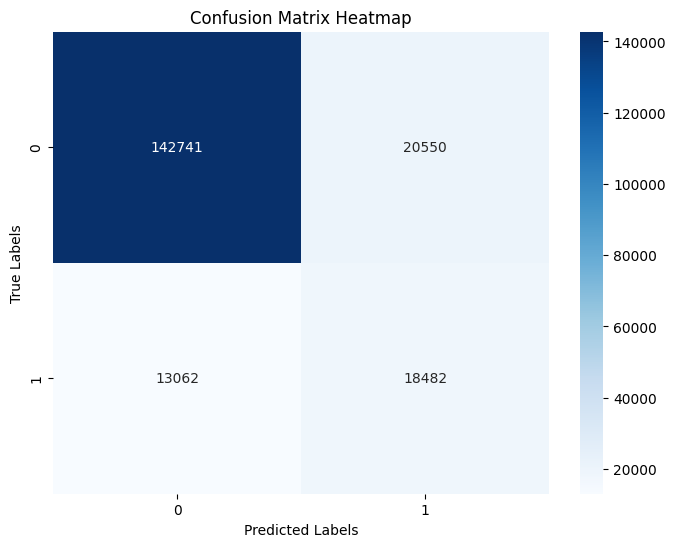

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_final)

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# Etiquetas y título
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [42]:
conf_matrix

array([[142741,  20550],
       [ 13062,  18482]], dtype=int64)

In [43]:
import winsound
winsound.Beep(700, 1000)

### **9.2. Entrenar modelo con datos Undersampling**

In [10]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [11]:
print(len(X_train))
print(len(X_train_resampled))

454613
147202


In [12]:
y_train_resampled.value_counts()

compro_en_meses_target
0    73601
1    73601
Name: count, dtype: int64

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score
import optuna
import time

In [14]:
# Marca de tiempo inicial
start_time = time.time()

def objective(trial):
    # Hiperparámetros del Random Forest
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 3, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    class_weight = trial.suggest_categorical("class_weight", ["balanced", "balanced_subsample", None])
    
    # Crear el modelo
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        class_weight=class_weight,
        random_state=42,
        n_jobs=-1
    )
    
    # Entrenar el modelo
    model.fit(X_train_resampled, y_train_resampled)

    # Predecir probabilidades y etiquetas
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1
    
    # Métricas individuales
    f1 = f1_score(y_test, y_pred, average="macro")
    roc_auc = roc_auc_score(y_test, y_prob)
    recall = recall_score(y_test, y_pred, pos_label=1)
    
    # Métrica combinada personalizada
    combined_metric = (f1 + roc_auc + recall) / 3
    
    return combined_metric

# Configurar Optuna con una semilla para garantizar reproducibilidad
sampler = optuna.samplers.TPESampler(seed=42)
# Crear el estudio de Optuna
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=30, n_jobs=-1)


# Entrenar el modelo final con los mejores parámetros
best_params = study.best_params
final_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_features=best_params["max_features"],
    class_weight=best_params["class_weight"],
    random_state=42,
    n_jobs=-1
)
final_model.fit(X_train, y_train)

# Predicciones finales y evaluación
y_pred_final = final_model.predict(X_test)
y_prob_final = final_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1

# Métricas individuales
final_f1 = f1_score(y_test, y_pred_final, average="macro")
final_roc_auc = roc_auc_score(y_test, y_prob_final)
final_recall = recall_score(y_test, y_pred_final, pos_label=1)
accuracy = accuracy_score(y_test, y_pred_final)

# Métrica combinada personalizada
combined_metric = (final_f1 + final_roc_auc + final_recall) / 3

print("Mejores Hiperparámetros:")
print(best_params)
print(f"\nf1_score: {final_f1}")
print(f"roc_auc: {final_roc_auc}")
print(f"recall: {final_recall}")
print(f"accuracy: {accuracy}")
print(f"combined_metric: {combined_metric}")
print(classification_report(y_test, y_pred_final))

# Marca de tiempo final
end_time = time.time()

# Calcula el tiempo transcurrido
execution_time = end_time - start_time
print(f"\nTiempo de ejecución: {execution_time} segundos")

[I 2024-12-30 21:41:11,056] A new study created in memory with name: no-name-674df837-aeef-48e8-8281-9aacc5a30295
[I 2024-12-30 21:43:40,228] Trial 7 finished with value: 0.6248698798305855 and parameters: {'n_estimators': 81, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': None, 'class_weight': None}. Best is trial 7 with value: 0.6248698798305855.
[I 2024-12-30 21:43:40,560] Trial 8 finished with value: 0.613954519570551 and parameters: {'n_estimators': 133, 'max_depth': 8, 'min_samples_split': 12, 'min_samples_leaf': 14, 'max_features': 'log2', 'class_weight': None}. Best is trial 7 with value: 0.6248698798305855.
[I 2024-12-30 21:43:50,402] Trial 6 finished with value: 0.633594616570998 and parameters: {'n_estimators': 136, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 18, 'max_features': 'log2', 'class_weight': 'balanced'}. Best is trial 6 with value: 0.633594616570998.
[I 2024-12-30 21:44:12,658] Trial 9 finished with value: 0.611058

Mejores Hiperparámetros:
{'n_estimators': 384, 'max_depth': 30, 'min_samples_split': 13, 'min_samples_leaf': 1, 'max_features': None, 'class_weight': 'balanced'}

f1_score: 0.7123307215482235
roc_auc: 0.849051092409481
recall: 0.5878772508242455
accuracy: 0.8300459363050786
combined_metric: 0.71641968826065
              precision    recall  f1-score   support

           0       0.92      0.88      0.90    163291
           1       0.48      0.59      0.53     31544

    accuracy                           0.83    194835
   macro avg       0.70      0.73      0.71    194835
weighted avg       0.85      0.83      0.84    194835


Tiempo de ejecución: 2104.8658740520477 segundos


In [24]:
# minutos de ejecución
2104/60

35.06666666666667

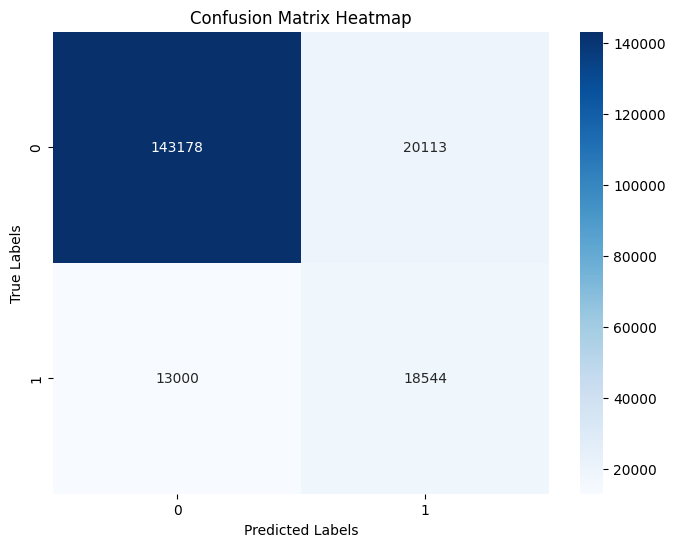

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_final)

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# Etiquetas y título
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [17]:
conf_matrix

array([[143178,  20113],
       [ 13000,  18544]], dtype=int64)

In [18]:
import winsound
winsound.Beep(700, 1000)

### **9.3. Reentrenar mejor modelo e importancia de variables**

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score
import optuna
import time

In [15]:
# Marca de tiempo inicial
start_time = time.time()
    
# Crear el modelo
model_6_5 = RandomForestClassifier(
    n_estimators=384,
    max_depth=30,
    min_samples_split=13,
    min_samples_leaf=1,
    max_features=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Entrenar el modelo
model_6_5.fit(X_train_resampled, y_train_resampled)

# Predecir probabilidades y etiquetas
y_pred = model_6_5.predict(X_test)
y_prob = model_6_5.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1

# Métricas individuales
f1 = f1_score(y_test, y_pred, average="macro")
roc_auc = roc_auc_score(y_test, y_prob)
recall = recall_score(y_test, y_pred, pos_label=1)
accuracy = accuracy_score(y_test, y_pred)

# Métrica combinada personalizada
combined_metric = (f1 + roc_auc + recall) / 3

print(f"\nf1_score: {f1}")
print(f"roc_auc: {roc_auc}")
print(f"recall: {recall}")
print(f"accuracy: {accuracy}")
print(f"combined_metric: {combined_metric}")
print(classification_report(y_test, y_pred))

# Marca de tiempo final
end_time = time.time()

# Calcula el tiempo transcurrido
execution_time = end_time - start_time
print(f"\nTiempo de ejecución: {execution_time} segundos")


f1_score: 0.685097361060728
roc_auc: 0.8272416497814707
recall: 0.6431968044636064
accuracy: 0.792629660995201
combined_metric: 0.7185119384352684
              precision    recall  f1-score   support

           0       0.92      0.82      0.87    163291
           1       0.41      0.64      0.50     31544

    accuracy                           0.79    194835
   macro avg       0.67      0.73      0.69    194835
weighted avg       0.84      0.79      0.81    194835


Tiempo de ejecución: 282.66493129730225 segundos


#### **9.3.1. Exportar modelo**

In [16]:
from joblib import dump
# Guarda el modelo en un archivo
dump(model_6_5, 'Modelos entrenados/random_forest_model_6_5.joblib')

['Modelos entrenados/random_forest_model_6_5.joblib']

#### **9.3.2. Importar modelo**

In [17]:
from joblib import load
# Carga el modelo desde el archivo
rf_model_6_5_loaded = load('Modelos entrenados/random_forest_model_6_5.joblib')

# Ahora puedes usar el modelo cargado para predicciones
predictions = rf_model_6_5_loaded.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87    163291
           1       0.41      0.64      0.50     31544

    accuracy                           0.79    194835
   macro avg       0.67      0.73      0.69    194835
weighted avg       0.84      0.79      0.81    194835



#### **9.3.3. Importancia de las variables**

In [19]:
feature_importances = model_6_5.feature_importances_

# Crea un DataFrame con las columnas y su importancia
importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Cambia 'X_train.columns' por los nombres de las columnas en tus datos
    'Importance': feature_importances
})

# Ordena las variables de mayor a menor importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Resetea el índice para mayor claridad
importance_df.reset_index(drop=True, inplace=True)

In [21]:
importance_df.head(15)

,Feature,Importance
0,conversion,0.186161
1,dias_prim_compra,0.159272
2,sum_venta_historica,0.144529
3,dias_ult_visita,0.090613
4,time_spent_platform,0.057446
5,dias_ult_visita_cart,0.033760
6,dias_ult_compra,0.020514
7,ticket_promedio,0.019565
8,venta,0.019427
9,can_venta,0.014033


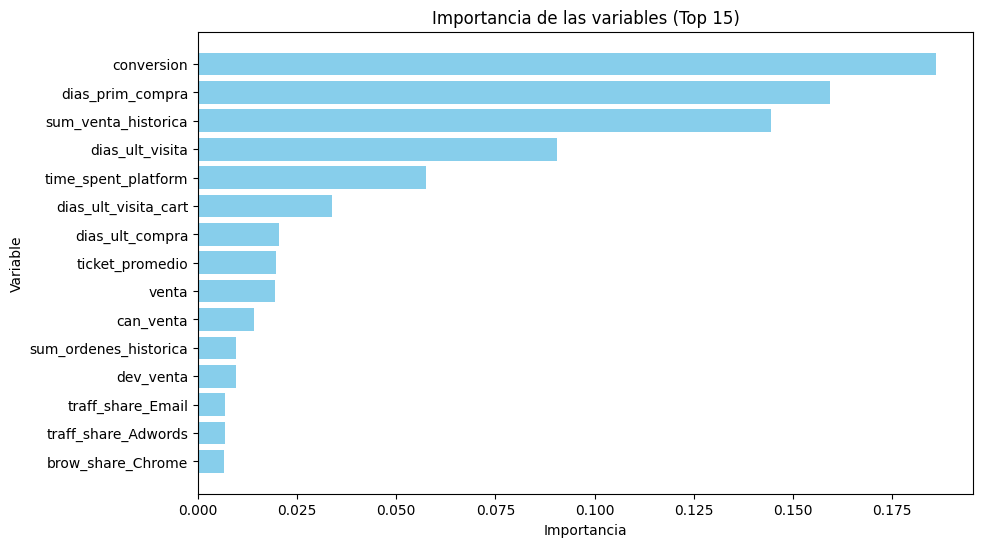

In [25]:
import matplotlib.pyplot as plt

# Toma las principales 15 variables más importantes
top_features = importance_df.head(15)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las variables (Top 15)')
plt.gca().invert_yaxis()  # Invierte el eje para que la más importante esté arriba
plt.show()

## **10. Entrenar modelo con configuración 6-12**

### **10.1. Entrenar modelo con datos originales**

In [27]:
import glob

In [28]:
file_pattern_2 = "data parquet/muestras_seleccionadas/Configuración 6-12/df_6_train_12_target_batch_*.parquet"

In [29]:
glob.glob(file_pattern_2)

['data parquet/muestras_seleccionadas/Configuración 6-12\\df_6_train_12_target_batch_0.parquet',
 'data parquet/muestras_seleccionadas/Configuración 6-12\\df_6_train_12_target_batch_1.parquet',
 'data parquet/muestras_seleccionadas/Configuración 6-12\\df_6_train_12_target_batch_2.parquet',
 'data parquet/muestras_seleccionadas/Configuración 6-12\\df_6_train_12_target_batch_3.parquet',
 'data parquet/muestras_seleccionadas/Configuración 6-12\\df_6_train_12_target_batch_4.parquet']

In [30]:
# Leer todos los archivos y unirlos verticalmente
dataframes_6_12 = [pd.read_parquet(file) for file in glob.glob(file_pattern_2)]
combined_df_6_12 = pd.concat(dataframes_6_12, ignore_index=True)

# Mostrar información del DataFrame combinado
print(combined_df_6_12.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481492 entries, 0 to 481491
Columns: 130 entries, user_id to compro_en_meses_target
dtypes: float32(24), float64(103), int32(1), int64(1), object(1)
memory usage: 431.6+ MB
None


In [31]:
combined_df_6_12

,user_id,created_at_monthnum,venta,ordenes,frecuencia,unidades,skus,dev_venta,dev_ordenes,dev_unidades,...,ticket_promedio,conversion,dias_ult_visita,dias_ult_visita_cart,dias_ult_compra,dias_prim_compra,visits_desde_ult_compra,sum_venta_historica,sum_ordenes_historica,compro_en_meses_target
0,2,201909,171.630005,1.0,3.0,3.0,3.0,0.0,0.0,0.0,...,171.630005,1.0,12.0,16.0,12.0,16.0,1.0,0.0,0.0,0
1,2,201910,171.630005,1.0,3.0,3.0,3.0,0.0,0.0,0.0,...,171.630005,1.0,42.0,46.0,42.0,46.0,1.0,0.0,0.0,0
2,2,201911,171.630005,1.0,3.0,3.0,3.0,0.0,0.0,0.0,...,171.630005,1.0,72.0,76.0,72.0,76.0,1.0,0.0,0.0,0
3,2,201912,171.630005,1.0,3.0,3.0,3.0,0.0,0.0,0.0,...,171.630005,1.0,102.0,106.0,102.0,106.0,1.0,0.0,0.0,0
4,2,202001,171.630005,1.0,3.0,3.0,3.0,0.0,0.0,0.0,...,171.630005,1.0,132.0,136.0,132.0,136.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481487,99999,202208,99.949997,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,99.949997,1.0,-1.0,-1.0,-1.0,-1.0,1.0,148.0,1.0,0
481488,99999,202209,99.949997,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,99.949997,1.0,-1.0,-1.0,-1.0,-1.0,1.0,148.0,1.0,0
481489,99999,202210,99.949997,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,99.949997,1.0,-1.0,-1.0,-1.0,-1.0,1.0,148.0,1.0,0
481490,99999,202211,99.949997,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,99.949997,1.0,-1.0,-1.0,-1.0,-1.0,1.0,148.0,1.0,0


In [32]:
conteo = combined_df_6_12['compro_en_meses_target'].value_counts()
porcentaje = (conteo / len(combined_df_6_12)) * 100

tabla_resultados = pd.DataFrame({
    'Conteo': conteo,
    'Porcentaje (%)': porcentaje
})
tabla_resultados

,Conteo,Porcentaje (%)
compro_en_meses_target,,
0,339742,70.560259
1,141750,29.439741


In [33]:
from sklearn.model_selection import train_test_split
# Separa X (características) e y (target)
X = combined_df_6_12.drop(columns=['compro_en_meses_target', 'user_id', 'created_at_monthnum']) 
y = combined_df_6_12['compro_en_meses_target']

# Divide los datos en entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score
import optuna
import time

In [52]:
# Marca de tiempo inicial
start_time = time.time()

def objective(trial):
    # Hiperparámetros del Random Forest
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 3, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    class_weight = trial.suggest_categorical("class_weight", ["balanced", "balanced_subsample", None])
    
    # Crear el modelo
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        class_weight=class_weight,
        random_state=42,
        n_jobs=-1
    )
    
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Predecir probabilidades y etiquetas
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1
    
    # Métricas individuales
    f1 = f1_score(y_test, y_pred, average="macro")
    roc_auc = roc_auc_score(y_test, y_prob)
    recall = recall_score(y_test, y_pred, pos_label=1)
    
    # Métrica combinada personalizada
    combined_metric = (f1 + roc_auc + recall) / 3
    
    return combined_metric

# Configurar Optuna con una semilla para garantizar reproducibilidad
sampler = optuna.samplers.TPESampler(seed=42)
# Crear el estudio de Optuna
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=30, n_jobs=-1)


# Entrenar el modelo final con los mejores parámetros
best_params = study.best_params
final_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_features=best_params["max_features"],
    class_weight=best_params["class_weight"],
    random_state=42,
    n_jobs=-1
)
final_model.fit(X_train, y_train)

# Predicciones finales y evaluación
y_pred_final = final_model.predict(X_test)
y_prob_final = final_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1

# Métricas individuales
final_f1 = f1_score(y_test, y_pred_final, average="macro")
final_roc_auc = roc_auc_score(y_test, y_prob_final)
final_recall = recall_score(y_test, y_pred_final, pos_label=1)
accuracy = accuracy_score(y_test, y_pred_final)

# Métrica combinada personalizada
combined_metric = (final_f1 + final_roc_auc + final_recall) / 3

print("Mejores Hiperparámetros:")
print(best_params)
print(f"\nf1_score: {final_f1}")
print(f"roc_auc: {final_roc_auc}")
print(f"recall: {final_recall}")
print(f"accuracy: {accuracy}")
print(f"combined_metric: {combined_metric}")
print(classification_report(y_test, y_pred_final))

# Marca de tiempo final
end_time = time.time()

# Calcula el tiempo transcurrido
execution_time = end_time - start_time
print(f"\nTiempo de ejecución: {execution_time} segundos")

[I 2024-12-30 14:00:48,257] A new study created in memory with name: no-name-db53732a-19b3-4cb9-a014-2a53427944fc
[I 2024-12-30 14:05:44,215] Trial 13 finished with value: 0.5467874548868811 and parameters: {'n_estimators': 151, 'max_depth': 6, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'class_weight': None}. Best is trial 13 with value: 0.5467874548868811.
[I 2024-12-30 14:06:10,854] Trial 11 finished with value: 0.6511300582404727 and parameters: {'n_estimators': 196, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'log2', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.6511300582404727.
[I 2024-12-30 14:06:34,873] Trial 12 finished with value: 0.568951375403873 and parameters: {'n_estimators': 221, 'max_depth': 8, 'min_samples_split': 12, 'min_samples_leaf': 18, 'max_features': 'log2', 'class_weight': None}. Best is trial 11 with value: 0.6511300582404727.
[I 2024-12-30 14:07:24,868] Trial 0 finished with value:

Mejores Hiperparámetros:
{'n_estimators': 299, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': None, 'class_weight': 'balanced_subsample'}

f1_score: 0.7655285918466879
roc_auc: 0.881078258389235
recall: 0.6720752498530276
accuracy: 0.8047601905183872
combined_metric: 0.7728940333629835
              precision    recall  f1-score   support

           0       0.86      0.86      0.86    101923
           1       0.67      0.67      0.67     42525

    accuracy                           0.80    144448
   macro avg       0.76      0.77      0.77    144448
weighted avg       0.81      0.80      0.80    144448


Tiempo de ejecución: 4563.655609130859 segundos


In [20]:
# minutos de ejecución
4563/60

76.05

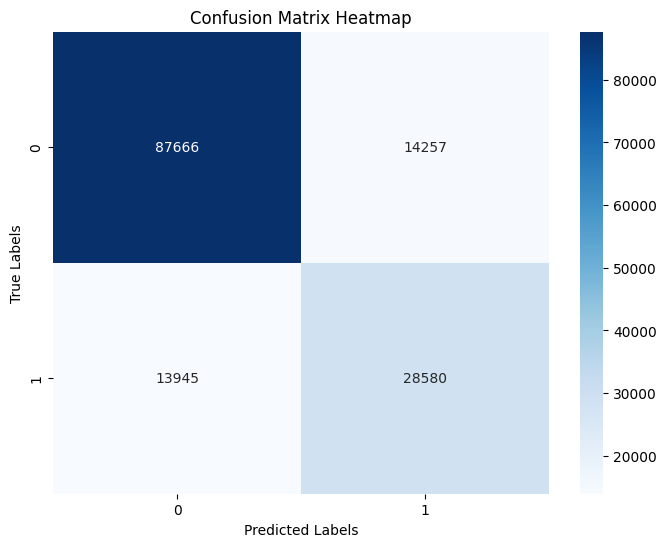

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_final)

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# Etiquetas y título
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [55]:
conf_matrix

array([[87666, 14257],
       [13945, 28580]], dtype=int64)

In [56]:
import winsound
winsound.Beep(700, 1000)

### **10.2. Entrenar modelo con datos Undersampling**

In [35]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [36]:
print(len(X_train))
print(len(X_train_resampled))

337044
198450


In [37]:
y_train_resampled.value_counts()

compro_en_meses_target
0    99225
1    99225
Name: count, dtype: int64

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score
import optuna
import time

In [61]:
# Marca de tiempo inicial
start_time = time.time()

def objective(trial):
    # Hiperparámetros del Random Forest
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 3, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    class_weight = trial.suggest_categorical("class_weight", ["balanced", "balanced_subsample", None])
    
    # Crear el modelo
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        class_weight=class_weight,
        random_state=42,
        n_jobs=-1
    )
    
    # Entrenar el modelo
    model.fit(X_train_resampled, y_train_resampled)

    # Predecir probabilidades y etiquetas
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1
    
    # Métricas individuales
    f1 = f1_score(y_test, y_pred, average="macro")
    roc_auc = roc_auc_score(y_test, y_prob)
    recall = recall_score(y_test, y_pred, pos_label=1)
    
    # Métrica combinada personalizada
    combined_metric = (f1 + roc_auc + recall) / 3
    
    return combined_metric

# Configurar Optuna con una semilla para garantizar reproducibilidad
sampler = optuna.samplers.TPESampler(seed=42)
# Crear el estudio de Optuna
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=30, n_jobs=-1)


# Entrenar el modelo final con los mejores parámetros
best_params = study.best_params
final_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_features=best_params["max_features"],
    class_weight=best_params["class_weight"],
    random_state=42,
    n_jobs=-1
)
final_model.fit(X_train, y_train)

# Predicciones finales y evaluación
y_pred_final = final_model.predict(X_test)
y_prob_final = final_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1

# Métricas individuales
final_f1 = f1_score(y_test, y_pred_final, average="macro")
final_roc_auc = roc_auc_score(y_test, y_prob_final)
final_recall = recall_score(y_test, y_pred_final, pos_label=1)
accuracy = accuracy_score(y_test, y_pred_final)

# Métrica combinada personalizada
combined_metric = (final_f1 + final_roc_auc + final_recall) / 3

print("Mejores Hiperparámetros:")
print(best_params)
print(f"\nf1_score: {final_f1}")
print(f"roc_auc: {final_roc_auc}")
print(f"recall: {final_recall}")
print(f"accuracy: {accuracy}")
print(f"combined_metric: {combined_metric}")
print(classification_report(y_test, y_pred_final))

# Marca de tiempo final
end_time = time.time()

# Calcula el tiempo transcurrido
execution_time = end_time - start_time
print(f"\nTiempo de ejecución: {execution_time} segundos")

[I 2024-12-30 15:16:53,367] A new study created in memory with name: no-name-2d5a3e62-657d-4b24-866f-8657d941b66f
[I 2024-12-30 15:18:43,498] Trial 4 finished with value: 0.6467935224415092 and parameters: {'n_estimators': 64, 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 11, 'max_features': 'sqrt', 'class_weight': 'balanced_subsample'}. Best is trial 4 with value: 0.6467935224415092.
[I 2024-12-30 15:19:01,881] Trial 9 finished with value: 0.6653016740451085 and parameters: {'n_estimators': 76, 'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'class_weight': None}. Best is trial 9 with value: 0.6653016740451085.
[I 2024-12-30 15:19:04,063] Trial 10 finished with value: 0.6928571211371924 and parameters: {'n_estimators': 57, 'max_depth': 13, 'min_samples_split': 13, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'class_weight': None}. Best is trial 10 with value: 0.6928571211371924.
[I 2024-12-30 15:19:20,790] Trial 12 finished with

Mejores Hiperparámetros:
{'n_estimators': 477, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': None, 'class_weight': 'balanced'}

f1_score: 0.7847102498472841
roc_auc: 0.8942017903418612
recall: 0.696413874191652
accuracy: 0.8210844040762073
combined_metric: 0.7917753047935991
              precision    recall  f1-score   support

           0       0.87      0.87      0.87    101923
           1       0.70      0.70      0.70     42525

    accuracy                           0.82    144448
   macro avg       0.78      0.78      0.78    144448
weighted avg       0.82      0.82      0.82    144448


Tiempo de ejecución: 3204.9583563804626 segundos


In [19]:
# minutos de ejecución
3204/60

53.4

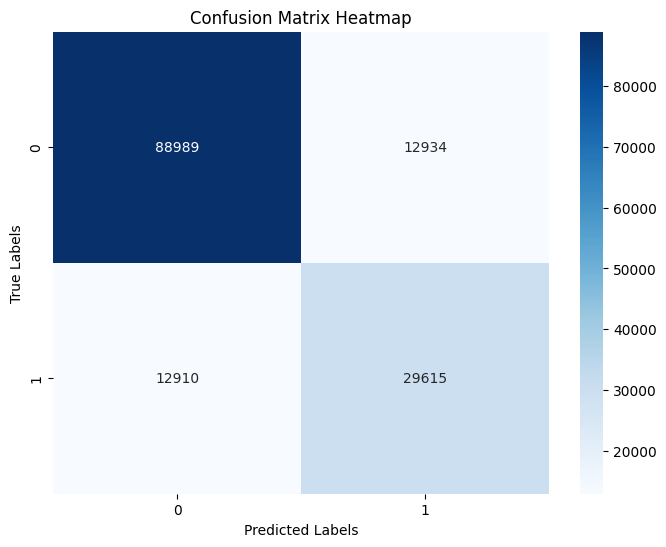

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_final)

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# Etiquetas y título
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [64]:
conf_matrix

array([[88989, 12934],
       [12910, 29615]], dtype=int64)

In [48]:
import winsound
winsound.Beep(700, 1000)

### **10.3. Reentrenar mejor modelo e importancia de variables**

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score
import optuna
import time

In [42]:
# Marca de tiempo inicial
start_time = time.time()
    
# Crear el modelo
model_6_12 = RandomForestClassifier(
    n_estimators=477,
    max_depth=30,
    min_samples_split=9,
    min_samples_leaf=1,
    max_features=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Entrenar el modelo
model_6_12.fit(X_train_resampled, y_train_resampled)

# Predecir probabilidades y etiquetas
y_pred = model_6_12.predict(X_test)
y_prob = model_6_12.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1

# Métricas individuales
f1 = f1_score(y_test, y_pred, average="macro")
roc_auc = roc_auc_score(y_test, y_prob)
recall = recall_score(y_test, y_pred, pos_label=1)
accuracy = accuracy_score(y_test, y_pred)

# Métrica combinada personalizada
combined_metric = (f1 + roc_auc + recall) / 3

print(f"\nf1_score: {f1}")
print(f"roc_auc: {roc_auc}")
print(f"recall: {recall}")
print(f"accuracy: {accuracy}")
print(f"combined_metric: {combined_metric}")
print(classification_report(y_test, y_pred))

# Marca de tiempo final
end_time = time.time()

# Calcula el tiempo transcurrido
execution_time = end_time - start_time
print(f"\nTiempo de ejecución: {execution_time} segundos")


f1_score: 0.7697587813779552
roc_auc: 0.8763739315306457
recall: 0.7406937095825985
accuracy: 0.8002949158174568
combined_metric: 0.7956088074970665
              precision    recall  f1-score   support

           0       0.88      0.83      0.85    101923
           1       0.64      0.74      0.69     42525

    accuracy                           0.80    144448
   macro avg       0.76      0.78      0.77    144448
weighted avg       0.81      0.80      0.80    144448


Tiempo de ejecución: 545.7141344547272 segundos


#### **9.3.1. Exportar modelo**

In [43]:
from joblib import dump
# Guarda el modelo en un archivo
dump(model_6_12, 'Modelos entrenados/random_forest_model_6_12.joblib')

['Modelos entrenados/random_forest_model_6_12.joblib']

#### **9.3.2. Importar modelo**

In [44]:
from joblib import load
# Carga el modelo desde el archivo
rf_model_6_12_loaded = load('Modelos entrenados/random_forest_model_6_12.joblib')

# Ahora puedes usar el modelo cargado para predicciones
predictions = rf_model_6_12_loaded.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85    101923
           1       0.64      0.74      0.69     42525

    accuracy                           0.80    144448
   macro avg       0.76      0.78      0.77    144448
weighted avg       0.81      0.80      0.80    144448



#### **9.3.3. Importancia de las variables**

In [55]:
feature_importances = model_6_12.feature_importances_

# Crea un DataFrame con las columnas y su importancia
importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Cambia 'X_train.columns' por los nombres de las columnas en tus datos
    'Importance': feature_importances
})

# Ordena las variables de mayor a menor importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Resetea el índice para mayor claridad
importance_df.reset_index(drop=True, inplace=True)

In [56]:
importance_df.head(15)

,Feature,Importance
0,dias_prim_compra,0.198292
1,conversion,0.186877
2,sum_venta_historica,0.138069
3,time_spent_platform,0.062061
4,dias_ult_visita_cart,0.032660
5,dias_ult_compra,0.030303
6,dias_ult_visita,0.029851
7,ticket_promedio,0.026633
8,venta,0.026126
9,can_venta,0.010396


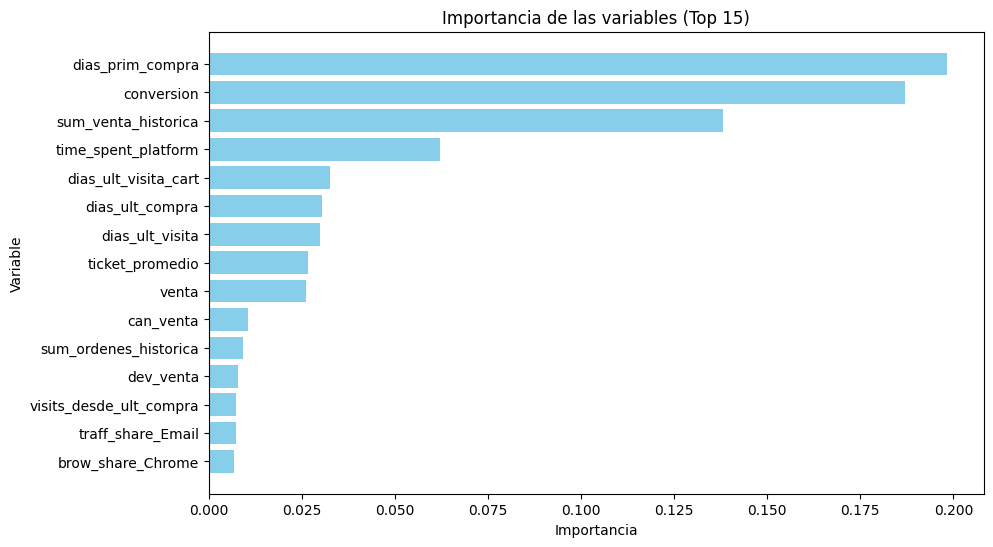

In [58]:
import matplotlib.pyplot as plt

# Toma las principales 15 variables más importantes
top_features = importance_df.head(15)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las variables (Top 15)')
plt.gca().invert_yaxis()  # Invierte el eje para que la más importante esté arriba
plt.show()

## **11. Modelos - todos los meses concatenados**

In [2]:
import glob

In [3]:
file_pattern_3 = "data parquet/capturas/df_capturas_batch_*.parquet"

In [4]:
glob.glob(file_pattern_3)

['data parquet/capturas\\df_capturas_batch_0.parquet',
 'data parquet/capturas\\df_capturas_batch_1.parquet',
 'data parquet/capturas\\df_capturas_batch_2.parquet',
 'data parquet/capturas\\df_capturas_batch_3.parquet',
 'data parquet/capturas\\df_capturas_batch_4.parquet']

In [5]:
# Leer todos los archivos y unirlos verticalmente
df_meses_concact = [pd.read_parquet(file) for file in glob.glob(file_pattern_3)]
combined_df_meses_concact = pd.concat(df_meses_concact, ignore_index=True)

# Mostrar información del DataFrame combinado
print(combined_df_meses_concact.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481492 entries, 0 to 481491
Columns: 755 entries, user_id to compro_12_meses_posteriores
dtypes: float32(752), int32(1), int64(1), object(1)
memory usage: 1.4+ GB
None


In [6]:
combined_df_meses_concact

,user_id,created_at_monthnum,venta_1,ordenes_1,frecuencia_1,unidades_1,skus_1,ticket_promedio_1,cat_share_Accessories_1,cat_share_Active_1,...,brow_share_Safari_6,dias_ult_visita_6,dias_ult_visita_cart_6,dias_ult_compra_6,dias_prim_compra_6,visits_desde_ult_compra_6,time_spent_platform_6,sum_venta_historica,sum_ordenes_historica,compro_12_meses_posteriores
0,2,201909,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.333333,12.0,16.0,12.0,16.0,1.0,45.966667,0.0,0.0,0
1,2,201910,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,0.0,0.0,0
2,2,201911,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,0.0,0.0,0
3,2,201912,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,0.0,0.0,0
4,2,202001,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481487,99999,202208,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,148.0,1.0,0
481488,99999,202209,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,148.0,1.0,0
481489,99999,202210,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,148.0,1.0,0
481490,99999,202211,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,148.0,1.0,0


In [7]:
# Extraer 1000 filas aleatorias
sample_df = combined_df_meses_concact.sample(n=2000, random_state=42)

In [8]:
sample_df

,user_id,created_at_monthnum,venta_1,ordenes_1,frecuencia_1,unidades_1,skus_1,ticket_promedio_1,cat_share_Accessories_1,cat_share_Active_1,...,brow_share_Safari_6,dias_ult_visita_6,dias_ult_visita_cart_6,dias_ult_compra_6,dias_prim_compra_6,visits_desde_ult_compra_6,time_spent_platform_6,sum_venta_historica,sum_ordenes_historica,compro_12_meses_posteriores
35448,7565,202204,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,93.949997,1.0,0
395137,82128,202011,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.5,7.0,8.0,-1.0,-1.0,0.0,15.583333,0.000000,0.0,0
232608,48422,202112,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,0.000000,0.0,0
477285,99132,202108,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,200.440002,2.0,0
433102,90000,202302,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.5,24.0,28.0,-1.0,-1.0,0.0,13.183333,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441881,91857,202007,5.95,1.0,1.0,1.0,1.0,5.95,0.0,0.0,...,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,0.000000,0.0,0
397349,82589,202010,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,0.000000,0.0,0
48413,10169,202104,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.000000,19.980000,1.0,1
459156,95340,202109,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,9.0,13.0,-1.0,-1.0,0.0,40.316666,0.000000,0.0,0


In [9]:
conteo = sample_df['compro_12_meses_posteriores'].value_counts()
porcentaje = (conteo / len(sample_df)) * 100

tabla_resultados = pd.DataFrame({
    'Conteo': conteo,
    'Porcentaje (%)': porcentaje
})
tabla_resultados

,Conteo,Porcentaje (%)
compro_12_meses_posteriores,,
0,1411,70.55
1,589,29.45


In [10]:
from sklearn.model_selection import train_test_split

# Separa X (características) e y (target)
X = sample_df.drop(columns=['compro_12_meses_posteriores', 'user_id', 'created_at_monthnum']) 
y = sample_df['compro_12_meses_posteriores']

# Divide los datos en entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Verifica la distribución de clases
print("Distribución en y_train:")
print(y_train.value_counts()) #normalize=True
print("\nDistribución en y_test:")
print(y_test.value_counts()) #normalize=True

Distribución en y_train:
compro_12_meses_posteriores
0    988
1    412
Name: count, dtype: int64

Distribución en y_test:
compro_12_meses_posteriores
0    423
1    177
Name: count, dtype: int64


### **11.1. Regresión Logística**

In [11]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score

# Escalamos los datos para la regresión logística
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Función objetivo para Optuna
def objective(trial):
    # Hiperparámetros a optimizar
    C = trial.suggest_float("C", 1e-4, 1e4, log=True)  # Regularización
    penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet"])
    solver = trial.suggest_categorical(
        "solver", ["lbfgs", "liblinear", "saga", "newton-cg"]
    )
    
    # Validamos combinaciones incompatibles
    if penalty == "l1" and solver not in ["liblinear", "saga"]:
        raise optuna.exceptions.TrialPruned()  # Prune la combinación inválida
    if penalty == "elasticnet" and solver != "saga":
        raise optuna.exceptions.TrialPruned()  # Prune la combinación inválida
    if penalty == "none" and solver not in ["lbfgs", "newton-cg", "saga"]:
        raise optuna.exceptions.TrialPruned()  # Prune la combinación inválida
    
    # Solo definir l1_ratio si es elasticnet
    l1_ratio = None
    if penalty == "elasticnet":
        l1_ratio = trial.suggest_float("l1_ratio", 0.01, 1.0)  # Rango uniforme válido

    # Aplicamos balanceo de clases automático
    class_weight = "balanced"  

    # Definimos el modelo
    model = LogisticRegression(
        C=C,
        penalty=penalty,
        solver=solver,
        l1_ratio=l1_ratio,
        class_weight=class_weight,
        random_state=42,
        max_iter=1000,  # Aumentar iteraciones para convergencia
    )

    # Entrenamos el modelo
    model.fit(X_train, y_train)

    # Predecimos en el conjunto de prueba
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1
    
    # Métricas individuales
    f1 = f1_score(y_test, y_pred, average="macro")
    roc_auc = roc_auc_score(y_test, y_prob)
    recall = recall_score(y_test, y_pred, pos_label=1)
    
    # Métrica combinada personalizada
    combined_metric = (f1 + roc_auc + recall) / 3
    
    return f1#combined_metric

# Crear el estudio de Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)

# Mejor resultado
print("Mejores hiperparámetros encontrados:")
print(study.best_params)

print(f"Mejor f1: {study.best_value:.4f}")

[I 2024-12-31 16:13:49,509] A new study created in memory with name: no-name-0780c399-b535-4966-96f6-516e3e0ffc86
[I 2024-12-31 16:13:49,509] Trial 1 pruned. 
[I 2024-12-31 16:13:49,523] Trial 3 pruned. 
[I 2024-12-31 16:13:49,527] Trial 6 pruned. 
[I 2024-12-31 16:13:49,530] Trial 8 pruned. 
[I 2024-12-31 16:13:49,531] Trial 9 pruned. 
[I 2024-12-31 16:13:49,532] Trial 10 pruned. 
[I 2024-12-31 16:13:49,532] Trial 13 pruned. 
[I 2024-12-31 16:13:49,532] Trial 14 pruned. 
[I 2024-12-31 16:13:49,559] Trial 19 pruned. 
[I 2024-12-31 16:13:49,611] Trial 24 pruned. 
[I 2024-12-31 16:13:49,743] Trial 7 finished with value: 0.6155585707824514 and parameters: {'C': 0.025630951489977485, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 7 with value: 0.6155585707824514.
[I 2024-12-31 16:13:49,749] Trial 18 finished with value: 0.41348973607038125 and parameters: {'C': 0.000664021895575139, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 7 with value: 0.6155585707824514.
[I 2024-12-

Mejores hiperparámetros encontrados:
{'C': 0.031732530166783936, 'penalty': 'l1', 'solver': 'saga'}
Mejor f1: 0.6239


### **11.2. Naive Bayes**

In [12]:
import optuna
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score

def objective(trial):
    # Hiperparámetros de GaussianNB
    var_smoothing = trial.suggest_float("var_smoothing", 1e-12, 1e-3, log=True)
    
    # Crear modelo con los hiperparámetros sugeridos
    model = GaussianNB(var_smoothing=var_smoothing)
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Hacer predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1
    
    # Métricas individuales
    f1 = f1_score(y_test, y_pred, average="macro")
    roc_auc = roc_auc_score(y_test, y_prob)
    recall = recall_score(y_test, y_pred, pos_label=1)
    
    # Métrica combinada personalizada
    combined_metric = (f1 + roc_auc + recall) / 3
    
    return f1#combined_metric

# Crear estudio de Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)

# Mostrar los mejores resultados
print("Mejor valor de f1:", study.best_value)
print("Mejores hiperparámetros:", study.best_params)

[I 2024-12-31 16:24:50,648] A new study created in memory with name: no-name-857d9ff5-2b78-46f2-99ee-44929c3fd925
[I 2024-12-31 16:24:50,938] Trial 9 finished with value: 0.49646525276777376 and parameters: {'var_smoothing': 6.116872554665266e-09}. Best is trial 9 with value: 0.49646525276777376.
[I 2024-12-31 16:24:50,938] Trial 0 finished with value: 0.49646525276777376 and parameters: {'var_smoothing': 1.0631029125089277e-08}. Best is trial 9 with value: 0.49646525276777376.
[I 2024-12-31 16:24:50,938] Trial 12 finished with value: 0.5076097932795691 and parameters: {'var_smoothing': 0.00010245936653338313}. Best is trial 12 with value: 0.5076097932795691.
[I 2024-12-31 16:24:50,955] Trial 5 finished with value: 0.49319255348707974 and parameters: {'var_smoothing': 1.5240278275918557e-10}. Best is trial 12 with value: 0.5076097932795691.
[I 2024-12-31 16:24:50,957] Trial 6 finished with value: 0.49646525276777376 and parameters: {'var_smoothing': 3.861845739397955e-09}. Best is tria

Mejor valor de f1: 0.5093403353397346
Mejores hiperparámetros: {'var_smoothing': 4.325500459318205e-05}


### **11.3. k-Nearest Neighbors (k-NN)**

In [13]:
import optuna
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Escalar las características para KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    # Hiperparámetros del modelo
    n_neighbors = trial.suggest_int("n_neighbors", 2, 50)
    weights = trial.suggest_categorical("weights", ["uniform", "distance"])
    metric = trial.suggest_categorical("metric", ["euclidean", "manhattan", "minkowski"])
    
    # Crear modelo con los hiperparámetros sugeridos
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
    
    # Entrenar el modelo
    model.fit(X_train_scaled, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para la clase 1
    
    # Métricas individuales
    f1 = f1_score(y_test, y_pred, average="macro")
    roc_auc = roc_auc_score(y_test, y_prob)
    recall = recall_score(y_test, y_pred, pos_label=1)
    
    # Métrica combinada personalizada
    combined_metric = (f1 + roc_auc + recall) / 3
    
    return f1#combined_metric

# Crear estudio de Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Mostrar los mejores resultados
print("Mejor valor de f1:", study.best_value)
print("Mejores hiperparámetros:", study.best_params)

# Entrenar el modelo final con los mejores parámetros
best_params = study.best_params
final_model = KNeighborsClassifier(
    n_neighbors=best_params["n_neighbors"],
    weights=best_params["weights"],
    metric=best_params["metric"]
)
final_model.fit(X_train_scaled, y_train)

# Predicciones finales y evaluación
y_pred_final = final_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_final))

[I 2024-12-31 16:24:51,862] A new study created in memory with name: no-name-f53aa9e7-4582-4eb4-9dca-e3fd1d721927
[I 2024-12-31 16:24:52,188] Trial 0 finished with value: 0.5266934066805514 and parameters: {'n_neighbors': 32, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 0 with value: 0.5266934066805514.
[I 2024-12-31 16:24:52,394] Trial 1 finished with value: 0.5404964542075728 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with value: 0.5404964542075728.
[I 2024-12-31 16:24:52,585] Trial 2 finished with value: 0.5249200628247785 and parameters: {'n_neighbors': 29, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with value: 0.5404964542075728.
[I 2024-12-31 16:24:52,799] Trial 3 finished with value: 0.48533393393681207 and parameters: {'n_neighbors': 40, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with value: 0.5404964542075728.
[I 2024-12-31 16:24:52,998] Trial 4 finished with value: 0.45

Mejor valor de f1: 0.5946898496240601
Mejores hiperparámetros: {'n_neighbors': 13, 'weights': 'uniform', 'metric': 'manhattan'}
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       423
           1       0.47      0.34      0.39       177

    accuracy                           0.69       600
   macro avg       0.61      0.59      0.59       600
weighted avg       0.67      0.69      0.68       600



### **11.4. Árboles de Decisión**

In [14]:
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def objective(trial):
    # Sugerir hiperparámetros para el modelo
    max_depth = trial.suggest_int("max_depth", 3, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])
    class_weight = trial.suggest_categorical("class_weight", ["balanced", None])
    
    # Crear el modelo con los hiperparámetros
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        class_weight=class_weight,
        random_state=42
    )
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir y calcular el F1-score
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1
    
    # Métricas individuales
    f1 = f1_score(y_test, y_pred, average="macro")
    roc_auc = roc_auc_score(y_test, y_prob)
    recall = recall_score(y_test, y_pred, pos_label=1)
    
    # Métrica combinada personalizada
    combined_metric = (f1 + roc_auc + recall) / 3
    
    return f1#combined_metric

# Crear el estudio de Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)

# Mostrar los mejores resultados
print("Mejor valor de f1:", study.best_value)
print("Mejores hiperparámetros:", study.best_params)

# Entrenar el modelo final con los mejores hiperparámetros
best_params = study.best_params
final_model = DecisionTreeClassifier(
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    criterion=best_params["criterion"],
    class_weight=best_params["class_weight"],
    random_state=42
)
final_model.fit(X_train, y_train)

# Evaluar el modelo final
y_pred_final = final_model.predict(X_test)
print(classification_report(y_test, y_pred_final))

[I 2024-12-31 16:25:00,119] A new study created in memory with name: no-name-365adaf8-9b72-4c1f-9212-0ffe9d9462a7
[I 2024-12-31 16:25:00,176] Trial 6 finished with value: 0.46252612720214986 and parameters: {'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 6, 'criterion': 'gini', 'class_weight': None}. Best is trial 6 with value: 0.46252612720214986.
[I 2024-12-31 16:25:00,184] Trial 3 finished with value: 0.5314940135346173 and parameters: {'max_depth': 27, 'min_samples_split': 11, 'min_samples_leaf': 19, 'criterion': 'gini', 'class_weight': 'balanced'}. Best is trial 3 with value: 0.5314940135346173.
[I 2024-12-31 16:25:00,195] Trial 5 finished with value: 0.6063129400055154 and parameters: {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 17, 'criterion': 'log_loss', 'class_weight': 'balanced'}. Best is trial 5 with value: 0.6063129400055154.
[I 2024-12-31 16:25:00,242] Trial 0 finished with value: 0.5307190939202906 and parameters: {'max_depth': 21, 'min_sampl

Mejor valor de f1: 0.6424416129856125
Mejores hiperparámetros: {'max_depth': 19, 'min_samples_split': 17, 'min_samples_leaf': 3, 'criterion': 'entropy', 'class_weight': 'balanced'}
              precision    recall  f1-score   support

           0       0.80      0.73      0.77       423
           1       0.47      0.58      0.52       177

    accuracy                           0.69       600
   macro avg       0.64      0.65      0.64       600
weighted avg       0.71      0.69      0.69       600



### **11.5. Random Forest**

In [15]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

def objective(trial):
    # Hiperparámetros del Random Forest
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 3, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    class_weight = trial.suggest_categorical("class_weight", ["balanced", "balanced_subsample", None])
    
    # Crear el modelo
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        class_weight=class_weight,
        random_state=42,
        n_jobs=-1
    )
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1
    
    # Métricas individuales
    f1 = f1_score(y_test, y_pred, average="macro")
    roc_auc = roc_auc_score(y_test, y_prob)
    recall = recall_score(y_test, y_pred, pos_label=1)
    
    # Métrica combinada personalizada
    combined_metric = (f1 + roc_auc + recall) / 3
    
    return f1#combined_metric

# Crear el estudio de Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)

# Mostrar los mejores resultados
print("Mejor valor de f1:", study.best_value)
print("Mejores hiperparámetros:", study.best_params)

# Entrenar el modelo final con los mejores parámetros
best_params = study.best_params
final_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_features=best_params["max_features"],
    class_weight=best_params["class_weight"],
    random_state=42,
    n_jobs=-1
)
final_model.fit(X_train, y_train)

# Predicciones finales y evaluación
y_pred_final = final_model.predict(X_test)
print(classification_report(y_test, y_pred_final))

[I 2024-12-31 16:25:01,158] A new study created in memory with name: no-name-94671c81-508d-480b-9122-bfe6a1ce40b0
[I 2024-12-31 16:25:06,875] Trial 12 finished with value: 0.41348973607038125 and parameters: {'n_estimators': 97, 'max_depth': 14, 'min_samples_split': 12, 'min_samples_leaf': 17, 'max_features': 'log2', 'class_weight': None}. Best is trial 12 with value: 0.41348973607038125.
[I 2024-12-31 16:25:07,750] Trial 8 finished with value: 0.5961771436263292 and parameters: {'n_estimators': 201, 'max_depth': 21, 'min_samples_split': 16, 'min_samples_leaf': 11, 'max_features': None, 'class_weight': 'balanced'}. Best is trial 8 with value: 0.5961771436263292.
[I 2024-12-31 16:25:07,782] Trial 0 finished with value: 0.5905249965877083 and parameters: {'n_estimators': 176, 'max_depth': 4, 'min_samples_split': 17, 'min_samples_leaf': 19, 'max_features': None, 'class_weight': 'balanced'}. Best is trial 8 with value: 0.5961771436263292.
[I 2024-12-31 16:25:08,089] Trial 2 finished with v

Mejor valor de f1: 0.6517443655449213
Mejores hiperparámetros: {'n_estimators': 414, 'max_depth': 29, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'class_weight': 'balanced_subsample'}
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       423
           1       0.48      0.63      0.54       177

    accuracy                           0.69       600
   macro avg       0.65      0.67      0.65       600
weighted avg       0.72      0.69      0.70       600



### **11.6. XGBoost**

In [16]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

def objective(trial):
    # Sugerir hiperparámetros para XGBoost
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 10),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1, 10)  # Para manejar el desbalanceo
    }
    
    # Crear el modelo
    model = XGBClassifier(
        **params,
        random_state=42,
        use_label_encoder=False,  # Evitar el warning de codificación de etiquetas
        eval_metric="logloss"
    )
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1
    
    # Métricas individuales
    f1 = f1_score(y_test, y_pred, average="macro")
    roc_auc = roc_auc_score(y_test, y_prob)
    recall = recall_score(y_test, y_pred, pos_label=1)
    
    # Métrica combinada personalizada
    combined_metric = (f1 + roc_auc + recall) / 3
    
    return f1#combined_metric

# Crear el estudio de Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)

# Mostrar los mejores resultados
print("Mejor valor de f1:", study.best_value)
print("Mejores hiperparámetros:", study.best_params)

# Entrenar el modelo final con los mejores hiperparámetros
best_params = study.best_params
final_model = XGBClassifier(
    **best_params,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
final_model.fit(X_train, y_train)

# Evaluar el modelo final
y_pred_final = final_model.predict(X_test)
print(classification_report(y_test, y_pred_final))

[I 2024-12-31 16:25:19,784] A new study created in memory with name: no-name-e6346416-7088-4177-ab95-d3a9326f4f7d
[I 2024-12-31 16:25:23,312] Trial 0 finished with value: 0.5033278147534972 and parameters: {'n_estimators': 274, 'max_depth': 13, 'learning_rate': 0.07142907413704969, 'subsample': 0.5006150644330349, 'colsample_bytree': 0.5511444098478833, 'gamma': 4.702595367283939, 'reg_alpha': 3.906852211151335, 'reg_lambda': 6.8582097459728955, 'scale_pos_weight': 4.243166313202389}. Best is trial 0 with value: 0.5033278147534972.
[I 2024-12-31 16:25:23,340] Trial 2 finished with value: 0.44957351706907656 and parameters: {'n_estimators': 187, 'max_depth': 5, 'learning_rate': 0.0739304683470936, 'subsample': 0.7530984279418416, 'colsample_bytree': 0.9233588146528908, 'gamma': 2.424160100187338, 'reg_alpha': 7.916341299028055, 'reg_lambda': 8.528863032020531, 'scale_pos_weight': 5.075195630181696}. Best is trial 0 with value: 0.5033278147534972.
[I 2024-12-31 16:25:23,825] Trial 14 fin

Mejor valor de f1: 0.6399694889397407
Mejores hiperparámetros: {'n_estimators': 141, 'max_depth': 14, 'learning_rate': 0.22895601192984028, 'subsample': 0.7317239753992711, 'colsample_bytree': 0.7296358174810686, 'gamma': 4.910687619412283, 'reg_alpha': 2.5236153043766807, 'reg_lambda': 7.485646409062809, 'scale_pos_weight': 1.5593657349735135}
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       423
           1       0.50      0.47      0.49       177

    accuracy                           0.70       600
   macro avg       0.64      0.64      0.64       600
weighted avg       0.70      0.70      0.70       600



C:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning:

[16:25:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




### **11.7. Support Vector Machines (SVM)**

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Escalar las características para KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los hiperparámetros para la búsqueda
param_grid = {
    "C": [0.1, 1, 10, 100],  # Valores típicos para la regularización
    "kernel": ["linear", "rbf"],  # Tipos comunes de kernel
    "gamma": ["scale", "auto"]  # Opciones estándar para SVM
}

# Crear el modelo base
svc = SVC(class_weight="balanced", random_state=42)

# Crear el GridSearchCV
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring=make_scorer(f1_score),  # Optimizar el F1-score
    cv=3,  # Validación cruzada con 5 particiones
    verbose=2
)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train_scaled, y_train)

# Mostrar los mejores resultados
print("Mejor F1-score:", grid_search.best_score_)
print("Mejores hiperparámetros:", grid_search.best_params_)

# Entrenar el modelo final con los mejores parámetros
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Evaluar el modelo final
y_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=auto

### **11.8. Red Neuronal Profunda**

In [12]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report

# # Obtener todas las clases presentes en y_train
# unique_classes = np.unique(y_train)

# # Calcular pesos de las clases para manejar desbalance
# class_weights = class_weight.compute_class_weight(
#     class_weight='balanced', classes=unique_classes, y=y_train
# )
# class_weights = {0: class_weights[0], 1: class_weights[1]}

# Función objetivo para Optuna
def objective(trial):
    # Hiperparámetros sugeridos
    n_layers = trial.suggest_int("n_layers", 1, 3)
    n_units = trial.suggest_int("n_units", 32, 256, step=32)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5, step=0.1)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128])
    epochs = trial.suggest_int("epochs", 10, 50)

    # Construcción del modelo
    model = Sequential()
    for _ in range(n_layers):
        model.add(Dense(n_units, activation="relu"))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))  # Salida para clasificación binaria

    # Compilación del modelo
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    # Entrenamiento del modelo
    history = model.fit(
        X_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        # class_weight=class_weights,
        verbose=0  # Ocultar logs de entrenamiento
    )

    # Predicciones y cálculo de F1-score
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    
    # Métricas individuales
    f1 = f1_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, pos_label=1)
    
    # Métrica combinada personalizada
    combined_metric = (f1 + recall) / 2
    
    return combined_metric

# Crear el estudio de Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)

# Mostrar los mejores resultados
print("Mejor valor de combined_metric:", study.best_value)
print("Mejores hiperparámetros:", study.best_params)

# Entrenar el modelo final con los mejores hiperparámetros
best_params = study.best_params

# Reconstruir y entrenar el modelo final
final_model = Sequential()
for _ in range(best_params["n_layers"]):
    final_model.add(Dense(best_params["n_units"], activation="relu"))
    final_model.add(Dropout(best_params["dropout_rate"]))
final_model.add(Dense(1, activation="sigmoid"))

final_model.compile(
    optimizer=Adam(learning_rate=best_params["learning_rate"]),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

final_model.fit(
    X_train,
    y_train,
    epochs=best_params["epochs"],
    batch_size=best_params["batch_size"],
    # class_weight=class_weights,
    verbose=1
)

# Evaluar el modelo final
y_pred_final = (final_model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred_final))

[I 2024-12-31 12:01:07,213] A new study created in memory with name: no-name-d3012dc7-7c14-4c2a-9135-8ac1a366fadc


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


[I 2024-12-31 12:01:28,496] Trial 6 finished with value: 0.3149441910552472 and parameters: {'n_layers': 2, 'n_units': 96, 'dropout_rate': 0.1, 'learning_rate': 0.004601937268708634, 'batch_size': 64, 'epochs': 12}. Best is trial 6 with value: 0.3149441910552472.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


[I 2024-12-31 12:01:29,877] Trial 12 finished with value: 0.24000655559594888 and parameters: {'n_layers': 1, 'n_units': 32, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0030122810283974904, 'batch_size': 32, 'epochs': 11}. Best is trial 6 with value: 0.3149441910552472.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


[I 2024-12-31 12:01:31,335] Trial 8 finished with value: 0.30050961265213244 and parameters: {'n_layers': 2, 'n_units': 160, 'dropout_rate': 0.2, 'learning_rate': 0.0025135779023692057, 'batch_size': 128, 'epochs': 26}. Best is trial 6 with value: 0.3149441910552472.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


[I 2024-12-31 12:01:32,883] Trial 5 finished with value: 0.3428588524388082 and parameters: {'n_layers': 1, 'n_units': 128, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.007895190295877071, 'batch_size': 128, 'epochs': 39}. Best is trial 5 with value: 0.3428588524388082.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-12-31 12:01:34,950] Trial 7 finished with value: 0.4759233070402924 and parameters: {'n_layers': 3, 'n_units': 128, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.00010888621121240117, 'batch_size': 128, 'epochs': 27}. Best is trial 7 with value: 0.4759233070402924.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


[I 2024-12-31 12:01:37,184] Trial 9 finished with value: 0.23164568549412623 and parameters: {'n_layers': 3, 'n_units': 160, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0007517157601787845, 'batch_size': 64, 'epochs': 22}. Best is trial 7 with value: 0.4759233070402924.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


[I 2024-12-31 12:01:43,856] Trial 2 finished with value: 0.24739170862179083 and parameters: {'n_layers': 3, 'n_units': 192, 'dropout_rate': 0.2, 'learning_rate': 0.0005479590378924483, 'batch_size': 64, 'epochs': 34}. Best is trial 7 with value: 0.4759233070402924.
[I 2024-12-31 12:01:43,918] Trial 11 finished with value: 0.2796850412617569 and parameters: {'n_layers': 2, 'n_units': 96, 'dropout_rate': 0.1, 'learning_rate': 0.001976121372885409, 'batch_size': 64, 'epochs': 37}. Best is trial 7 with value: 0.4759233070402924.


 9/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

[I 2024-12-31 12:01:44,190] Trial 0 finished with value: 0.4257256817312499 and parameters: {'n_layers': 2, 'n_units': 160, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.000566328097074075, 'batch_size': 32, 'epochs': 21}. Best is trial 7 with value: 0.4759233070402924.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


[I 2024-12-31 12:01:46,356] Trial 3 finished with value: 0.2371844418375298 and parameters: {'n_layers': 1, 'n_units': 256, 'dropout_rate': 0.4, 'learning_rate': 0.0007829029707263673, 'batch_size': 32, 'epochs': 25}. Best is trial 7 with value: 0.4759233070402924.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


[I 2024-12-31 12:01:47,173] Trial 19 finished with value: 0.22469076765691762 and parameters: {'n_layers': 1, 'n_units': 160, 'dropout_rate': 0.1, 'learning_rate': 0.00012347161897983513, 'batch_size': 128, 'epochs': 14}. Best is trial 7 with value: 0.4759233070402924.
[I 2024-12-31 12:01:47,548] Trial 1 finished with value: 0.21647384213135237 and parameters: {'n_layers': 3, 'n_units': 96, 'dropout_rate': 0.5, 'learning_rate': 0.00027629256646300295, 'batch_size': 32, 'epochs': 22}. Best is trial 7 with value: 0.4759233070402924.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
 9/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

[I 2024-12-31 12:01:51,908] Trial 16 finished with value: 0.2158344285698649 and parameters: {'n_layers': 2, 'n_units': 256, 'dropout_rate': 0.5, 'learning_rate': 0.005002350629710256, 'batch_size': 128, 'epochs': 32}. Best is trial 7 with value: 0.4759233070402924.


15/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

[I 2024-12-31 12:01:52,091] Trial 13 finished with value: 0.20674486803519063 and parameters: {'n_layers': 3, 'n_units': 96, 'dropout_rate': 0.4, 'learning_rate': 0.0027085844778462027, 'batch_size': 32, 'epochs': 24}. Best is trial 7 with value: 0.4759233070402924.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


[I 2024-12-31 12:01:53,355] Trial 14 finished with value: 0.3792681626848248 and parameters: {'n_layers': 3, 'n_units': 96, 'dropout_rate': 0.1, 'learning_rate': 0.0005516928769417734, 'batch_size': 64, 'epochs': 48}. Best is trial 7 with value: 0.4759233070402924.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


[I 2024-12-31 12:01:57,554] Trial 20 finished with value: 0.5531842642921889 and parameters: {'n_layers': 3, 'n_units': 160, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.00014609488800420884, 'batch_size': 128, 'epochs': 20}. Best is trial 20 with value: 0.5531842642921889.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


[I 2024-12-31 12:02:02,481] Trial 18 finished with value: 0.2174310599437968 and parameters: {'n_layers': 3, 'n_units': 64, 'dropout_rate': 0.4, 'learning_rate': 0.0002836549301571431, 'batch_size': 128, 'epochs': 45}. Best is trial 20 with value: 0.5531842642921889.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


[I 2024-12-31 12:02:05,710] Trial 21 finished with value: 0.2353212327234983 and parameters: {'n_layers': 1, 'n_units': 256, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.00030814268554625086, 'batch_size': 32, 'epochs': 17}. Best is trial 20 with value: 0.5531842642921889.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


[I 2024-12-31 12:02:07,494] Trial 10 finished with value: 0.2780166961801164 and parameters: {'n_layers': 1, 'n_units': 224, 'dropout_rate': 0.4, 'learning_rate': 0.0015947788113170591, 'batch_size': 32, 'epochs': 42}. Best is trial 20 with value: 0.5531842642921889.
[I 2024-12-31 12:02:07,978] Trial 4 finished with value: 0.3390471102073138 and parameters: {'n_layers': 1, 'n_units': 96, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.001217280732124686, 'batch_size': 32, 'epochs': 45}. Best is trial 20 with value: 0.5531842642921889.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-12-31 12:02:10,181] Trial 22 finished with value: 0.512085132056837 and parameters: {'n_layers': 2, 'n_units': 224, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.00024379455825233417, 'batch_size': 64, 'epochs': 21}. Best is trial 20 with value: 0.5531842642921889.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


[I 2024-12-31 12:02:11,656] Trial 17 finished with value: 0.24659887005649717 and parameters: {'n_layers': 2, 'n_units': 128, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.001578421899556609, 'batch_size': 32, 'epochs': 27}. Best is trial 20 with value: 0.5531842642921889.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


[I 2024-12-31 12:02:13,360] Trial 15 finished with value: 0.20674486803519063 and parameters: {'n_layers': 3, 'n_units': 160, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.004734443632249743, 'batch_size': 32, 'epochs': 41}. Best is trial 20 with value: 0.5531842642921889.


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-12-31 12:02:20,611] Trial 25 finished with value: 0.44878287259555466 and parameters: {'n_layers': 3, 'n_units': 32, 'dropout_rate': 0.5, 'learning_rate': 0.000120345911571051, 'batch_size': 128, 'epochs': 46}. Best is trial 20 with value: 0.5531842642921889.
[I 2024-12-31 12:02:20,985] Trial 31 finished with value: 0.5504174646752997 and parameters: {'n_layers': 3, 'n_units': 224, 'dropout_rate': 0.4, 'learning_rate': 0.00010970402794675764, 'batch_size': 128, 'epochs': 16}. Best is trial 20 with value: 0.5531842642921889.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

[I 2024-12-31 12:02:24,067] Trial 27 finished with value: 0.23847456413098744 and parameters: {'n_layers': 3, 'n_units': 224, 'dropout_rate': 0.4, 'learning_rate': 0.00011260983621821894, 'batch_size': 128, 'epochs': 50}. Best is trial 20 with value: 0.5531842642921889.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
15/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

[I 2024-12-31 12:02:24,916] Trial 29 finished with value: 0.587744473082435 and parameters: {'n_layers': 2, 'n_units': 224, 'dropout_rate': 0.4, 'learning_rate': 0.0001133541340669844, 'batch_size': 128, 'epochs': 46}. Best is trial 29 with value: 0.587744473082435.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
 5/19 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

[I 2024-12-31 12:02:26,136] Trial 32 finished with value: 0.40135537494679163 and parameters: {'n_layers': 3, 'n_units': 224, 'dropout_rate': 0.2, 'learning_rate': 0.00011392557756523706, 'batch_size': 128, 'epochs': 17}. Best is trial 29 with value: 0.587744473082435.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[I 2024-12-31 12:02:27,256] Trial 30 finished with value: 0.29579784907688417 and parameters: {'n_layers': 2, 'n_units': 224, 'dropout_rate': 0.4, 'learning_rate': 0.00010609450354045294, 'batch_size': 32, 'epochs': 17}. Best is trial 29 with value: 0.587744473082435.
[I 2024-12-31 12:02:27,896] Trial 23 finished with value: 0.521621148730156 and parameters: {'n_layers': 2, 'n_units': 32, 'dropout_rate': 0.4, 'learning_rate': 0.00016897031956194725, 'batch_size': 64, 'epochs': 44}. Best is trial 29 with value: 0.587744473082435.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


[I 2024-12-31 12:02:34,058] Trial 24 finished with value: 0.20674486803519063 and parameters: {'n_layers': 3, 'n_units': 32, 'dropout_rate': 0.4, 'learning_rate': 0.005781380967742165, 'batch_size': 32, 'epochs': 25}. Best is trial 29 with value: 0.587744473082435.


 6/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

[I 2024-12-31 12:02:35,141] Trial 33 finished with value: 0.4912905146939741 and parameters: {'n_layers': 3, 'n_units': 224, 'dropout_rate': 0.2, 'learning_rate': 0.00011983573937201868, 'batch_size': 128, 'epochs': 28}. Best is trial 29 with value: 0.587744473082435.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[I 2024-12-31 12:02:36,898] Trial 37 finished with value: 0.5580721768502557 and parameters: {'n_layers': 3, 'n_units': 192, 'dropout_rate': 0.2, 'learning_rate': 0.00010464568111919841, 'batch_size': 128, 'epochs': 18}. Best is trial 29 with value: 0.587744473082435.
[I 2024-12-31 12:02:37,348] Trial 34 finished with value: 0.5648578790098864 and parameters: {'n_layers': 3, 'n_units': 192, 'dropout_rate': 0.2, 'learning_rate': 0.00010811951220819987, 'batch_size': 128, 'epochs': 28}. Best is trial 29 with value: 0.587744473082435.
[I 2024-12-31 12:02:37,547] Trial 35 finished with value: 0.23606591393332693 and parameters: {'n_layers': 3, 'n_units': 192, 'dropout_rate': 0.2, 'learning_rate': 0.00010213041398758721, 'batch_size': 128, 'epochs': 29}. Best is trial 29 with value: 0.587744473082435.


 1/19 ━━━━━━━━━━━━━━━━━━━━ 5s 306ms/stepWARNING:tensorflow:5 out of the last 22 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002AB72428400> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-12-31 12:02:39,253] Trial 38 finished with value: 0.41396065425602596 and parameters: {'n_layers': 3, 'n_units': 192, 'dropout_rate': 0.2, 'learning_rate': 0.0001001825017254706, 'batch_size': 128, 'epochs': 19}. Best is trial 29 with value: 0.587744473082435.
[I 2024-12-31 12:02:39,488] Trial 36 finished with value: 0.54688885764771 and parameters: {'n_layers': 3, 'n_units': 192, 'dropout_rate': 0.2, 'learning_rate': 0.00010873265643016474, 'batch_size': 128, 'epochs': 29}. Best is trial 29 with value: 0.587744473082435.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


[I 2024-12-31 12:02:40,544] Trial 39 finished with value: 0.25908993517843615 and parameters: {'n_layers': 2, 'n_units': 192, 'dropout_rate': 0.2, 'learning_rate': 0.00018649068263377648, 'batch_size': 128, 'epochs': 17}. Best is trial 29 with value: 0.587744473082435.
[I 2024-12-31 12:02:41,158] Trial 40 finished with value: 0.5210220729715267 and parameters: {'n_layers': 2, 'n_units': 224, 'dropout_rate': 0.2, 'learning_rate': 0.00019683973212374187, 'batch_size': 128, 'epochs': 16}. Best is trial 29 with value: 0.587744473082435.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


[I 2024-12-31 12:02:44,384] Trial 43 finished with value: 0.20674486803519063 and parameters: {'n_layers': 2, 'n_units': 192, 'dropout_rate': 0.4, 'learning_rate': 0.00018530483590394335, 'batch_size': 128, 'epochs': 17}. Best is trial 29 with value: 0.587744473082435.
[I 2024-12-31 12:02:44,521] Trial 42 finished with value: 0.22781890649807138 and parameters: {'n_layers': 2, 'n_units': 192, 'dropout_rate': 0.4, 'learning_rate': 0.00017471050158412353, 'batch_size': 128, 'epochs': 19}. Best is trial 29 with value: 0.587744473082435.


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2024-12-31 12:02:45,914] Trial 41 finished with value: 0.22249401442855563 and parameters: {'n_layers': 2, 'n_units': 224, 'dropout_rate': 0.2, 'learning_rate': 0.00016747942372857293, 'batch_size': 64, 'epochs': 17}. Best is trial 29 with value: 0.587744473082435.


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

[I 2024-12-31 12:02:47,662] Trial 45 finished with value: 0.5230087683845133 and parameters: {'n_layers': 2, 'n_units': 192, 'dropout_rate': 0.5, 'learning_rate': 0.00020166134985542692, 'batch_size': 128, 'epochs': 29}. Best is trial 29 with value: 0.587744473082435.


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


[I 2024-12-31 12:02:47,782] Trial 44 finished with value: 0.20674486803519063 and parameters: {'n_layers': 2, 'n_units': 192, 'dropout_rate': 0.5, 'learning_rate': 0.00018352973395044354, 'batch_size': 128, 'epochs': 30}. Best is trial 29 with value: 0.587744473082435.


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


[I 2024-12-31 12:02:48,055] Trial 47 finished with value: 0.5586003893082656 and parameters: {'n_layers': 2, 'n_units': 192, 'dropout_rate': 0.5, 'learning_rate': 0.00016317820321780433, 'batch_size': 128, 'epochs': 15}. Best is trial 29 with value: 0.587744473082435.


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2024-12-31 12:02:49,399] Trial 26 finished with value: 0.23830511640685953 and parameters: {'n_layers': 3, 'n_units': 224, 'dropout_rate': 0.4, 'learning_rate': 0.00010872748305287682, 'batch_size': 32, 'epochs': 45}. Best is trial 29 with value: 0.587744473082435.


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2024-12-31 12:02:50,075] Trial 46 finished with value: 0.5056623567031939 and parameters: {'n_layers': 2, 'n_units': 192, 'dropout_rate': 0.5, 'learning_rate': 0.00018503519215848103, 'batch_size': 128, 'epochs': 30}. Best is trial 29 with value: 0.587744473082435.


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-12-31 12:02:50,315] Trial 48 finished with value: 0.5336326140599215 and parameters: {'n_layers': 3, 'n_units': 192, 'dropout_rate': 0.5, 'learning_rate': 0.00017896777384230876, 'batch_size': 128, 'epochs': 19}. Best is trial 29 with value: 0.587744473082435.


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-12-31 12:02:50,632] Trial 28 finished with value: 0.3401665088697229 and parameters: {'n_layers': 3, 'n_units': 224, 'dropout_rate': 0.4, 'learning_rate': 0.00010275269585086638, 'batch_size': 32, 'epochs': 46}. Best is trial 29 with value: 0.587744473082435.


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


[I 2024-12-31 12:02:50,802] Trial 49 finished with value: 0.5708568738229756 and parameters: {'n_layers': 2, 'n_units': 192, 'dropout_rate': 0.2, 'learning_rate': 0.00017308048889738903, 'batch_size': 128, 'epochs': 34}. Best is trial 29 with value: 0.587744473082435.


Mejor valor de combined_metric: 0.587744473082435
Mejores hiperparámetros: {'n_layers': 2, 'n_units': 224, 'dropout_rate': 0.4, 'learning_rate': 0.0001133541340669844, 'batch_size': 128, 'epochs': 46}
Epoch 1/46
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4958 - loss: 3.4415  
Epoch 2/46
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6331 - loss: 2.2032 
Epoch 3/46
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6223 - loss: 2.1192 
Epoch 4/46
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6221 - loss: 2.0303 
Epoch 5/46
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6155 - loss: 2.3206 
Epoch 6/46
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6334 - loss: 2.0473 
Epoch 7/46
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6293 - loss: 2.2857 
Epoch 8/46
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6289 - loss: 1.7699 
Epoch 9/46
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6332 - loss: 1.8927 
Epoch 10/46
11/11 ━━━━━━━━━━━━━━━

### **11.9. Mejor modelo - Random Forest**

In [18]:
from sklearn.model_selection import train_test_split
# Separa X (características) e y (target)
X = combined_df_meses_concact.drop(columns=['compro_12_meses_posteriores', 'user_id', 'created_at_monthnum']) 
y = combined_df_meses_concact['compro_12_meses_posteriores']

# Divide los datos en entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [20]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import time

In [26]:
# Marca de tiempo inicial
start_time = time.time()

def objective(trial):
    # Hiperparámetros del Random Forest
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 3, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    class_weight = trial.suggest_categorical("class_weight", ["balanced", "balanced_subsample", None])
    
    # Crear el modelo
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        class_weight=class_weight,
        random_state=42,
        n_jobs=-1
    )
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1
    
    # Métricas individuales
    f1 = f1_score(y_test, y_pred, average="macro")
    roc_auc = roc_auc_score(y_test, y_prob)
    recall = recall_score(y_test, y_pred, pos_label=1)
    
    # Métrica combinada personalizada
    combined_metric = (f1 + roc_auc + recall) / 3
    
    return combined_metric

# Crear el estudio de Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, n_jobs=-1)

# Mostrar los mejores resultados
print("Mejor valor de combined_metric:", study.best_value)
print("Mejores hiperparámetros:", study.best_params)

# Entrenar el modelo final con los mejores parámetros
best_params = study.best_params
final_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_features=best_params["max_features"],
    class_weight=best_params["class_weight"],
    random_state=42,
    n_jobs=-1
)
final_model.fit(X_train, y_train)

# Predicciones finales y evaluación
y_pred_final = final_model.predict(X_test)
y_prob_final = final_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1

# Métricas individuales
final_f1 = f1_score(y_test, y_pred_final, average="macro")
final_roc_auc = roc_auc_score(y_test, y_prob_final)
final_recall = recall_score(y_test, y_pred_final, pos_label=1)
accuracy = accuracy_score(y_test, y_pred_final)

# Métrica combinada personalizada
combined_metric = (final_f1 + final_roc_auc + final_recall) / 3

print("Mejores Hiperparámetros:")
print(best_params)
print(f"\nf1_score: {final_f1}")
print(f"roc_auc: {final_roc_auc}")
print(f"recall: {final_recall}")
print(f"accuracy: {accuracy}")
print(f"combined_metric: {combined_metric}")
print(classification_report(y_test, y_pred_final))


# Marca de tiempo final
end_time = time.time()

# Calcula el tiempo transcurrido
execution_time = end_time - start_time
print(f"\nTiempo de ejecución: {execution_time} segundos")

[I 2024-12-31 16:37:30,586] A new study created in memory with name: no-name-34bbe90a-a744-4c88-bb89-b881d0724e3f
[I 2024-12-31 16:42:30,406] Trial 8 finished with value: 0.3627681014102761 and parameters: {'n_estimators': 98, 'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 16, 'max_features': 'log2', 'class_weight': None}. Best is trial 8 with value: 0.3627681014102761.
[I 2024-12-31 16:43:12,545] Trial 14 finished with value: 0.6303275710158108 and parameters: {'n_estimators': 137, 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': 'log2', 'class_weight': 'balanced_subsample'}. Best is trial 14 with value: 0.6303275710158108.
[I 2024-12-31 16:44:02,237] Trial 0 finished with value: 0.3595733799563532 and parameters: {'n_estimators': 210, 'max_depth': 9, 'min_samples_split': 16, 'min_samples_leaf': 10, 'max_features': 'log2', 'class_weight': None}. Best is trial 14 with value: 0.6303275710158108.
[I 2024-12-31 16:45:54,849] Trial 12 finished 

Mejor valor de combined_metric: 0.7024715731138694
Mejores hiperparámetros: {'n_estimators': 234, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 15, 'max_features': None, 'class_weight': 'balanced_subsample'}
Mejores Hiperparámetros:
{'n_estimators': 234, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 15, 'max_features': None, 'class_weight': 'balanced_subsample'}

f1_score: 0.6925259344954809
roc_auc: 0.7668229412247283
recall: 0.6480658436213992
accuracy: 0.7298128046078866
combined_metric: 0.7024715731138694
              precision    recall  f1-score   support

           0       0.84      0.76      0.80    101923
           1       0.53      0.65      0.59     42525

    accuracy                           0.73    144448
   macro avg       0.69      0.71      0.69    144448
weighted avg       0.75      0.73      0.74    144448


Tiempo de ejecución: 14092.429797887802 segundos


In [33]:
# horas de ejecución
14092/60/60

3.9144444444444444

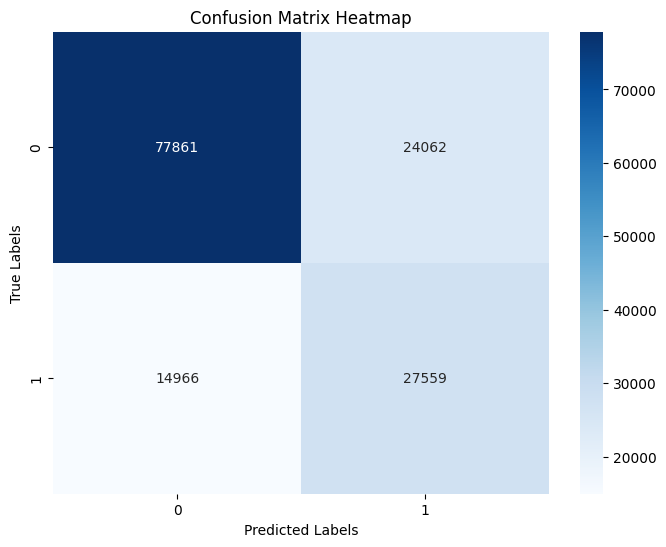

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_final)

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# Etiquetas y título
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [29]:
conf_matrix

array([[77861, 24062],
       [14966, 27559]], dtype=int64)

In [34]:
import winsound
winsound.Beep(700, 1000)

## **12. Detección de anomalías**

**No se considera ideal aplicar modelos de detección de anomalías**, y aquí están las razones principales junto con algunas alternativas:

---

**Razón principal: La clase minoritaria (clientes que comprarán) no es una anomalía intrínseca**
- Un cliente que decide continuar comprando no es necesariamente un comportamiento raro o anómalo, sino simplemente parte de un patrón diferente al de los clientes que abandonan. La decisión de compra puede estar influenciada por factores específicos que no tienen que ver con su rareza.
- En términos de datos, la detección de anomalías asume que las anomalías son desviaciones significativas de un patrón predominante, lo cual no refleja la realidad en este caso. Un cliente "activo" no es una desviación extrema, sino una clase que sigue un patrón específico.

---

**Por qué no detección de anomalías en este caso**
1. **Clientes activos no son "anómalos":**
   - No hay razón para suponer que los clientes que siguen comprando representan una desviación extrema. Pueden tener un comportamiento distintivo, pero esto no implica que sean estadísticamente raros.

2. **Información supervisada:**
   - Tienes etiquetas disponibles (abandono o no abandono), por lo que puedes aprovechar modelos supervisados que optimicen específicamente la clasificación para ambas clases.

3. **Dificultad en la evaluación:**
   - La detección de anomalías no está diseñada para problemas con etiquetas explícitas. Evaluar su desempeño para un problema de clasificación supervisada puede ser complejo e impreciso.